<a href="https://colab.research.google.com/github/victorhss21/previsao_serie_temporal/blob/main/Proje%C3%A7%C3%A3o_Hist%C3%B3rico_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Conjunto de dados

Criando conjunto de dados sintéticos:

In [113]:
import pandas as pd
import numpy as np

# 1. Gerar a coluna 'anomes'
dates = pd.date_range(start='2022-01-01', end='2025-02-01', freq='MS')
anomes = dates.strftime('%Y%m').astype(int)
n_months = len(anomes)

# Criar DataFrame inicial
df = pd.DataFrame({'anomes': anomes})

# 2. Gerar 'qtd_cnpj' e 'qtd_cnpj_dstc' (Linear)
start_cnpj = 1800
end_cnpj = 2200
df['qtd_cnpj'] = np.linspace(start_cnpj, end_cnpj, n_months).round().astype(int)
df['qtd_cnpj_dstc'] = df['qtd_cnpj'] # Assumindo que são idênticos conforme descrição

# 3. Gerar colunas de volume com ruído (Quase Linear)

# Função auxiliar para gerar dados quase lineares
def generate_near_linear(start_val, end_val, num_points, noise_level_percent=0.02):
    """Gera uma série quase linear com ruído."""
    linear_trend = np.linspace(start_val, end_val, num_points)
    # Calcula o desvio padrão do ruído como uma porcentagem da variação total
    total_variation = abs(end_val - start_val)
    noise_std_dev = total_variation * noise_level_percent
    # Gera ruído
    noise = np.random.normal(0, noise_std_dev, num_points)
    # Adiciona ruído à tendência linear
    near_linear_data = linear_trend + noise
    # Garante que os valores não sejam negativos (importante para volumes)
    near_linear_data[near_linear_data < 0] = 0
    return near_linear_data.round(2) # Arredonda para 2 casas decimais

# Definir valores em milhões (convertidos para unidades)
vol_pag_bco_start = 38.5e6
vol_pag_bco_end = 58.0e6
vol_rec_bco_start = 26.8e6
vol_rec_bco_end = 39.5e6
vol_pag_conc_afe_start = 10.0e6
vol_pag_conc_afe_end = 17.8e6
vol_rec_conc_afe_start = 6.0e6
vol_rec_conc_afe_end = 10.0e6

# Gerar volumes do banco e concorrência aferida (período completo)
df['vol_pag_bco'] = generate_near_linear(vol_pag_bco_start, vol_pag_bco_end, n_months)
df['vol_rec_bco'] = generate_near_linear(vol_rec_bco_start, vol_rec_bco_end, n_months)
df['vol_pag_conc_afe'] = generate_near_linear(vol_pag_conc_afe_start, vol_pag_conc_afe_end, n_months)
df['vol_rec_conc_afe'] = generate_near_linear(vol_rec_conc_afe_start, vol_rec_conc_afe_end, n_months)

# 4. Gerar volumes de mercado (_merc) - Período Parcial (a partir de 202307)

# Identificar o índice inicial para 202307
start_merc_anomes = 202307
start_merc_index = df[df['anomes'] == start_merc_anomes].index[0]
n_months_merc = n_months - start_merc_index

# Definir valores de mercado (em unidades)
vol_pag_merc_start = 112.0e6
vol_pag_merc_end = 127.0e6
vol_rec_merc_start = 70.0e6
vol_rec_merc_end = 77.0e6

# Gerar dados quase lineares APENAS para o período relevante
pag_merc_partial = generate_near_linear(vol_pag_merc_start, vol_pag_merc_end, n_months_merc)
rec_merc_partial = generate_near_linear(vol_rec_merc_start, vol_rec_merc_end, n_months_merc)

# Criar colunas completas com NaN e preencher a partir do índice inicial
df['vol_pag_merc'] = np.nan
df['vol_rec_merc'] = np.nan
df.loc[start_merc_index:, 'vol_pag_merc'] = pag_merc_partial
df.loc[start_merc_index:, 'vol_rec_merc'] = rec_merc_partial

# 5. Arredondar volumes para melhor visualização (opcional, manter precisão é melhor para análise)
# Comente/descomente se preferir inteiros ou manter decimais
# float_cols = ['vol_pag_bco', 'vol_rec_bco', 'vol_pag_conc_afe', 'vol_rec_conc_afe', 'vol_pag_merc', 'vol_rec_merc']
# df[float_cols] = df[float_cols].round().astype('Int64') # Usa Int64 para suportar NaNs

# Exibir as primeiras e últimas linhas do DataFrame e informações
print("Conjunto de Dados Sintético Gerado:")
print("\nPrimeiras 5 linhas:")
print(df.head().to_string())
print("\nÚltimas 5 linhas:")
print(df.tail().to_string())
print("\nInformações do DataFrame:")
df.info()
print("\nEstatísticas Descritivas:")
print(df.describe().to_string())

# Opcional: Salvar em um arquivo CSV
df.to_csv('dados_sinteticos_financeiros.csv', index=False, sep=';', decimal=',')

Conjunto de Dados Sintético Gerado:

Primeiras 5 linhas:
   anomes  qtd_cnpj  qtd_cnpj_dstc  vol_pag_bco  vol_rec_bco  vol_pag_conc_afe  vol_rec_conc_afe  vol_pag_merc  vol_rec_merc
0  202201      1800           1800  38546735.83  26270260.86        9586592.12        6032044.55           NaN           NaN
1  202202      1811           1811  38994145.91  27478252.91       10183963.90        6006135.25           NaN           NaN
2  202203      1822           1822  39943328.92  27693666.48       10613230.65        6229197.13           NaN           NaN
3  202204      1832           1832  39604908.23  28115525.64       10778104.29        6340495.88           NaN           NaN
4  202205      1843           1843  40549399.25  28088831.31       10788586.86        6535300.87           NaN           NaN

Últimas 5 linhas:
    anomes  qtd_cnpj  qtd_cnpj_dstc  vol_pag_bco  vol_rec_bco  vol_pag_conc_afe  vol_rec_conc_afe  vol_pag_merc  vol_rec_merc
33  202410      2157           2157  55696988.68

## 1. Carrega conjunto de dados

In [114]:
# Carrega conjunto de dados
df = pd.read_csv('dados_sinteticos_financeiros.csv', sep=';', decimal=',')

In [115]:
# Ajusta configurações do pandas para visualizar dados númericos muito grandes
pd.options.display.float_format = '{:.2f}'.format

## 2. Análise das séries temporais

In [116]:
# Import das libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### (a) Cálculo dos ponderadores e volume inferidos

In [117]:
# 1. Criar séries do ponderador inferido e volumes inferidos

# Especifica anomes a partir do qual temos infos de mercado
start_merc_anomes = df[(~df.vol_pag_merc.isnull()) & (~df.vol_rec_merc.isnull())].anomes.min()

# Filtrar o período onde os dados de mercado existem
df_analysis = df[df['anomes'] >= start_merc_anomes].copy()

# Calcular volumes inferidos
df_analysis['vol_pag_conc_infe'] = df_analysis['vol_pag_merc'] - df_analysis['vol_pag_bco'] - df_analysis['vol_pag_conc_afe']
df_analysis['vol_rec_conc_infe'] = df_analysis['vol_rec_merc'] - df_analysis['vol_rec_bco'] - df_analysis['vol_rec_conc_afe']

# Calcular ponderadores inferidos (evitando divisão por zero, embora improvável aqui)
df_analysis['ponderador_inferido_pag'] = df_analysis['vol_pag_conc_infe'] / df_analysis['vol_pag_conc_afe'].replace(0, np.nan)
df_analysis['ponderador_inferido_rec'] = df_analysis['vol_rec_conc_infe'] / df_analysis['vol_rec_conc_afe'].replace(0, np.nan)

# Converter 'anomes' para Datetime e definir como índice para análise temporal
df_analysis['data'] = pd.to_datetime(df_analysis['anomes'].astype(str), format='%Y%m')
df_analysis.set_index('data', inplace=True)

print("\nDataFrame com novas colunas calculadas (primeiras linhas):")
display(df_analysis[['vol_pag_conc_infe', 'vol_rec_conc_infe', 'ponderador_inferido_pag', 'ponderador_inferido_rec']].head())
print("\nDataFrame com novas colunas calculadas (últimas linhas):")
display(df_analysis[['vol_pag_conc_infe', 'vol_rec_conc_infe', 'ponderador_inferido_pag', 'ponderador_inferido_rec']].tail())


DataFrame com novas colunas calculadas (primeiras linhas):


,vol_pag_conc_infe,vol_rec_conc_infe,ponderador_inferido_pag,ponderador_inferido_rec
data,,,,
2023-07-01,50741296.62,29520964.75,3.75,3.76
2023-08-01,50352489.63,28818806.45,3.59,3.57
2023-09-01,50315969.27,29290941.92,3.50,3.56
2023-10-01,50269349.66,28685108.16,3.49,3.42
2023-11-01,49814863.36,28641278.43,3.39,3.47



DataFrame com novas colunas calculadas (últimas linhas):


,vol_pag_conc_infe,vol_rec_conc_infe,ponderador_inferido_pag,ponderador_inferido_rec
data,,,,
2024-10-01,51252452.22,27853694.72,3.01,2.89
2024-11-01,50437607.73,27619262.38,2.93,2.86
2024-12-01,52072255.62,27697926.19,3.05,2.82
2025-01-01,51450235.34,27908911.56,2.93,2.82
2025-02-01,50793662.08,27047096.95,2.83,2.68


In [118]:
# Infos do dataframe
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2023-07-01 to 2025-02-01
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   anomes                   20 non-null     int64  
 1   qtd_cnpj                 20 non-null     int64  
 2   qtd_cnpj_dstc            20 non-null     int64  
 3   vol_pag_bco              20 non-null     float64
 4   vol_rec_bco              20 non-null     float64
 5   vol_pag_conc_afe         20 non-null     float64
 6   vol_rec_conc_afe         20 non-null     float64
 7   vol_pag_merc             20 non-null     float64
 8   vol_rec_merc             20 non-null     float64
 9   vol_pag_conc_infe        20 non-null     float64
 10  vol_rec_conc_infe        20 non-null     float64
 11  ponderador_inferido_pag  20 non-null     float64
 12  ponderador_inferido_rec  20 non-null     float64
dtypes: float64(10), int64(3)
memory usage: 2.2 KB


### (b) Visualização das séries temporais

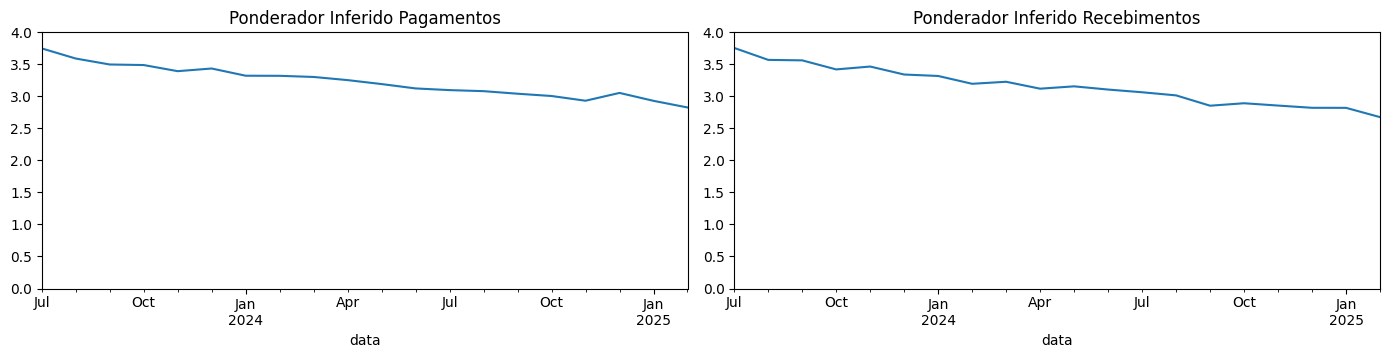

In [119]:
# Plot das séries temporais dos ponderadores de inferência

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
# fig.suptitle('Ponderadores Inferidos', fontsize=16)
df_analysis.ponderador_inferido_pag.plot(ax=axes[0], title='Ponderador Inferido Pagamentos')
df_analysis.ponderador_inferido_rec.plot(ax=axes[1], title='Ponderador Inferido Recebimentos')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
axes[0].set_ylim(0, 4) # ajusta eixo y para começar em zero
axes[1].set_ylim(0, 4) # ajusta eixo y para começar em zero
plt.show()

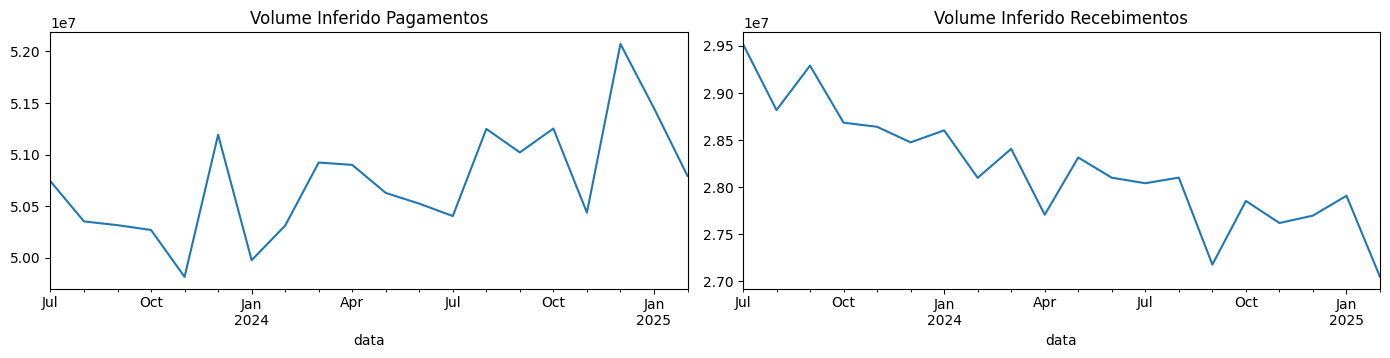

In [120]:
# Plot das séries temporais dos volumes inferidos

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
# fig.suptitle('Volumes Inferidos', fontsize=16)
df_analysis.vol_pag_conc_infe.plot(ax=axes[0], title='Volume Inferido Pagamentos')
df_analysis.vol_rec_conc_infe.plot(ax=axes[1], title='Volume Inferido Recebimentos')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# axes[0].set_ylim(0, 6e7) # ajusta eixo y para começar em zero
# axes[1].set_ylim(0, 6e7) # ajusta eixo y para começar em zero
plt.show()

### (c) Decomposição das séries temporais

#### (c.1) Decomposição via Seasonal Decompose (statsmodel)

In [121]:
# 2. Decomposição das séries temporais (Ponderadores)

print("\n--- Decomposição das Séries Temporais (Ponderadores) ---\n")

# Lidar com possíveis NaNs no ponderador (se vol_conc_afe fosse 0)
ponderador_pag = df_analysis['ponderador_inferido_pag'].dropna()
ponderador_rec = df_analysis['ponderador_inferido_rec'].dropna()

# Verificar se há dados suficientes para a decomposição (pelo menos 2 períodos)

periodo_sazonal = 12 # Assumindo ciclo anual

if len(ponderador_pag) >= 2 * periodo_sazonal:
    decomp_pag_add = seasonal_decompose(ponderador_pag, model='additive', period=periodo_sazonal)
    decomp_pag_mul = seasonal_decompose(ponderador_pag, model='multiplicative', period=periodo_sazonal)

    fig_pag, axes_pag = plt.subplots(1, 2, figsize=(14, 8))
    fig_pag.suptitle('Decomposição do Ponderador Inferido Pagamentos', fontsize=16)
    decomp_pag_add.plot(ax=axes_pag[0])
    axes_pag[0].set_title('Modelo Aditivo')
    axes_pag[0].tick_params(axis='x', rotation=45)
    decomp_pag_mul.plot(ax=axes_pag[1])
    axes_pag[1].set_title('Modelo Multiplicativo')
    axes_pag[1].tick_params(axis='x', rotation=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout para o título principal
    plt.show()

else:
    print(f"Não há dados suficientes ({len(ponderador_pag)} pontos) para decomposição sazonal do ponderador de pagamentos com período {periodo_sazonal}.")


if len(ponderador_rec) >= 2 * periodo_sazonal:
    decomp_rec_add = seasonal_decompose(ponderador_rec, model='additive', period=periodo_sazonal)
    decomp_rec_mul = seasonal_decompose(ponderador_rec, model='multiplicative', period=periodo_sazonal)

    fig_rec, axes_rec = plt.subplots(1, 2, figsize=(14, 8))
    fig_rec.suptitle('Decomposição do Ponderador Inferido Recebimentos', fontsize=16)
    decomp_rec_add.plot(ax=axes_rec[0])
    axes_rec[0].set_title('Modelo Aditivo')
    axes_rec[0].tick_params(axis='x', rotation=45)
    decomp_rec_mul.plot(ax=axes_rec[1])
    axes_rec[1].set_title('Modelo Multiplicativo')
    axes_rec[1].tick_params(axis='x', rotation=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
     print(f"Não há dados suficientes ({len(ponderador_rec)} pontos) para decomposição sazonal do ponderador de recebimentos com período {periodo_sazonal}.")

# Nota: Com apenas 20 pontos (202307 a 202502), a decomposição com período 12 pode não ser muito robusta.
# A função `seasonal_decompose` pode ter dificuldade em separar claramente tendência, sazonalidade e resíduo.


--- Decomposição das Séries Temporais (Ponderadores) ---

Não há dados suficientes (20 pontos) para decomposição sazonal do ponderador de pagamentos com período 12.
Não há dados suficientes (20 pontos) para decomposição sazonal do ponderador de recebimentos com período 12.


In [122]:
# 3. Decomposição das séries temporais (Volumes Inferidos)

print("\n--- Decomposição das Séries Temporais (Volumes Inferidos) ---\n")

vol_pag_infe = df_analysis['vol_pag_conc_infe'].dropna()
vol_rec_infe = df_analysis['vol_rec_conc_infe'].dropna()

if len(vol_pag_infe) >= 2 * periodo_sazonal:
    decomp_vol_pag_add = seasonal_decompose(vol_pag_infe, model='additive', period=periodo_sazonal)
    decomp_vol_pag_mul = seasonal_decompose(vol_pag_infe, model='multiplicative', period=periodo_sazonal)

    fig_vol_pag, axes_vol_pag = plt.subplots(1, 2, figsize=(14, 8))
    fig_vol_pag.suptitle('Decomposição do Volume Inferido Pagamentos', fontsize=16)
    decomp_vol_pag_add.plot(ax=axes_vol_pag[0])
    axes_vol_pag[0].set_title('Modelo Aditivo')
    axes_vol_pag[0].tick_params(axis='x', rotation=45)
    decomp_vol_pag_mul.plot(ax=axes_vol_pag[1])
    axes_vol_pag[1].set_title('Modelo Multiplicativo')
    axes_vol_pag[1].tick_params(axis='x', rotation=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print(f"Não há dados suficientes ({len(vol_pag_infe)} pontos) para decomposição sazonal do volume inferido de pagamentos com período {periodo_sazonal}.")


if len(vol_rec_infe) >= 2 * periodo_sazonal:
    decomp_vol_rec_add = seasonal_decompose(vol_rec_infe, model='additive', period=periodo_sazonal)
    decomp_vol_rec_mul = seasonal_decompose(vol_rec_infe, model='multiplicative', period=periodo_sazonal)

    fig_vol_rec, axes_vol_rec = plt.subplots(1, 2, figsize=(14, 8))
    fig_vol_rec.suptitle('Decomposição do Volume Inferido Recebimentos', fontsize=16)
    decomp_vol_rec_add.plot(ax=axes_vol_rec[0])
    axes_vol_rec[0].set_title('Modelo Aditivo')
    axes_vol_rec[0].tick_params(axis='x', rotation=45)
    decomp_vol_rec_mul.plot(ax=axes_vol_rec[1])
    axes_vol_rec[1].set_title('Modelo Multiplicativo')
    axes_vol_rec[1].tick_params(axis='x', rotation=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print(f"Não há dados suficientes ({len(vol_rec_infe)} pontos) para decomposição sazonal do volume inferido de recebimentos com período {periodo_sazonal}.")


--- Decomposição das Séries Temporais (Volumes Inferidos) ---

Não há dados suficientes (20 pontos) para decomposição sazonal do volume inferido de pagamentos com período 12.
Não há dados suficientes (20 pontos) para decomposição sazonal do volume inferido de recebimentos com período 12.


> **Decomposição por método Aditivo vs Multiplicativo:** [[Ref.]](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)

- O modelo multiplicativo é mais adequado quando a sazonalidade possui magnitude variável ao longo do tempo (isto é, onde a amplitude ou duração da sazonalidade fica maior ou menor ao longo da série) e geralmente a tendência da série não é linear (mas polinomial, exponencial, etc.)
- O modelo aditivo, por sua vez, é mais adequado quando o padrão sazonal da série tem comportamento constante (e tendência linear)

> **Importante:**

- O período de dados disponível (20 meses, de 2023-07 a 2025-02) é curto para uma decomposição sazonal robusta com período anual (12 meses). A função [`statsmodels.tsa.seasonal.seasonal_decompose`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) exige pelo menos dois ciclos completos (24 meses) para estimar a sazonalidade de forma confiável. Os gráficos serão gerados, mas a componente sazonal pode ser imprecisa ou até mesmo flat.
- O código inclui uma verificação e imprime um aviso se não houver dados suficientes, comunicando que não fará a decomposição pelo método seasonal decompose do statsmodel

#### (c.2) Decomposição via STL (Seasonal and Trend Decomposition using LOESS)

##### **Guia |** Interpretação da Decomposição via STL

Excelente pergunta! Entender como interpretar os gráficos de decomposição é crucial, e saber as diferenças entre STL e o método clássico ajuda a escolher a ferramenta certa e a interpretar os resultados com mais propriedade.

Vamos detalhar a interpretação dos gráficos STL e compará-los com a decomposição clássica (`seasonal_decompose` do statsmodels).

**Interpretação dos Gráficos da Decomposição STL**

A decomposição STL (Seasonal and Trend decomposition using Loess) divide a série temporal (`Observado`) em três componentes principais: Tendência (`Trend`), Sazonalidade (`Seasonal`) e Resíduo (`Resid`).

1.  **Observado (`Observed` ou `Data`):**
    *   **O que é:** Simplesmente a série temporal original que você forneceu.
    *   **Como interpretar:** Serve como referência visual. Você compara os componentes estimados (Tendência, Sazonalidade, Resíduo) com a série original para ver como eles se somam (ou se multiplicam, dependendo do modelo, embora STL seja inerentemente aditivo) para reconstruí-la.

2.  **Tendência (`Trend`):**
    *   **O que é:** Representa o movimento de longo prazo ou a direção geral da série, após a remoção das flutuações sazonais e do ruído de curto prazo. É a "espinha dorsal" da série.
    *   **Como é calculado (STL):** Usa LOESS (Locally Estimated Scatterplot Smoothing), que ajusta modelos de regressão simples a subconjuntos *localizados* dos dados. Isso permite que a linha de tendência seja **não linear** e se adapte a mudanças na direção da série ao longo do tempo.
    *   **Como interpretar:**
        *   **Direção:** A inclinação geral da linha indica se há uma tendência de crescimento (inclinada para cima), decrescimento (inclinada para baixo) ou se é relativamente estável (plana).
        *   **Forma:** Uma linha reta sugere uma tendência linear (crescimento/decréscimo constante). Uma curva indica que a taxa de crescimento/decréscimo está mudando (acelerando ou desacelerando). A flexibilidade do LOESS permite capturar essas curvas de forma mais suave e adaptativa.
        *   **Mudanças:** Procure por pontos de inflexão onde a tendência muda de direção.

3.  **Sazonalidade (`Seasonal`):**
    *   **O que é:** Representa padrões que se repetem em intervalos fixos de tempo (o `período` que você define, geralmente 12 para dados mensais anuais). São as flutuações regulares e previsíveis dentro de um ano (ou outro período).
    *   **Como é calculado (STL):** O STL aplica LOESS também ao componente sazonal. Ele analisa os dados para cada ponto do ciclo (ex: todos os Janeiros, todos os Fevereiros, etc.) e suaviza esses pontos ao longo do tempo. Isso permite que o **padrão sazonal possa mudar lentamente ao longo do tempo**, tanto em forma quanto em amplitude. Esta é uma diferença chave!
    *   **Como interpretar:**
        *   **Padrão:** Procure por um padrão que se repete claramente a cada `período` (e.g., 12 meses no eixo x). Picos podem indicar meses de alta atividade, vales indicam meses de baixa.
        *   **Amplitude:** A "altura" das ondas sazonais indica a força do efeito sazonal.
        *   **Evolução (Importante no STL):** Observe se a forma ou a amplitude desse padrão sazonal *muda* do início para o fim do gráfico. Por exemplo, os picos de verão podem estar ficando mais altos ou mais baixos ao longo dos anos. A decomposição clássica *não captura* essa evolução.

4.  **Resíduo (`Resid`):**
    *   **O que é:** É o que sobra da série original após a remoção das componentes de Tendência e Sazonalidade (`Resíduo = Observado - Tendência - Sazonalidade`). Idealmente, representa o ruído aleatório ou irregularidades não sistemáticas na série.
    *   **Como interpretar:**
        *   **Ideal:** Um bom modelo de decomposição deve resultar em resíduos que se assemelham a ruído branco: distribuídos aleatoriamente em torno de zero, sem padrões claros e com variância constante (homocedasticidade).
        *   **Padrões:** Se você observar padrões nos resíduos (tendências, ciclos, sazonalidade restante, variância que muda ao longo do tempo - heterocedasticidade), isso sugere que o modelo STL (com os parâmetros escolhidos) não capturou completamente a estrutura dos dados. Talvez haja outros ciclos, a sazonalidade não seja puramente aditiva, ou eventos específicos (outliers) não foram bem acomodados.
        *   **Outliers:** Pontos muito distantes de zero no gráfico de resíduos podem indicar observações incomuns ou outliers na série original. Se `robust=True` foi usado no STL, o impacto desses outliers nos componentes de tendência e sazonalidade é reduzido.

**Paralelo: STL vs. Decomposição Clássica (`seasonal_decompose`)**

| Característica        | Decomposição STL (`statsmodels.tsa.seasonal.STL`)                                  | Decomposição Clássica (`statsmodels.tsa.seasonal.seasonal_decompose`)                               | Implicações na Interpretação                                                                                                                               |
| :-------------------- | :--------------------------------------------------------------------------------- | :---------------------------------------------------------------------------------------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Método Principal**  | LOESS (Suavização por Regressão Local Ponderada)                                   | Médias Móveis Simples (ou Centradas)                                                                  | STL é mais flexível e pode capturar tendências não-lineares e sazonalidade variável mais suavemente. Clássica é mais rígida.                               |
| **Componente Tendência** | Estimada via LOESS. Pode ser **não linear** e se adapta localmente.                 | Estimada por média móvel (geralmente centrada). Tende a ser mais suave, pode achatar picos/vales. | A tendência STL pode refletir mudanças mais rapidamente. A tendência clássica pode ser mais lenta para reagir e perde dados nas pontas da série.             |
| **Componente Sazonal** | Estimada via LOESS em sub-séries sazonais. Permite que o padrão sazonal **evolua lentamente** ao longo do tempo. | Assume um padrão sazonal **fixo e idêntico** que se repete a cada período. Calculado pela média dos valores detrended para cada ponto do ciclo. | **Diferença Crucial:** STL captura se a sazonalidade muda (e.g., picos de verão mais intensos). Clássica força um padrão médio para todo o período. |
| **Manuseio dos Extremos** | Lida melhor com os pontos iniciais e finais da série (menos perda de dados).        | Perde observações no início e no fim devido ao cálculo da média móvel centrada.                   | A decomposição STL fornece estimativas para toda a extensão da série original.                                                                            |
| **Robustez a Outliers** | Possui uma opção `robust=True` que diminui o impacto de outliers.                   | Sensível a outliers, pois eles afetam diretamente as médias móveis.                                | STL (com `robust=True`) é preferível se você suspeitar de valores discrepantes na sua série.                                                              |
| **Flexibilidade**     | Mais flexível nos parâmetros de suavização (janelas para tendência e sazonalidade). | Menos flexível (principalmente o período).                                                          | STL permite um ajuste mais fino à natureza específica da série, mas requer mais cuidado na escolha dos parâmetros.                                          |
| **Requisito de Dados**  | Mais flexível (pode rodar com menos de 2 períodos, mas a qualidade sofre).          | Requer estritamente pelo menos 2 períodos sazonais completos para estimar a sazonalidade.           | Para séries curtas (como a sua de 20 pontos), STL *pode* fornecer uma decomposição, enquanto a clássica pode falhar ou dar resultados muito ruins.        |
| **Natureza**          | Iterativo (refina as estimativas).                                                 | Geralmente não iterativo (cálculo direto).                                                         |                                                                                                                                                            |

**Em Resumo:**

*   Use **STL** quando:
    *   Você suspeita que a tendência não é perfeitamente linear.
    *   Você acredita que o padrão sazonal pode estar mudando ao longo do tempo.
    *   Sua série temporal tem outliers.
    *   Sua série é relativamente curta (embora a interpretação ainda precise de cautela).
    *   Você precisa de estimativas para toda a extensão da série.
*   Use a **Decomposição Clássica** quando:
    *   Você precisa de um método muito simples e rápido.
    *   Você tem certeza que a sazonalidade é estável e a tendência é razoavelmente suave.
    *   Você tem dados suficientes (bem mais que 2 períodos).

Para a sua série de 20 pontos, STL é uma escolha tecnicamente mais adequada que a decomposição clássica, mas lembre-se sempre da limitação imposta pelo baixo número de observações, especialmente para inferir a componente sazonal de forma confiável. Analise os gráficos STL com um olhar crítico, focando principalmente na tendência e nos resíduos, e sendo mais cético em relação à componente sazonal estimada.

##### Decomposição via STL LOESS (Locally Estimated Scatterplot Smoothing)

In [123]:
# Impor libs
from statsmodels.tsa.seasonal import STL


--- Decomposição STL Lado a Lado ---

Processando Ponderadores...
  Decomposição STL para Ponderador Pagamentos realizada.
  Decomposição STL para Ponderador Recebimentos realizada.


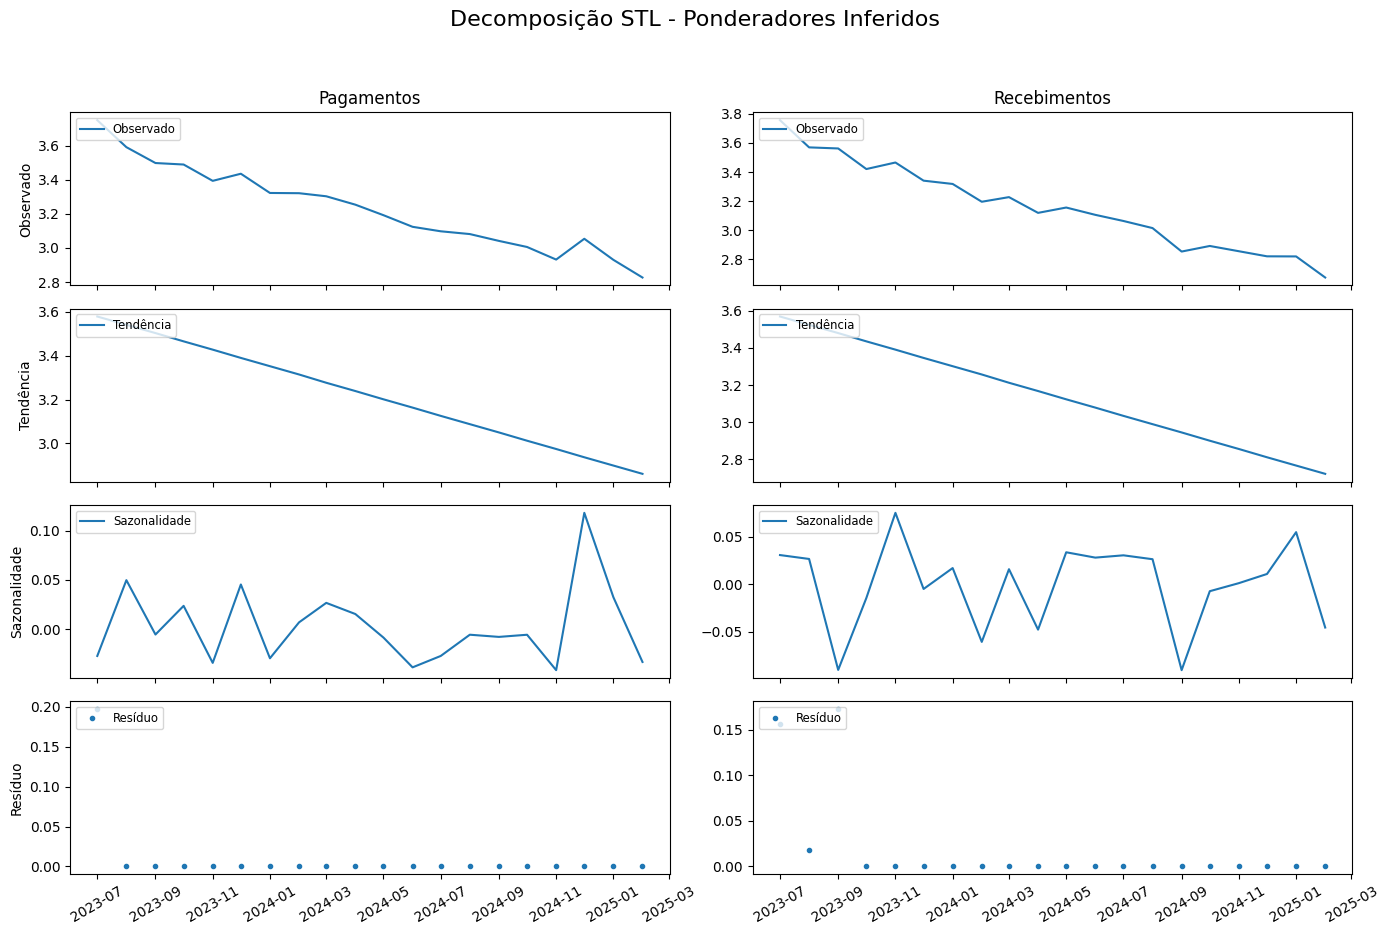

In [124]:
print("\n--- Decomposição STL Lado a Lado ---")

periodo_sazonal = 12 # Sazonalidade anual

# --- 1. Decomposição para Ponderadores ---

print("\nProcessando Ponderadores...")

# Selecionar as séries
series_pag_pond = df_analysis['ponderador_inferido_pag'].dropna()
series_rec_pond = df_analysis['ponderador_inferido_rec'].dropna()

# Inicializar dicionário para guardar resultados STL
results_pond = {}

# Tentar decompor Ponderador Pagamentos
if len(series_pag_pond) >= periodo_sazonal: # Verificação mínima
    try:
        stl_pag = STL(series_pag_pond, period=periodo_sazonal, robust=True)
        results_pond['pag'] = stl_pag.fit()
        print("  Decomposição STL para Ponderador Pagamentos realizada.")
    except Exception as e:
        print(f"  Erro na decomposição STL para Ponderador Pagamentos: {e}")
        results_pond['pag'] = None
else:
    print(f"  Série Ponderador Pagamentos muito curta ({len(series_pag_pond)} pontos) para decomposição STL significativa.")
    results_pond['pag'] = None

# Tentar decompor Ponderador Recebimentos
if len(series_rec_pond) >= periodo_sazonal:
    try:
        stl_rec = STL(series_rec_pond, period=periodo_sazonal, robust=True)
        results_pond['rec'] = stl_rec.fit()
        print("  Decomposição STL para Ponderador Recebimentos realizada.")
    except Exception as e:
        print(f"  Erro na decomposição STL para Ponderador Recebimentos: {e}")
        results_pond['rec'] = None
else:
    print(f"  Série Ponderador Recebimentos muito curta ({len(series_rec_pond)} pontos) para decomposição STL significativa.")
    results_pond['rec'] = None

# Criar a figura e os eixos para os Ponderadores
# 4 linhas (Observed, Trend, Seasonal, Residual), 2 colunas (Pag, Rec)
fig_pond, axes_pond = plt.subplots(nrows=4, ncols=2, figsize=(14, 10), sharex=True)
fig_pond.suptitle('Decomposição STL - Ponderadores Inferidos', fontsize=16, y=1.03) # Ajustar y para espaço

# Plotar componentes do Ponderador Pagamentos (Coluna 0)
result_pag = results_pond.get('pag')
if result_pag:
    axes_pond[0, 0].plot(result_pag.observed, label='Observado')
    axes_pond[1, 0].plot(result_pag.trend, label='Tendência')
    axes_pond[2, 0].plot(result_pag.seasonal, label='Sazonalidade')
    axes_pond[3, 0].plot(result_pag.resid, label='Resíduo', marker='.', linestyle='none') # Resíduo como pontos
    axes_pond[0, 0].set_title('Pagamentos')
else:
    for i in range(4): axes_pond[i, 0].text(0.5, 0.5, 'Não foi possível\ndecompor', ha='center', va='center', fontsize=10, color='grey')
    axes_pond[0, 0].set_title('Pagamentos (Erro)')

# Plotar componentes do Ponderador Recebimentos (Coluna 1)
result_rec = results_pond.get('rec')
if result_rec:
    axes_pond[0, 1].plot(result_rec.observed, label='Observado')
    axes_pond[1, 1].plot(result_rec.trend, label='Tendência')
    axes_pond[2, 1].plot(result_rec.seasonal, label='Sazonalidade')
    axes_pond[3, 1].plot(result_rec.resid, label='Resíduo', marker='.', linestyle='none')
    axes_pond[0, 1].set_title('Recebimentos')
else:
     for i in range(4): axes_pond[i, 1].text(0.5, 0.5, 'Não foi possível\ndecompor', ha='center', va='center', fontsize=10, color='grey')
     axes_pond[0, 1].set_title('Recebimentos (Erro)')

# Adicionar legendas e ajustar layout
for i in range(4):
    for j in range(2):
        axes_pond[i, j].legend(loc='upper left', fontsize='small')
        axes_pond[i, j].tick_params(axis='x', rotation=30) # Rotacionar data se necessário
# Adicionar rótulos de eixo y apenas na primeira coluna para clareza
axes_pond[0, 0].set_ylabel('Observado')
axes_pond[1, 0].set_ylabel('Tendência')
axes_pond[2, 0].set_ylabel('Sazonalidade')
axes_pond[3, 0].set_ylabel('Resíduo')

plt.tight_layout(rect=[0, 0.1, 1, 1]) # Ajustar para o título principal
plt.show()


--- Decomposição STL Lado a Lado ---

Processando Volumes Inferidos...
  Decomposição STL para Volume Pagamentos realizada.
  Decomposição STL para Volume Recebimentos realizada.


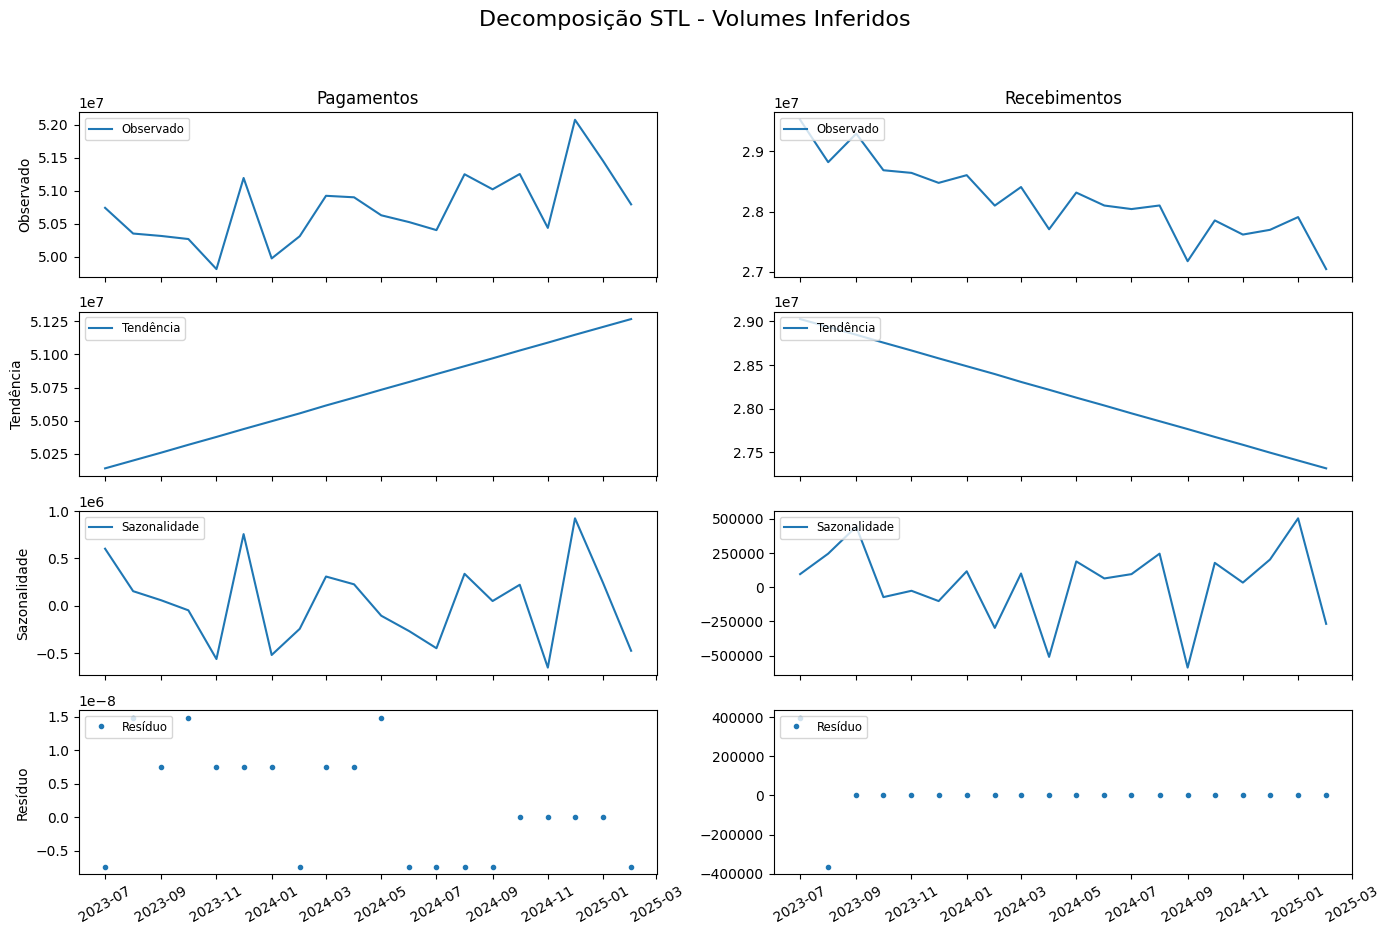

In [125]:
print("\n--- Decomposição STL Lado a Lado ---")

periodo_sazonal = 12 # Sazonalidade anual


# --- 2. Decomposição para Volumes Inferidos ---

print("\nProcessando Volumes Inferidos...")

# Selecionar as séries
series_pag_vol = df_analysis['vol_pag_conc_infe'].dropna()
series_rec_vol = df_analysis['vol_rec_conc_infe'].dropna()

# Inicializar dicionário para guardar resultados STL
results_vol = {}

# Tentar decompor Volume Pagamentos
if len(series_pag_vol) >= periodo_sazonal:
    try:
        stl_pag = STL(series_pag_vol, period=periodo_sazonal, robust=True)
        results_vol['pag'] = stl_pag.fit()
        print("  Decomposição STL para Volume Pagamentos realizada.")
    except Exception as e:
        print(f"  Erro na decomposição STL para Volume Pagamentos: {e}")
        results_vol['pag'] = None
else:
    print(f"  Série Volume Pagamentos muito curta ({len(series_pag_vol)} pontos) para decomposição STL significativa.")
    results_vol['pag'] = None

# Tentar decompor Volume Recebimentos
if len(series_rec_vol) >= periodo_sazonal: # Verificar se há pontos suficientes (STL pode rodar com menos, mas a interpretação é mais difícil)
    try:
        # period: Define a duração do ciclo sazonal (12 para dados mensais anuais)
        # robust=True: Torna o processo mais resistente a outliers ocasionais
        stl_rec = STL(series_rec_vol, period=periodo_sazonal, robust=True)
        results_vol['rec'] = stl_rec.fit()
        print("  Decomposição STL para Volume Recebimentos realizada.")
    except Exception as e:
        print(f"  Erro na decomposição STL para Volume Recebimentos: {e}")
        results_vol['rec'] = None
else: # STL pode funcionar com menos de 2 períodos, diferente da decomp. clássica
    print(f"  Série Volume Recebimentos muito curta ({len(series_rec_vol)} pontos) para decomposição STL significativa.")
    results_vol['rec'] = None

# Criar a figura e os eixos para os Volumes Inferidos
fig_vol, axes_vol = plt.subplots(nrows=4, ncols=2, figsize=(14, 10), sharex=True)
fig_vol.suptitle('Decomposição STL - Volumes Inferidos', fontsize=16, y=1.03)

# Plotar componentes do Volume Pagamentos (Coluna 0)
result_pag = results_vol.get('pag')
if result_pag:
    axes_vol[0, 0].plot(result_pag.observed, label='Observado')
    axes_vol[1, 0].plot(result_pag.trend, label='Tendência')
    axes_vol[2, 0].plot(result_pag.seasonal, label='Sazonalidade')
    axes_vol[3, 0].plot(result_pag.resid, label='Resíduo', marker='.', linestyle='none')
    axes_vol[0, 0].set_title('Pagamentos')
else:
    for i in range(4): axes_vol[i, 0].text(0.5, 0.5, 'Não foi possível\ndecompor', ha='center', va='center', fontsize=10, color='grey')
    axes_vol[0, 0].set_title('Pagamentos (Erro)')

# Plotar componentes do Volume Recebimentos (Coluna 1)
result_rec = results_vol.get('rec')
if result_rec:
    axes_vol[0, 1].plot(result_rec.observed, label='Observado')
    axes_vol[1, 1].plot(result_rec.trend, label='Tendência')
    axes_vol[2, 1].plot(result_rec.seasonal, label='Sazonalidade')
    axes_vol[3, 1].plot(result_rec.resid, label='Resíduo', marker='.', linestyle='none')
    axes_vol[0, 1].set_title('Recebimentos')
else:
     for i in range(4): axes_vol[i, 1].text(0.5, 0.5, 'Não foi possível\ndecompor', ha='center', va='center', fontsize=10, color='grey')
     axes_vol[0, 1].set_title('Recebimentos (Erro)')

# Adicionar legendas e ajustar layout
for i in range(4):
    for j in range(2):
        axes_vol[i, j].legend(loc='upper left', fontsize='small')
        axes_vol[i, j].tick_params(axis='x', rotation=30)
# Adicionar rótulos de eixo y
axes_vol[0, 0].set_ylabel('Observado')
axes_vol[1, 0].set_ylabel('Tendência')
axes_vol[2, 0].set_ylabel('Sazonalidade')
axes_vol[3, 0].set_ylabel('Resíduo')

plt.tight_layout(rect=[0, 0.1, 1, 1]) # Ajustar para o título principal
plt.show()

> **Importante**

Esta abordagem é geralmente mais flexível e robusta do que a decomposição clássica, especialmente para séries mais curtas ou com sazonalidade que muda ligeiramente ao longo do tempo.

Embora, devido a limitação do tamanho dos dados, a analise dos gráficos STL deve ser feita com um olhar crítico, focando principalmente na tendência e nos resíduos, e sendo mais cético em relação à componente sazonal estimada.

### (d) Análise de ACF (Auto Correlation Function) e PACF (Partial Auto Correlation Function)

##### **Utilidade |** Análise ACF e PACF para Séries Temporais

**Como a análise de ACF/PACF pode ser utilizada no contexto de Séries Temporais?**

Embora a identificação de ordens p e q para modelos ARIMA seja o uso mais canônico dos gráficos ACF e PACF, eles têm várias outras utilidades importantes na análise de séries temporais:

1.  **Verificação de Estacionariedade:**
    *   **Como:** Uma das características visuais mais importantes da ACF é sua capacidade de indicar não-estacionariedade (presença de tendência ou raiz unitária). Se a **ACF decai muito lentamente** (ou seja, as autocorrelações permanecem altas e positivas por muitos lags, diminuindo apenas linearmente em vez de exponencialmente), isso é um forte indício de que a série não é estacionária e provavelmente precisa ser diferenciada antes da modelagem (seja ARIMA ou outra). A PACF, nesse caso, frequentemente mostra apenas um pico significativo no lag 1.
    *   **Importância:** A estacionariedade é uma suposição fundamental para muitos modelos de séries temporais (não apenas ARIMA) e para a validade de muitas estatísticas. Identificar a não-estacionariedade é um primeiro passo crucial na análise.

2.  **Diagnóstico de Resíduos (Adequação do Modelo):**
    *   **Como:** Depois de ajustar *qualquer* modelo de série temporal (ARIMA, regressão com erros ARMA, modelos ETS, Prophet, modelos de Machine Learning, etc.), é essencial verificar se os **resíduos** do modelo se comportam como **ruído branco** (ou seja, são aleatórios, não correlacionados serialmente, com média zero e variância constante). Plotar a ACF e a PACF dos resíduos é a principal ferramenta para isso.
    *   **Interpretação:** Se o modelo capturou adequadamente a estrutura de dependência temporal dos dados, a **ACF e a PACF dos resíduos não devem mostrar nenhum pico estatisticamente significativo** (exceto talvez no lag 0, que é sempre 1 na ACF). Se houver picos significativos nos resíduos, isso indica que ainda há autocorrelação não explicada pelo modelo, sugerindo que o modelo está mal especificado (talvez precise de mais lags AR/MA, termos sazonais, ou uma abordagem completamente diferente).
    *   **Importância:** Esta é talvez a aplicação mais universal e importante da ACF/PACF fora da identificação ARIMA. Garante que as inferências do modelo (intervalos de confiança, testes de hipóteses) sejam válidas e que o modelo esteja capturando a dinâmica essencial dos dados.

3.  **Detecção de Sazonalidade:**
    *   **Como:** Padrões sazonais se manifestam como picos significativos na ACF (e às vezes na PACF) em lags correspondentes ao período sazonal. Para dados mensais com sazonalidade anual, esperaríamos ver picos significativos nos lags 12, 24, 36, etc.
    *   **Importância:** Mesmo que você não vá usar um modelo SARIMA, identificar a presença e a força da sazonalidade é crucial para entender os dados e escolher um modelo apropriado que possa lidar com ela (e.g., incluir dummies sazonais em uma regressão, usar um modelo ETS com componente sazonal, Prophet, etc.).

4.  **Compreensão da Estrutura de Dependência (Análise Exploratória):**
    *   **Como:** Simplesmente olhar para os gráficos ACF/PACF fornece uma visão inicial da memória da série. Uma ACF que decai rapidamente sugere uma memória curta (o passado recente tem mais influência). Uma ACF que decai lentamente sugere uma memória longa (o passado distante ainda tem influência). A forma do decaimento (exponencial vs. senoidal amortecida) também dá pistas sobre a natureza da dinâmica (e.g., processos oscilatórios).
    *   **Importância:** Ajuda a caracterizar a série temporal como parte da análise exploratória de dados (EDA), mesmo antes de decidir sobre um modelo específico. Ajuda a entender a persistência de choques ou o comportamento cíclico.

5.  **Seleção de Lags em Outros Modelos (Heurística):**
    *   **Como:** Em modelos que não são estritamente ARIMA, como regressão com variáveis defasadas (regressão dinâmica) ou mesmo alguns modelos de Machine Learning, a ACF/PACF pode *sugerir* quais lags da variável dependente ou independente podem ser preditores úteis. Por exemplo, se a PACF da variável dependente mostra um pico significativo no lag `k`, isso sugere que `Y(t-k)` pode ter poder preditivo direto sobre `Y(t)`.
    *   **Importância:** Funciona como uma heurística inicial para engenharia de features ou seleção de termos em modelos mais gerais, embora a seleção final deva ser validada por outras métricas (AIC, BIC, validação cruzada, etc.).

Em resumo, embora sejam a chave para ARIMA, as análises ACF e PACF são ferramentas diagnósticas e exploratórias fundamentais para qualquer pessoa que trabalhe com dados de séries temporais, ajudando a verificar suposições, diagnosticar modelos, identificar padrões e entender a estrutura de dependência temporal dos dados.

##### **Guia |** Como Utilizar e Interpretar os Gráficos ACF e PACF

Os gráficos ACF (Autocorrelation Function) e PACF (Partial Autocorrelation Function) são ferramentas fundamentais na análise de séries temporais, principalmente para identificar a estrutura de dependência temporal e ajudar na seleção de modelos como ARIMA.

1.  **O que são:**
    *   **ACF (Função de Autocorrelação):** Mede a correlação de uma série temporal com versões defasadas (lagged) de si mesma. Por exemplo, a ACF no lag 1 mede a correlação entre `Y(t)` e `Y(t-1)`; no lag 2, entre `Y(t)` e `Y(t-2)`, e assim por diante. **Importante:** A ACF em um lag `k` inclui tanto a correlação *direta* entre `Y(t)` e `Y(t-k)` quanto a correlação *indireta* causada pelas variáveis intermediárias (`Y(t-1)`, `Y(t-2)`, ..., `Y(t-k+1)`).
    *   **PACF (Função de Autocorrelação Parcial):** Também mede a correlação entre `Y(t)` e `Y(t-k)`, mas **removendo o efeito** das correlações intermediárias (lags 1 a `k-1`). Ela tenta isolar a correlação *direta* entre `Y(t)` e `Y(t-k)`.

2.  **Elementos do Gráfico:**
    *   **Eixo X:** Representa o número de lags (defasagens). Lag 0 é sempre 1 (correlação da série consigo mesma).
    *   **Eixo Y:** Mostra o valor do coeficiente de correlação (ACF ou PACF), variando de -1 a +1.
    *   **Linha Zero:** Indica correlação nula.
    *   **Área Sombreada (Azul, geralmente):** Representa o **intervalo de confiança** (normalmente 95%). Se uma barra (spike) de correlação **ultrapassa** essa área sombreada, ela é considerada **estatisticamente significativa** (improvável de ter ocorrido apenas por acaso). Se a barra está dentro da área, a correlação naquele lag não é significativamente diferente de zero.

3.  **Interpretação para Identificação de Modelos (ARIMA):**
    *   **Processo Autoregressivo - AR(p):** Um processo AR(p) significa que o valor atual `Y(t)` depende linearmente dos `p` valores anteriores `Y(t-1), ..., Y(t-p)`.
        *   **ACF:** Tende a **decair gradualmente** (exponencialmente ou como uma onda senoidal amortecida). As correlações permanecem significativas por vários lags porque a influência de `Y(t-k)` sobre `Y(t)` se propaga indiretamente através dos lags intermediários.
        *   **PACF:** **Corta abruptamente** (cai para dentro do intervalo de confiança) **após o lag `p`**. Isso ocorre porque a PACF remove o efeito dos lags intermediários; assim que consideramos o lag `p`, a influência direta dos lags anteriores (`p+1`, `p+2`, ...) torna-se não significativa.
    *   **Processo de Médias Móveis - MA(q):** Um processo MA(q) significa que o valor atual `Y(t)` depende linearmente dos `q` erros de previsão anteriores `ε(t-1), ..., ε(t-q)`.
        *   **ACF:** **Corta abruptamente** (cai para dentro do intervalo de confiança) **após o lag `q`**. A correlação só existe enquanto houver termos de erro passados compartilhados entre `Y(t)` e `Y(t-k)`, o que só acontece até o lag `q`.
        *   **PACF:** Tende a **decair gradualmente**. A estrutura de correlação induzida pelos termos MA faz com que a PACF mostre dependências que diminuem mais lentamente.
    *   **Processo ARMA(p,q):** Combina ambos.
        *   **ACF:** Decai gradualmente (influência do componente AR).
        *   **PACF:** Decai gradualmente (influência do componente MA). A identificação exata de `p` e `q` pode ser mais difícil apenas pelos gráficos.
    *   **Sazonalidade:** Picos significativos em lags sazonais (e.g., 12, 24 para dados mensais) tanto na ACF quanto na PACF indicam a presença de padrões sazonais.
    *   **Não-Estacionariedade (Tendência):** Se a **ACF decai muito lentamente** (valores altos persistem por muitos lags), isso é um forte sinal de que a série não é estacionária (provavelmente tem uma tendência). A PACF frequentemente mostra um pico significativo apenas no lag 1 neste caso. Isso indica a necessidade de **diferenciação** da série antes de modelar.

**Limitações com Apenas 20 Registros**

Sim, há limitações significativas ao usar ACF/PACF com uma série tão curta:

1.  **Estimativas Instáveis:** As estimativas dos coeficientes de autocorrelação (especialmente para lags maiores) são baseadas em menos pares de observações. Com N=20, a correlação no lag 1 usa 19 pares, mas no lag 10 usa apenas 10 pares, e no lag 15 usa apenas 5 pares. Isso torna as estimativas **menos precisas e mais voláteis**.
2.  **Intervalos de Confiança Largos:** A incerteza nas estimativas resulta em intervalos de confiança mais largos. Isso significa que correlações que poderiam ser significativas em uma série mais longa podem cair dentro do intervalo de confiança aqui, tornando mais difícil detectar padrões reais.
3.  **Padrões Difíceis de Distinguir:** A distinção crucial entre "cortar abruptamente" (MA ou PACF de AR) e "decair gradualmente" (AR ou PACF de MA) torna-se muito difícil com poucos pontos. Um decaimento real pode parecer um corte, e vice-versa.
4.  **Correlações Espúrias:** Com poucos dados, é mais provável que algumas correlações apareçam como "significativas" puramente por acaso.
5.  **Detecção de Sazonalidade:** Identificar sazonalidade anual (lag 12) é extremamente difícil com apenas 20 pontos. Você mal tem um ciclo e meio completo, tornando a estimativa da correlação no lag 12 muito pouco confiável. Ela pode nem aparecer como significativa.

**Regra Geral:** Muitos analistas consideram que são necessários pelo menos 50 (e idealmente mais) pontos de dados para uma interpretação razoavelmente confiável dos gráficos ACF/PACF. Com 20 pontos, você pode *olhar* os gráficos, mas interprete-os com **extrema cautela**. Foque nos primeiros lags (1-3) e desconfie de picos significativos em lags mais altos.

##### Análise via ACF e PACF

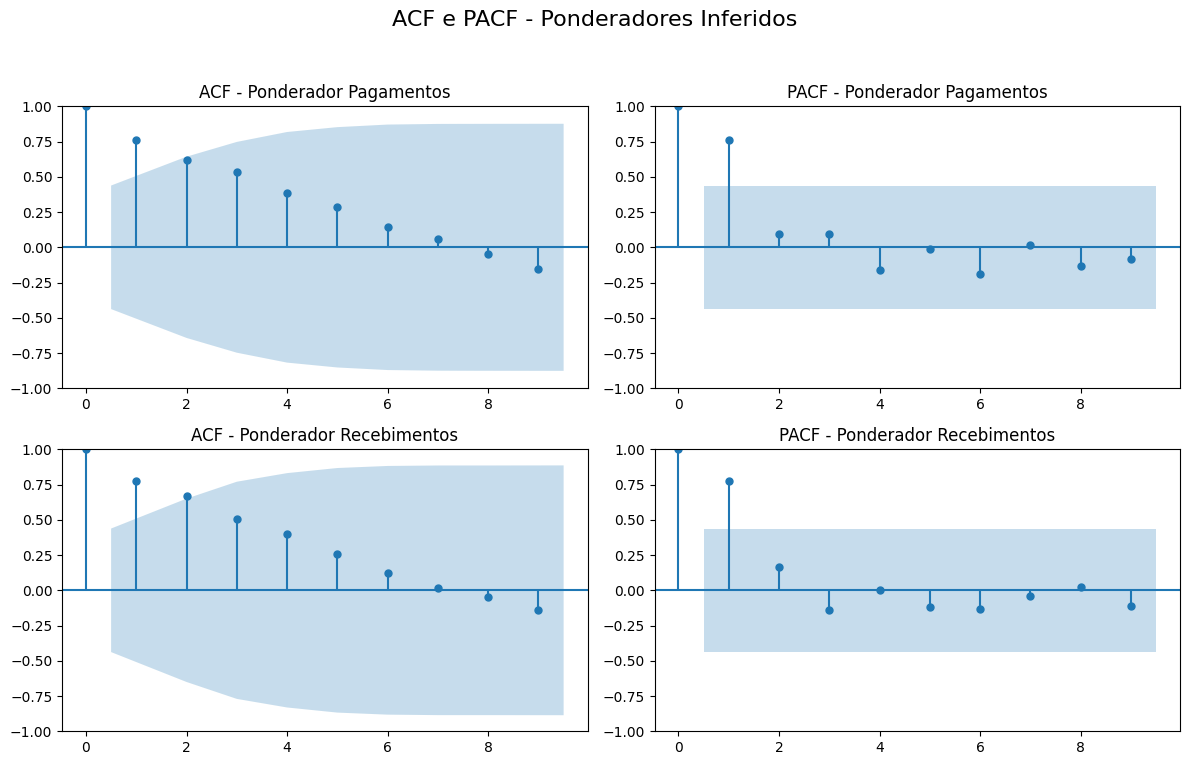

In [126]:
# 4. Gráficos de ACF e PACF
num_lags = min(10, len(df_analysis)//2 - 1) # Calcula um número razoável de lags, dado o tamanho da série

# Ponderadores
fig_ponderador, axes_ponderador = plt.subplots(2, 2, figsize=(12, 8))
fig_ponderador.suptitle('ACF e PACF - Ponderadores Inferidos', fontsize=16)
plot_acf(ponderador_pag, lags=num_lags, ax=axes_ponderador[0, 0], title='ACF - Ponderador Pagamentos')
plot_pacf(ponderador_pag, lags=num_lags, ax=axes_ponderador[0, 1], title='PACF - Ponderador Pagamentos')
plot_acf(ponderador_rec, lags=num_lags, ax=axes_ponderador[1, 0], title='ACF - Ponderador Recebimentos')
plot_pacf(ponderador_rec, lags=num_lags, ax=axes_ponderador[1, 1], title='PACF - Ponderador Recebimentos')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


--- Gráficos ACF e PACF ---


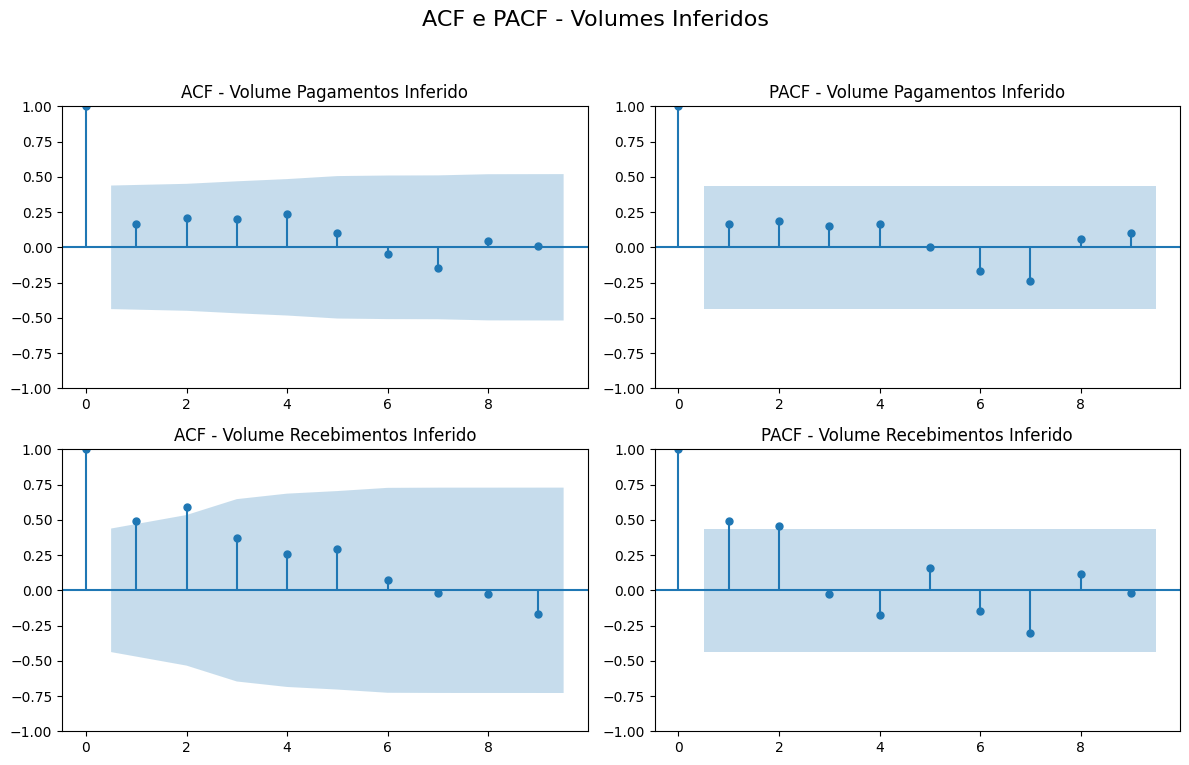

In [127]:
# 4. Gráficos de ACF e PACF

print("\n--- Gráficos ACF e PACF ---")
num_lags = min(10, len(df_analysis)//2 - 1) # Calcula um número razoável de lags, dado o tamanho da série

# Volumes Inferidos
fig_vol_infe, axes_vol_infe = plt.subplots(2, 2, figsize=(12, 8))
fig_vol_infe.suptitle('ACF e PACF - Volumes Inferidos', fontsize=16)
plot_acf(vol_pag_infe, lags=num_lags, ax=axes_vol_infe[0, 0], title='ACF - Volume Pagamentos Inferido')
plot_pacf(vol_pag_infe, lags=num_lags, ax=axes_vol_infe[0, 1], title='PACF - Volume Pagamentos Inferido')
plot_acf(vol_rec_infe, lags=num_lags, ax=axes_vol_infe[1, 0], title='ACF - Volume Recebimentos Inferido')
plot_pacf(vol_rec_infe, lags=num_lags, ax=axes_vol_infe[1, 1], title='PACF - Volume Recebimentos Inferido')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

> **Importante**

Para N=20, use os gráficos ACF/PACF com cautela extrema. Foque nos primeiros 3-5 lags. Não confie neles para identificar ordens `p` e `q` complexas ou sazonalidade. Esteja ciente de que qualquer padrão observado pode ser devido ao acaso. Limitar o número de lags exibidos a algo como 5 a 9 é prudente.

### (e) Análise de Correlação entre Séries vs Lags


--- Correlação com Lags ---


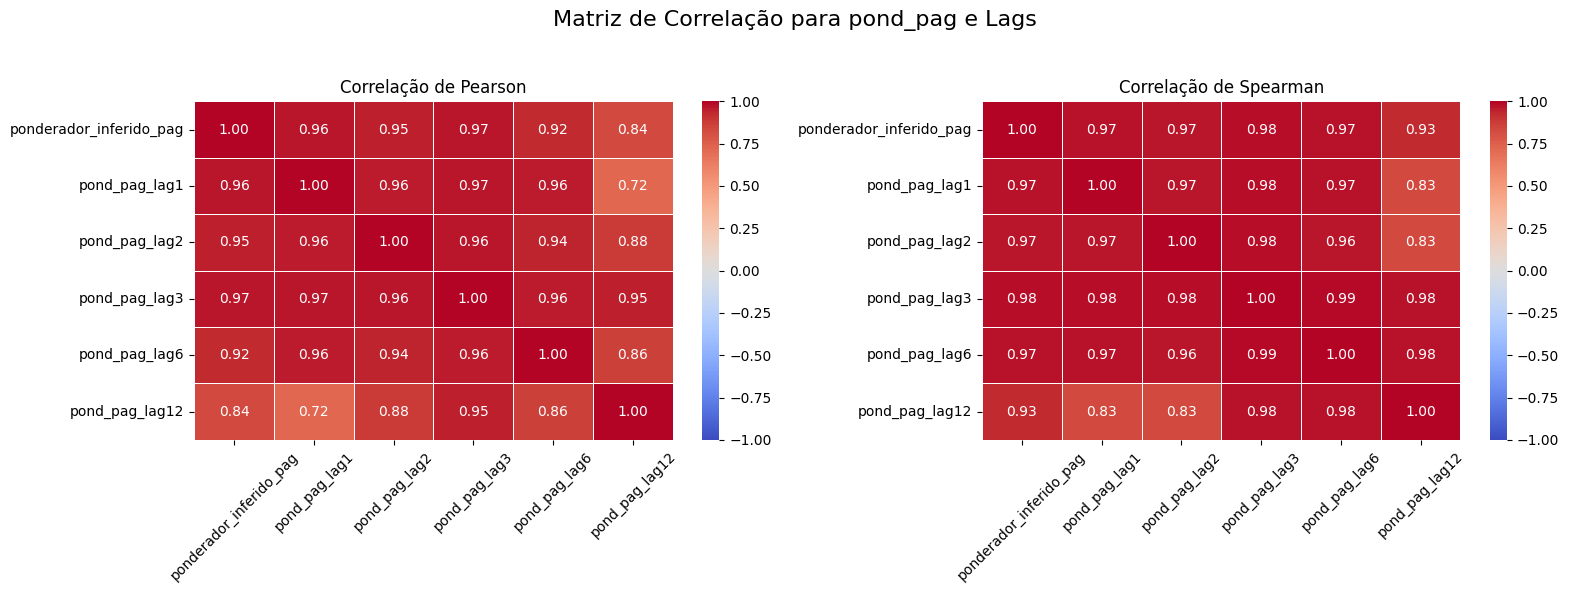

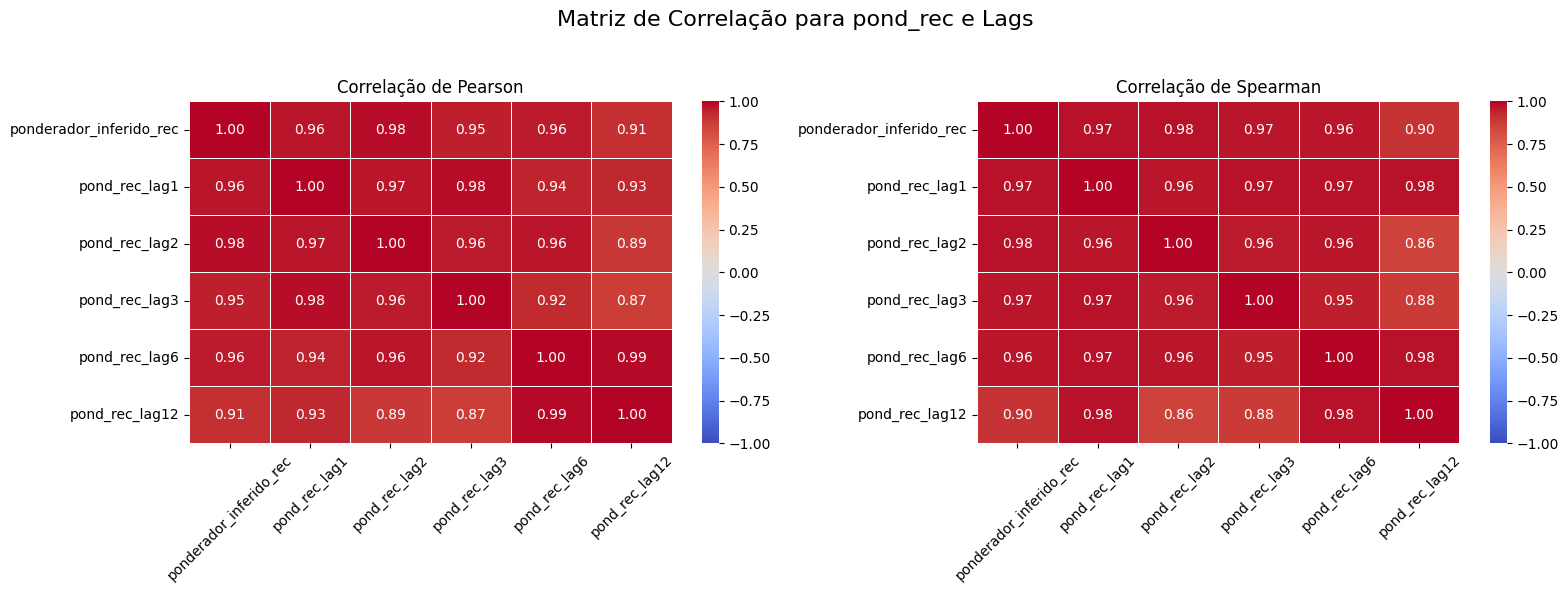

In [128]:
# 5. Criação de Lags e Gráficos de Correlação | Ponderadores de inferência

print("\n--- Correlação com Lags ---")
lags_to_create = [1, 2, 3, 6, 12]
series_to_lag = {
    'pond_pag': 'ponderador_inferido_pag',
    'pond_rec': 'ponderador_inferido_rec',
}

df_lags = df_analysis[list(series_to_lag.values())].copy()

for name, col in series_to_lag.items():
    for lag in lags_to_create:
        # Verificar se o lag é menor que o tamanho da série
        if lag < len(df_lags):
             df_lags[f'{name}_lag{lag}'] = df_lags[col].shift(lag)
        else:
             print(f"Aviso: Lag {lag} é maior ou igual ao tamanho da série ({len(df_lags)}), não será criado para {name}.")


# Função para plotar heatmaps de correlação
def plot_correlation_heatmaps(df_corr, series_name, lags_list, original_col_name): # Add original_col_name
    cols_to_corr = [original_col_name] + [f'{series_name}_lag{lag}' for lag in lags_list if f'{series_name}_lag{lag}' in df_corr.columns] # Use original_col_name

    # Verificar se há colunas suficientes para correlação
    if len(cols_to_corr) < 2:
        print(f"Não há colunas de lag suficientes para plotar correlação para {series_name}.")
        return

    corr_pearson = df_corr[cols_to_corr].corr(method='pearson')
    corr_spearman = df_corr[cols_to_corr].corr(method='spearman')

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Matriz de Correlação para {series_name} e Lags', fontsize=16)

    sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[0], vmin=-1, vmax=1)
    axes[0].set_title('Correlação de Pearson')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].tick_params(axis='y', rotation=0)


    sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[1], vmin=-1, vmax=1)
    axes[1].set_title('Correlação de Spearman')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='y', rotation=0)


    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Gerar gráficos para cada série
for short_name, original_col_name in series_to_lag.items():
    plot_correlation_heatmaps(df_lags, short_name, lags_to_create, original_col_name) # Pass original_col_name


--- Correlação com Lags ---


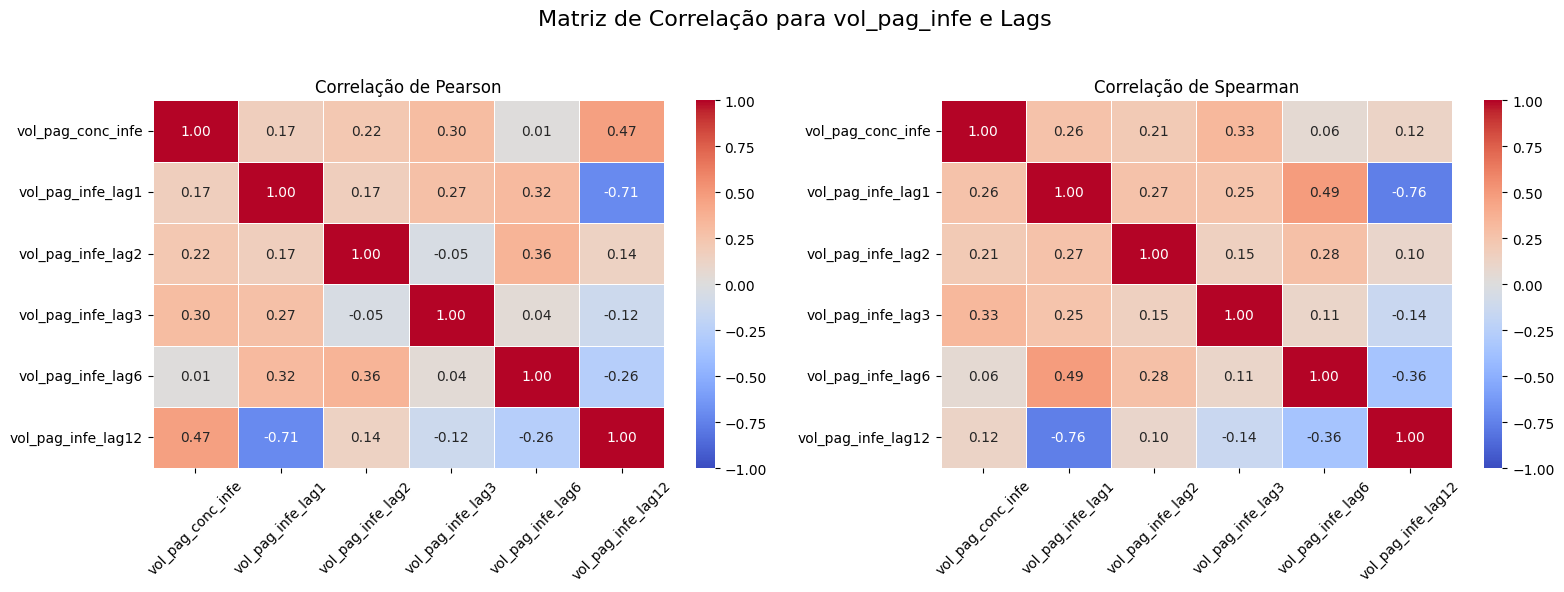

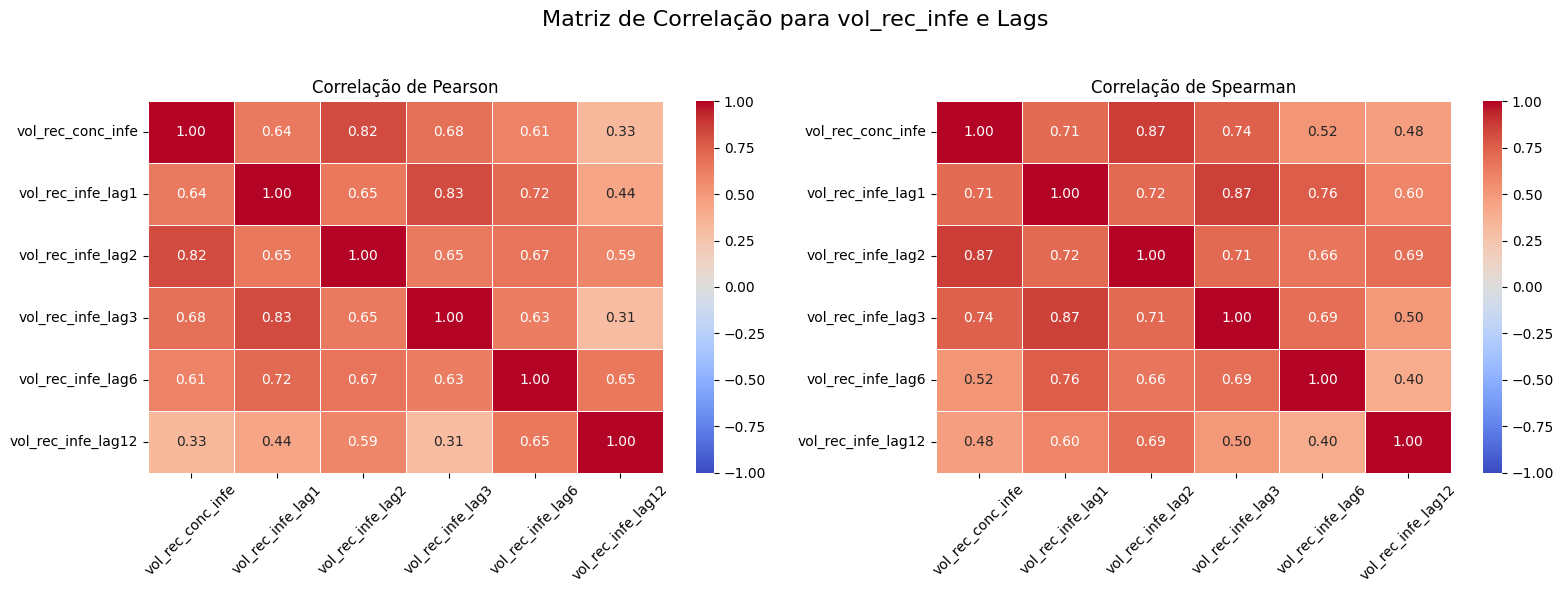

In [129]:
# 5. Criação de Lags e Gráficos de Correlação | Volumes inferidos

print("\n--- Correlação com Lags ---")
lags_to_create = [1, 2, 3, 6, 12]
series_to_lag = {
    'vol_pag_infe': 'vol_pag_conc_infe',
    'vol_rec_infe': 'vol_rec_conc_infe'
}

df_lags = df_analysis[list(series_to_lag.values())].copy()

for name, col in series_to_lag.items():
    for lag in lags_to_create:
        # Verificar se o lag é menor que o tamanho da série
        if lag < len(df_lags):
             df_lags[f'{name}_lag{lag}'] = df_lags[col].shift(lag)
        else:
             print(f"Aviso: Lag {lag} é maior ou igual ao tamanho da série ({len(df_lags)}), não será criado para {name}.")


# Função para plotar heatmaps de correlação
def plot_correlation_heatmaps(df_corr, series_name, lags_list, original_col_name): # Add original_col_name
    cols_to_corr = [original_col_name] + [f'{series_name}_lag{lag}' for lag in lags_list if f'{series_name}_lag{lag}' in df_corr.columns] # Use original_col_name

    # Verificar se há colunas suficientes para correlação
    if len(cols_to_corr) < 2:
        print(f"Não há colunas de lag suficientes para plotar correlação para {series_name}.")
        return

    corr_pearson = df_corr[cols_to_corr].corr(method='pearson')
    corr_spearman = df_corr[cols_to_corr].corr(method='spearman')

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Matriz de Correlação para {series_name} e Lags', fontsize=16)

    sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[0], vmin=-1, vmax=1)
    axes[0].set_title('Correlação de Pearson')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].tick_params(axis='y', rotation=0)


    sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[1], vmin=-1, vmax=1)
    axes[1].set_title('Correlação de Spearman')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='y', rotation=0)


    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Gerar gráficos para cada série
for short_name, original_col_name in series_to_lag.items():
    plot_correlation_heatmaps(df_lags, short_name, lags_to_create, original_col_name) # Pass original_col_name

### (f) Análise de Correlação entre Séries vs Vol. Aferido


--- Correlações com Vol. Aferido ---


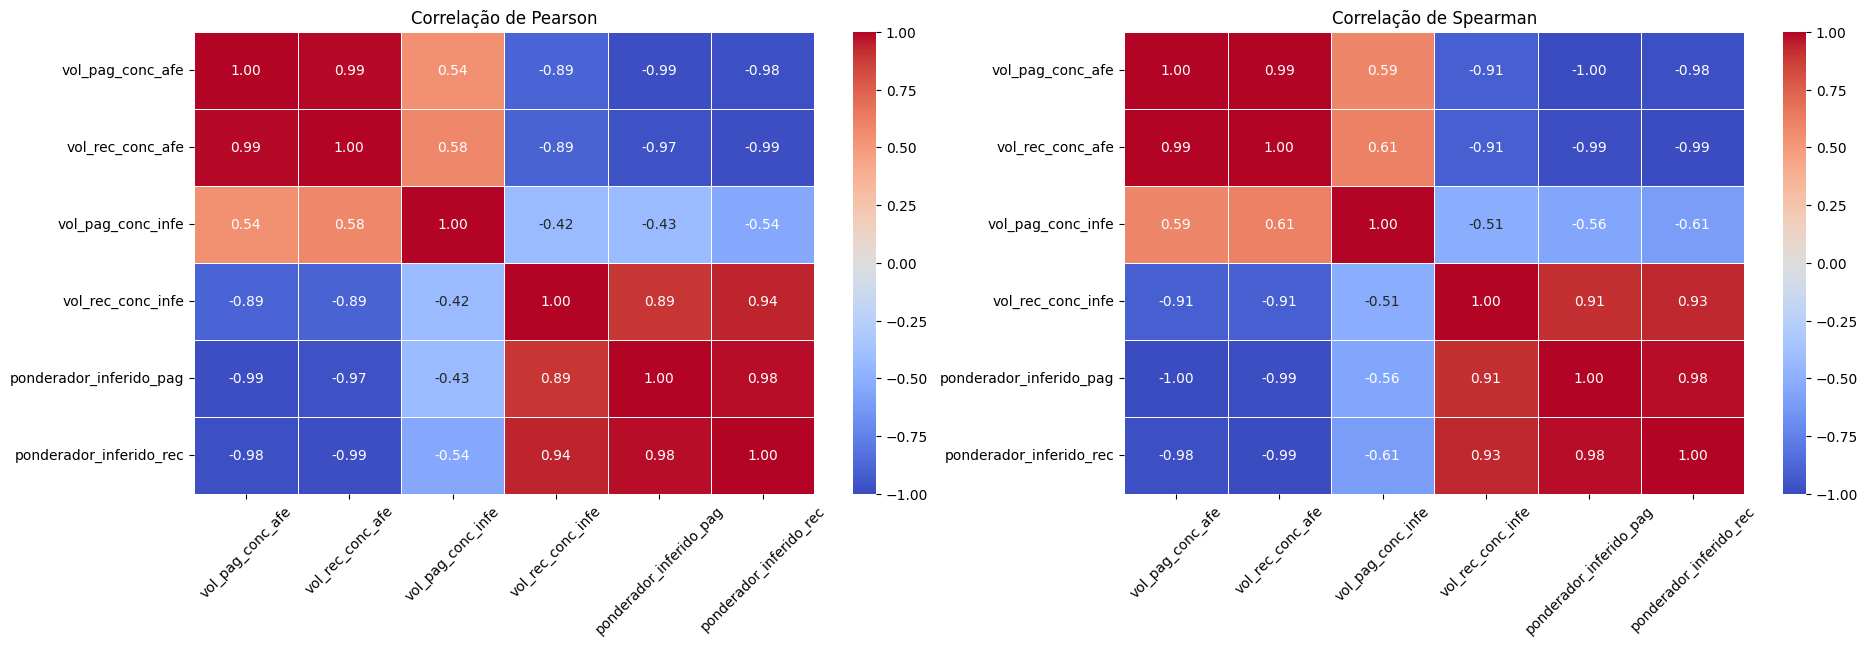

In [130]:
# 6. Avaliação de Correlações com Vol. Aferido

print("\n--- Correlações com Vol. Aferido ---")

df_analysis_corr = df_analysis[['vol_pag_conc_afe', 'vol_rec_conc_afe', 'vol_pag_conc_infe', 'vol_rec_conc_infe', 'ponderador_inferido_pag', 'ponderador_inferido_rec']]

fig, axes = plt.subplots(1, 2, figsize=(22, 6))

sns.heatmap(df_analysis_corr.corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title('Correlação de Pearson')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)
# plt.show()

sns.heatmap(df_analysis_corr.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[1], vmin=-1, vmax=1)
axes[1].set_title('Correlação de Spearman')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)
plt.show()

## 3. Projeção da Série Temporal

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import pmdarima as pm
from prophet import Prophet
import lightgbm as lgb
import xgboost as xgb
import warnings
import time # Para medir o tempo de execução

In [132]:
# Ignorar warnings comuns em modelos de séries temporais e ML
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message="Using an implicitly registered datetime converter for a matplotlib plotting method.")

In [133]:
# ==============================================================================
# 1. PREPARAÇÃO
# ==============================================================================
print("--- 1. Preparação ---")

# --- Definir Períodos ---
hist_start_dt = df_analysis.index.min() # 2023-07-01
hist_end_dt = df_analysis.index.max()   # 2025-02-01
backcast_start_dt = pd.to_datetime('202201', format='%Y%m') # 2022-01-01
backcast_end_dt = pd.to_datetime('202306', format='%Y%m')   # 2023-06-01
n_hist = len(df_analysis) # 20
n_backcast = len(pd.date_range(backcast_start_dt, backcast_end_dt, freq='MS')) # 18

print(f"Histórico disponível: {hist_start_dt.strftime('%Y-%m')} a {hist_end_dt.strftime('%Y-%m')} ({n_hist} pontos)")
print(f"Período de Backcast: {backcast_start_dt.strftime('%Y-%m')} a {backcast_end_dt.strftime('%Y-%m')} ({n_backcast} pontos)")

# --- Variáveis Alvo e Exógenas ---
target_cols = {
    'Ponderador_Pag': 'ponderador_inferido_pag',
    'Ponderador_Rec': 'ponderador_inferido_rec',
    'Volume_Pag': 'vol_pag_conc_infe',
    'Volume_Rec': 'vol_rec_conc_infe'
}

exog_cols = {
    'Ponderador_Pag': 'vol_pag_conc_afe',
    'Ponderador_Rec': 'vol_rec_conc_afe',
    'Volume_Pag': 'vol_pag_conc_afe',
    'Volume_Rec': 'vol_rec_conc_afe'
}

# Garantir que a coluna exógena exista no df para o período de backcasting
if not all(col in df.columns for col in ['vol_pag_conc_afe', 'vol_rec_conc_afe']):
     raise ValueError("DataFrame 'df' não contém as colunas exógenas 'vol_pag_conc_afe' e 'vol_rec_conc_afe' para todo o período.")

--- 1. Preparação ---
Histórico disponível: 2023-07 a 2025-02 (20 pontos)
Período de Backcast: 2022-01 a 2023-06 (18 pontos)


In [134]:
# ==============================================================================
# 2. FUNÇÕES AUXILIARES
# ==============================================================================
print("\n--- 2. Funções Auxiliares ---")

def calculate_metrics(y_true, y_pred):
    """Calcula RMSE e MAE, tratando possíveis NaNs"""
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    if np.sum(mask) == 0:
        return np.nan, np.nan
    rmse = np.sqrt(mean_squared_error(y_true[mask], y_pred[mask]))
    mae = mean_absolute_error(y_true[mask], y_pred[mask])
    return rmse, mae


--- 2. Funções Auxiliares ---


In [135]:
# ==============================================================================
# 3. CONFIGURAÇÃO DA VALIDAÇÃO (Simulação de Backcasting)
# ==============================================================================
print("\n--- 3. Configuração da Validação ---")

n_validation_points = 6 # Prever os 6 meses anteriores (202301 a 202306 simulados)
n_train_points = n_hist - n_validation_points # Usar os últimos 14 pontos para treinar (202401 a 202502 simulados)

if n_train_points <= 0:
    raise ValueError(f"Não há pontos suficientes ({n_hist}) para a validação com {n_validation_points} pontos.")

# Índices para a simulação
sim_val_end_dt = df_analysis.index[n_validation_points - 1]   # 2023-12-01 (último ponto de validação)
sim_val_start_dt = df_analysis.index[0]                       # 2023-07-01 (primeiro ponto de validação)
sim_train_start_dt = df_analysis.index[n_validation_points]   # 2024-01-01 (primeiro ponto de treino)
sim_train_end_dt = df_analysis.index[-1]                      # 2025-02-01 (último ponto de treino)

print(f"Simulação: Treino de {sim_train_start_dt.strftime('%Y-%m')} a {sim_train_end_dt.strftime('%Y-%m')} ({n_train_points} pontos)")
print(f"Simulação: Validação de {sim_val_start_dt.strftime('%Y-%m')} a {sim_val_end_dt.strftime('%Y-%m')} ({n_validation_points} pontos)")

# Dados de validação reais (os 6 primeiros pontos do histórico disponível)
df_sim_val_true = df_analysis.iloc[:n_validation_points]


--- 3. Configuração da Validação ---
Simulação: Treino de 2024-01 a 2025-02 (14 pontos)
Simulação: Validação de 2023-07 a 2023-12 (6 pontos)


In [136]:
# ==============================================================================
# 4. ENGENHARIA DE FEATURES (Simplificada para Simulação)
# ==============================================================================
print("\n--- 4. Engenharia de Features (para Simulação) ---")

# Criar cópia dos dados de análise para adicionar features
df_analysis_feat = df_analysis.copy()

# Adicionar Lag 1 para todas as targets potenciais
for target_label, target_col in target_cols.items():
    df_analysis_feat[f'{target_col}_lag1'] = df_analysis_feat[target_col].shift(1)

# Separar conjuntos de treino e validação para a simulação
df_sim_train = df_analysis_feat.iloc[n_validation_points:]
df_sim_val_features = df_analysis_feat.iloc[:n_validation_points] # Features *para prever* a validação

# Criar série temporal invertida para modelos que precisam dela
df_analysis_inverted = df_analysis.iloc[::-1].copy()
df_analysis_inverted['time_inverted'] = range(len(df_analysis_inverted))


--- 4. Engenharia de Features (para Simulação) ---


### **3.1 - Abordagem 1 |** Vol. Conc. Aferido como Feature Exógena

- Crossa validation: 1 passo a "frente"
- Target: Ponderador de inferência
- Features expliativas: Vol. Conc. Aferido e seus lags (1 e 12)

In [139]:
# ==============================================================================
# (Certifique-se de que as seções 1-4 do código anterior foram executadas)
# Relembrando:
# - 'df' contém dados de 2022-01 a 2025-02, incluindo 'vol_pag_conc_afe', 'vol_rec_conc_afe'
# - 'df_analysis' contém dados de 2023-07 a 2025-02, incluindo ponderadores e volumes inferidos
# - 'target_cols' mapeia 'Ponderador_Pag', 'Ponderador_Rec' para os nomes das colunas
# - 'exog_cols' mapeia 'Ponderador_Pag', 'Ponderador_Rec' para 'vol_pag_conc_afe', 'vol_rec_conc_afe'
# ==============================================================================

In [141]:
# --- Modelos a serem testados ---
model_list = [
    'Benchmark_LinearTrend',
    'Benchmark_SeasonalAvg',
    'Benchmark_SeasonalTrend',
    'ETS',
    'ARIMA_100',
    'ARIMAX_100',
    'LinearReg',
    'Prophet',
    'Linear+XGBoost'
]

#### (I). Prophet

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression # Mantido para Benchmarks
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet
import warnings
import time

In [193]:
# Ignorar warnings comuns (manter os relevantes)
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message="Using an implicitly registered datetime converter for a matplotlib plotting method.")
warnings.filterwarnings("ignore", category=UserWarning, module='prophet') # Manter o do Prophet

In [194]:
# ==============================================================================
# (Garantir que as seções 1-4 foram executadas e 'df'/'df_analysis' têm DatetimeIndex)
# ==============================================================================
# Verificar novamente após garantir o tipo de índice
if not isinstance(df.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df'. Verifique a preparação dos dados.")
if not isinstance(df_analysis.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df_analysis'. Verifique a preparação dos dados.")

In [195]:
# ==============================================================================
# 5. REVISADO - Foco no Ponderador, Features Exógenas (APENAS PROPHET), Walk-Forward (3 Folds) - CORRIGIDO 4.0
# ==============================================================================
print("\n--- 5. REVISADO - Foco no Ponderador, Features Exógenas (APENAS PROPHET), Walk-Forward (3 Folds) - CORRIGIDO 4.0 ---")

# --- Preparação Adicional ---
n_folds = 3
if len(df_analysis) <= n_folds:
    raise ValueError(f"Não há dados suficientes ({len(df_analysis)}) para realizar {n_folds} folds de validação walk-forward.")

targets_to_process = ['Ponderador_Pag', 'Ponderador_Rec']
results_list_wf = []
fold_predictions_dict = {} # Pode ser útil manter para análise posterior

# --- Engenharia das Features Exógenas (em todo o DataFrame 'df') ---
print("  Calculando features exógenas (Lags de vol_conc_aferido)...")
df_feat_eng = df.copy()
# Assegurar DatetimeIndex e tentar definir frequência 'MS'
if not isinstance(df_feat_eng.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_feat_eng' não é DatetimeIndex. Verifique a preparação.")
df_feat_eng = df_feat_eng.asfreq('MS')
if df_feat_eng.index.freq is None:
    print("      AVISO: Não foi possível definir a frequência 'MS' no índice principal.")


for prefix in ['pag', 'rec']:
    col_afe = f'vol_{prefix}_conc_afe'
    if col_afe not in df_feat_eng.columns:
         raise KeyError(f"Coluna exógena base '{col_afe}' não encontrada em 'df_feat_eng'.")
    df_feat_eng[f'{col_afe}_lag1'] = df_feat_eng[col_afe].shift(1)
    df_feat_eng[f'{col_afe}_lag12'] = df_feat_eng[col_afe].shift(12)

# Selecionar período relevante e garantir índice/frequência
df_analysis_wf = df_feat_eng.loc[df_analysis.index].copy()
for target_label in targets_to_process:
    target_col_name = target_cols[target_label]
    if target_col_name not in df_analysis.columns:
        raise KeyError(f"Coluna target '{target_col_name}' não encontrada em 'df_analysis'.")
    df_analysis_wf[target_col_name] = df_analysis[target_col_name]

if not isinstance(df_analysis_wf.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_analysis_wf' não é DatetimeIndex. Verifique a preparação.")
df_analysis_wf = df_analysis_wf.asfreq('MS')
if df_analysis_wf.index.freq is None:
     print("      AVISO: Não foi possível definir a frequência 'MS' no índice de 'df_analysis_wf'.")


--- 5. REVISADO - Foco no Ponderador, Features Exógenas (APENAS PROPHET), Walk-Forward (3 Folds) - CORRIGIDO 4.0 ---
  Calculando features exógenas (Lags de vol_conc_aferido)...


In [204]:
# --- Lista de Modelos (APENAS Prophet) ---
model_list = ['Prophet']


# --- Loop Principal: Iterar sobre as Targets (Ponderadores) ---
for target_label in targets_to_process:
    print(f"\n==============================================================================")
    print(f"=== Processando Target: {target_label} ===")
    print(f"==============================================================================")
    target_col = target_cols[target_label]
    exog_base_col = exog_cols[target_label]

    # Define os conjuntos de features exógenas a testar (mantendo a estrutura)
    feature_sets = {
        'Exog_m0': [exog_base_col],
        'Exog_m0_Lag1': [exog_base_col, f'{exog_base_col}_lag1'],
        # 'Exog_m0_Lag1_Lag12': [exog_base_col, f'{exog_base_col}_lag1', f'{exog_base_col}_lag12'],
        # 'Exog_m0_Lag12': [exog_base_col, f'{exog_base_col}_lag12']
    }

    # --- Loop Secundário: Iterar sobre os Conjuntos de Features Exógenas ---
    for feature_set_name, current_features in feature_sets.items():
        print(f"\n  --- Avaliando com Conjunto de Features: {feature_set_name} ---")
        print(f"      Features: {current_features}")

        missing_cols = [col for col in current_features if col not in df_analysis_wf.columns]
        if missing_cols:
            print(f"      AVISO: Colunas de features ausentes: {missing_cols}. Pulando este conjunto.")
            continue

        # --- Loop Terciário: Iterar sobre os Modelos (agora só tem Prophet) ---
        for model_name in model_list: # Loop agora só roda uma vez
            if model_name != 'Prophet': continue # Segurança extra

            print(f"    * Testando Modelo: {model_name}")
            start_time_model = time.time()
            model_fold_metrics = {'RMSE': [], 'MAE': []}
            model_identifier = f"{target_label}_{feature_set_name}_{model_name}"
            fold_predictions_dict[model_identifier] = {'y_true': [], 'y_pred': []}

            # --- Validação Walk-Forward ---
            for i in range(n_folds):
                train_end_idx = len(df_analysis_wf) - n_folds + i
                test_idx = train_end_idx

                df_train_fold = df_analysis_wf.iloc[:train_end_idx]
                df_test_fold = df_analysis_wf.iloc[[test_idx]]

                y_train = df_train_fold[target_col].copy()
                y_test_true = df_test_fold[target_col].iloc[0]

                X_train = df_train_fold[current_features].copy()
                X_test = df_test_fold[current_features].copy()

                # Limpeza de NaNs no início do treino
                initial_nan_mask_train = X_train.isnull().any(axis=1) | y_train.isnull()
                if initial_nan_mask_train.any():
                     first_valid_index = initial_nan_mask_train.idxmin()
                     y_train_clean = y_train.loc[first_valid_index:].copy()
                     X_train_clean = X_train.loc[first_valid_index:].copy()
                else:
                     y_train_clean = y_train.copy()
                     X_train_clean = X_train.copy()

                X_test_clean = X_test.ffill().bfill().copy() # Garante que teste não tem NaN

                y_pred_fold = np.nan

                try:
                    # Verificar se há dados suficientes e se features de teste são válidas
                    min_train_points = 3 # Prophet precisa de poucos pontos, mas mais é melhor
                    if len(y_train_clean) < min_train_points:
                        raise ValueError(f"Dados de treino insuficientes ({len(y_train_clean)} < {min_train_points}) após limpar NaNs.")
                    if X_test_clean.isnull().any().any():
                         raise ValueError(f"Features de teste contêm NaNs mesmo após preenchimento no fold {i+1}.")

                    # --- Lógica Específica do Prophet ---
                    # Preparar dataframe para Prophet
                    prophet_df_train = pd.DataFrame({
                        'ds': y_train_clean.index, # Usar DatetimeIndex
                        'y': y_train_clean.values
                    })
                    for col in X_train_clean.columns: prophet_df_train[col] = X_train_clean[col].values

                    # Instanciar e treinar Prophet
                    # Removido o suppress_stdout_stderr
                    model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False, growth='linear', uncertainty_samples=0)
                    for col in X_train_clean.columns: model.add_regressor(col)
                    model.fit(prophet_df_train) # Logs padrão do Prophet serão exibidos aqui

                    # Preparar dataframe futuro (apenas ponto de teste)
                    future_df = pd.DataFrame({'ds': df_test_fold.index}) # Usar DatetimeIndex
                    for col in X_test_clean.columns: future_df[col] = X_test_clean[col].values

                    # Prever
                    forecast = model.predict(future_df)
                    y_pred_fold = forecast['yhat'].iloc[0]

                except Exception as e:
                     print(f"        ERROR no fold {i+1} para {model_name}: {e}")
                     y_pred_fold = np.nan

                # Armazenar resultados do fold
                if not pd.isna(y_pred_fold) and not pd.isna(y_test_true):
                    rmse_fold = np.sqrt(mean_squared_error([y_test_true], [y_pred_fold]))
                    mae_fold = mean_absolute_error([y_test_true], [y_pred_fold])
                else:
                    rmse_fold = np.nan
                    mae_fold = np.nan

                model_fold_metrics['RMSE'].append(rmse_fold)
                model_fold_metrics['MAE'].append(mae_fold)
                fold_predictions_dict[model_identifier]['y_true'].append(y_test_true)
                fold_predictions_dict[model_identifier]['y_pred'].append(y_pred_fold)
            # --- Fim do loop dos Folds ---

            avg_rmse = np.nanmean(model_fold_metrics['RMSE'])
            avg_mae = np.nanmean(model_fold_metrics['MAE'])
            total_time_model = time.time() - start_time_model
            result_entry = {
                'Target': target_label,
                'Feature_Set': feature_set_name,
                'Model': model_name, # Será sempre 'Prophet'
                'RMSE_Fold1': model_fold_metrics['RMSE'][0] if n_folds > 0 else np.nan,
                'MAE_Fold1': model_fold_metrics['MAE'][0] if n_folds > 0 else np.nan,
                'RMSE_Fold2': model_fold_metrics['RMSE'][1] if n_folds > 1 else np.nan,
                'MAE_Fold2': model_fold_metrics['MAE'][1] if n_folds > 1 else np.nan,
                'RMSE_Fold3': model_fold_metrics['RMSE'][2] if n_folds > 2 else np.nan,
                'MAE_Fold3': model_fold_metrics['MAE'][2] if n_folds > 2 else np.nan,
                'RMSE_Avg': avg_rmse,
                'MAE_Avg': avg_mae,
                'Time_sec': total_time_model
            }
            results_list_wf.append(result_entry)
            if not pd.isna(avg_rmse):
                 print(f"      Avg Metrics: RMSE={avg_rmse:.4g}, MAE={avg_mae:.4g}, Time={total_time_model:.2f}s")
            else:
                 print(f"      Avg Metrics: Falhou (NaN), Time={total_time_model:.2f}s")
        # --- Fim do loop dos Modelos ---
    # --- Fim do loop dos Conjuntos de Features ---
# --- Fim do loop das Targets ---

# Converter resultados para DataFrame
results_wf_df_prophet = pd.DataFrame(results_list_wf)

INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8jw1aj/7dtx_i5p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8jw1aj/q1kplhor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5129', 'data', 'file=/tmp/tmp9c8jw1aj/7dtx_i5p.json', 'init=/tmp/tmp9c8jw1aj/q1kplhor.json', 'output', 'file=/tmp/tmp9c8jw1aj/prophet_modeln1tul92h/prophet_model-20250422115043.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:50:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8jw1aj/rf389sb7.json
DEBUG:cmdstanpy:input tempfil


=== Processando Target: Ponderador_Pag ===

  --- Avaliando com Conjunto de Features: Exog_m0 ---
      Features: ['vol_pag_conc_afe']
    * Testando Modelo: Prophet


11:50:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8jw1aj/xvkk201m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8jw1aj/5echkvwi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22788', 'data', 'file=/tmp/tmp9c8jw1aj/xvkk201m.json', 'init=/tmp/tmp9c8jw1aj/5echkvwi.json', 'output', 'file=/tmp/tmp9c8jw1aj/prophet_modellznn_0c_/prophet_model-20250422115043.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:50:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Usin

      Avg Metrics: RMSE=0.02395, MAE=0.02395, Time=0.38s

  --- Avaliando com Conjunto de Features: Exog_m0_Lag1 ---
      Features: ['vol_pag_conc_afe', 'vol_pag_conc_afe_lag1']
    * Testando Modelo: Prophet


11:50:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8jw1aj/opc0b043.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8jw1aj/4gxnr3fm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93039', 'data', 'file=/tmp/tmp9c8jw1aj/opc0b043.json', 'init=/tmp/tmp9c8jw1aj/4gxnr3fm.json', 'output', 'file=/tmp/tmp9c8jw1aj/prophet_model0fpuy5hh/prophet_model-20250422115044.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:50:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Usin

      Avg Metrics: RMSE=0.02291, MAE=0.02291, Time=0.36s

=== Processando Target: Ponderador_Rec ===

  --- Avaliando com Conjunto de Features: Exog_m0 ---
      Features: ['vol_rec_conc_afe']
    * Testando Modelo: Prophet


11:50:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8jw1aj/scoqasuy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8jw1aj/rk1jruj2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4075', 'data', 'file=/tmp/tmp9c8jw1aj/scoqasuy.json', 'init=/tmp/tmp9c8jw1aj/rk1jruj2.json', 'output', 'file=/tmp/tmp9c8jw1aj/prophet_modelc9n3n1wp/prophet_model-20250422115044.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:50:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using

      Avg Metrics: RMSE=0.03573, MAE=0.03573, Time=0.46s

  --- Avaliando com Conjunto de Features: Exog_m0_Lag1 ---
      Features: ['vol_rec_conc_afe', 'vol_rec_conc_afe_lag1']
    * Testando Modelo: Prophet


11:50:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8jw1aj/33ru_uxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8jw1aj/1utg6n38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5312', 'data', 'file=/tmp/tmp9c8jw1aj/33ru_uxn.json', 'init=/tmp/tmp9c8jw1aj/1utg6n38.json', 'output', 'file=/tmp/tmp9c8jw1aj/prophet_modela0l8_iq6/prophet_model-20250422115045.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:50:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


      Avg Metrics: RMSE=0.03341, MAE=0.03341, Time=0.41s


In [244]:
# Avaliando o resultados dos modelos no conjunto de dados de treino vs validação
results_wf_df_prophet[results_wf_df_prophet.Target=='Ponderador_Pag'].sort_values('RMSE_Avg', ascending=True)

,Target,Feature_Set,Model,RMSE_Fold1,MAE_Fold1,RMSE_Fold2,MAE_Fold2,RMSE_Fold3,MAE_Fold3,RMSE_Avg,MAE_Avg,Time_sec
17,Ponderador_Pag,Exog_m0_Lag1,Prophet,0.04,0.04,0.03,0.03,0.00,0.00,0.02,0.02,0.36
16,Ponderador_Pag,Exog_m0,Prophet,0.05,0.05,0.02,0.02,0.00,0.00,0.02,0.02,0.38
2,Ponderador_Pag,Exog_m0_Lag1_Lag12,LinearReg,0.06,0.06,0.02,0.02,0.04,0.04,0.04,0.04,0.02
10,Ponderador_Pag,Exog_m0_Lag1_Lag12,LinearReg,0.06,0.06,0.02,0.02,0.04,0.04,0.04,0.04,0.02
11,Ponderador_Pag,Exog_m0_Lag12,LinearReg,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.02
3,Ponderador_Pag,Exog_m0_Lag12,LinearReg,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.02
8,Ponderador_Pag,Exog_m0,LinearReg,0.09,0.09,0.05,0.05,0.02,0.02,0.05,0.05,0.02
0,Ponderador_Pag,Exog_m0,LinearReg,0.09,0.09,0.05,0.05,0.02,0.02,0.05,0.05,0.02
9,Ponderador_Pag,Exog_m0_Lag1,LinearReg,0.10,0.10,0.07,0.07,0.02,0.02,0.06,0.06,0.02
1,Ponderador_Pag,Exog_m0_Lag1,LinearReg,0.10,0.10,0.07,0.07,0.02,0.02,0.06,0.06,0.02


#### (II). LinearReg

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression # Único modelo necessário
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import time

# Ignorar warnings comuns
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message="Using an implicitly registered datetime converter for a matplotlib plotting method.")

In [199]:
# ==============================================================================
# (Garantir que as seções 1-4 foram executadas e 'df'/'df_analysis' têm DatetimeIndex)
# ==============================================================================
# Verificar novamente após garantir o tipo de índice
if not isinstance(df.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df'. Verifique a preparação dos dados.")
if not isinstance(df_analysis.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df_analysis'. Verifique a preparação dos dados.")


In [200]:
# ==============================================================================
# 5. REVISADO - Foco no Ponderador, Features Exógenas (APENAS LinearReg), Walk-Forward (3 Folds) - CORRIGIDO 5.0
# ==============================================================================
print("\n--- 5. REVISADO - Foco no Ponderador, Features Exógenas (APENAS LinearReg), Walk-Forward (3 Folds) - CORRIGIDO 5.0 ---")

# --- Preparação Adicional ---
n_folds = 3
if len(df_analysis) <= n_folds:
    raise ValueError(f"Não há dados suficientes ({len(df_analysis)}) para realizar {n_folds} folds de validação walk-forward.")

targets_to_process = ['Ponderador_Pag', 'Ponderador_Rec']
results_list_wf = []
fold_predictions_dict = {}

# --- Engenharia das Features Exógenas (em todo o DataFrame 'df') ---
print("  Calculando features exógenas (Lags de vol_conc_aferido)...")
df_feat_eng = df.copy()
# Assegurar DatetimeIndex e tentar definir frequência 'MS'
if not isinstance(df_feat_eng.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_feat_eng' não é DatetimeIndex. Verifique a preparação.")
df_feat_eng = df_feat_eng.asfreq('MS')
if df_feat_eng.index.freq is None:
    print("      AVISO: Não foi possível definir a frequência 'MS' no índice principal.")


for prefix in ['pag', 'rec']:
    col_afe = f'vol_{prefix}_conc_afe'
    if col_afe not in df_feat_eng.columns:
         raise KeyError(f"Coluna exógena base '{col_afe}' não encontrada em 'df_feat_eng'.")
    df_feat_eng[f'{col_afe}_lag1'] = df_feat_eng[col_afe].shift(1)
    df_feat_eng[f'{col_afe}_lag12'] = df_feat_eng[col_afe].shift(12)

# Selecionar período relevante e garantir índice/frequência
df_analysis_wf = df_feat_eng.loc[df_analysis.index].copy()
for target_label in targets_to_process:
    target_col_name = target_cols[target_label]
    if target_col_name not in df_analysis.columns:
        raise KeyError(f"Coluna target '{target_col_name}' não encontrada em 'df_analysis'.")
    df_analysis_wf[target_col_name] = df_analysis[target_col_name]

if not isinstance(df_analysis_wf.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_analysis_wf' não é DatetimeIndex. Verifique a preparação.")
df_analysis_wf = df_analysis_wf.asfreq('MS')
if df_analysis_wf.index.freq is None:
     print("      AVISO: Não foi possível definir a frequência 'MS' no índice de 'df_analysis_wf'.")


--- 5. REVISADO - Foco no Ponderador, Features Exógenas (APENAS LinearReg), Walk-Forward (3 Folds) - CORRIGIDO 5.0 ---
  Calculando features exógenas (Lags de vol_conc_aferido)...


In [202]:
# --- Lista de Modelos (APENAS LinearReg) ---
model_list = ['LinearReg']


# --- Loop Principal: Iterar sobre as Targets (Ponderadores) ---
for target_label in targets_to_process:
    print(f"\n==============================================================================")
    print(f"=== Processando Target: {target_label} ===")
    print(f"==============================================================================")
    target_col = target_cols[target_label]
    exog_base_col = exog_cols[target_label]

    # Define os conjuntos de features exógenas a testar
    feature_sets = {
        'Exog_m0': [exog_base_col],
        'Exog_m0_Lag1': [exog_base_col, f'{exog_base_col}_lag1'],
        # 'Exog_m0_Lag1_Lag12': [exog_base_col, f'{exog_base_col}_lag1', f'{exog_base_col}_lag12'],
        # 'Exog_m0_Lag12': [exog_base_col, f'{exog_base_col}_lag12']
    }

    # --- Loop Secundário: Iterar sobre os Conjuntos de Features Exógenas ---
    for feature_set_name, current_features in feature_sets.items():
        print(f"\n  --- Avaliando com Conjunto de Features: {feature_set_name} ---")
        print(f"      Features: {current_features}")

        missing_cols = [col for col in current_features if col not in df_analysis_wf.columns]
        if missing_cols:
            print(f"      AVISO: Colunas de features ausentes: {missing_cols}. Pulando este conjunto.")
            continue

        # --- Loop Terciário: Iterar sobre os Modelos (agora só LinearReg) ---
        for model_name in model_list: # Loop agora só roda uma vez
            if model_name != 'LinearReg': continue # Segurança extra

            print(f"    * Testando Modelo: {model_name}")
            start_time_model = time.time()
            model_fold_metrics = {'RMSE': [], 'MAE': []}
            model_identifier = f"{target_label}_{feature_set_name}_{model_name}"
            fold_predictions_dict[model_identifier] = {'y_true': [], 'y_pred': []}

            # --- Validação Walk-Forward ---
            for i in range(n_folds):
                train_end_idx = len(df_analysis_wf) - n_folds + i
                test_idx = train_end_idx

                df_train_fold = df_analysis_wf.iloc[:train_end_idx]
                df_test_fold = df_analysis_wf.iloc[[test_idx]]

                y_train = df_train_fold[target_col].copy()
                y_test_true = df_test_fold[target_col].iloc[0]

                X_train = df_train_fold[current_features].copy()
                X_test = df_test_fold[current_features].copy()

                # Limpeza de NaNs no início do treino
                initial_nan_mask_train = X_train.isnull().any(axis=1) | y_train.isnull()
                if initial_nan_mask_train.any():
                     first_valid_index = initial_nan_mask_train.idxmin()
                     y_train_clean = y_train.loc[first_valid_index:].copy()
                     X_train_clean = X_train.loc[first_valid_index:].copy()
                else:
                     y_train_clean = y_train.copy()
                     X_train_clean = X_train.copy()

                X_test_clean = X_test.ffill().bfill().copy() # Garante que teste não tem NaN

                y_pred_fold = np.nan

                try:
                    # Verificar se há dados suficientes e se features de teste são válidas
                    min_train_points = len(current_features) + 2 # Regressão precisa de > features
                    if len(y_train_clean) < min_train_points:
                        raise ValueError(f"Dados de treino insuficientes ({len(y_train_clean)} < {min_train_points}) após limpar NaNs.")
                    if X_test_clean.isnull().any().any():
                         raise ValueError(f"Features de teste contêm NaNs mesmo após preenchimento no fold {i+1}.")
                    if X_train_clean.empty:
                         raise ValueError(f"Conjunto de treino de features vazio após limpeza no fold {i+1}.")

                    # --- Lógica Específica da Regressão Linear ---
                    model = LinearRegression()
                    model.fit(X_train_clean, y_train_clean)
                    y_pred_fold = model.predict(X_test_clean)[0]

                except Exception as e:
                     print(f"        ERROR no fold {i+1} para {model_name}: {e}")
                     y_pred_fold = np.nan

                # Armazenar resultados do fold
                if not pd.isna(y_pred_fold) and not pd.isna(y_test_true):
                    rmse_fold = np.sqrt(mean_squared_error([y_test_true], [y_pred_fold]))
                    mae_fold = mean_absolute_error([y_test_true], [y_pred_fold])
                else:
                    rmse_fold = np.nan
                    mae_fold = np.nan

                model_fold_metrics['RMSE'].append(rmse_fold)
                model_fold_metrics['MAE'].append(mae_fold)
                fold_predictions_dict[model_identifier]['y_true'].append(y_test_true)
                fold_predictions_dict[model_identifier]['y_pred'].append(y_pred_fold)
            # --- Fim do loop dos Folds ---

            avg_rmse = np.nanmean(model_fold_metrics['RMSE'])
            avg_mae = np.nanmean(model_fold_metrics['MAE'])
            total_time_model = time.time() - start_time_model
            result_entry = {
                'Target': target_label,
                'Feature_Set': feature_set_name,
                'Model': model_name, # Será sempre 'LinearReg'
                'RMSE_Fold1': model_fold_metrics['RMSE'][0] if n_folds > 0 else np.nan,
                'MAE_Fold1': model_fold_metrics['MAE'][0] if n_folds > 0 else np.nan,
                'RMSE_Fold2': model_fold_metrics['RMSE'][1] if n_folds > 1 else np.nan,
                'MAE_Fold2': model_fold_metrics['MAE'][1] if n_folds > 1 else np.nan,
                'RMSE_Fold3': model_fold_metrics['RMSE'][2] if n_folds > 2 else np.nan,
                'MAE_Fold3': model_fold_metrics['MAE'][2] if n_folds > 2 else np.nan,
                'RMSE_Avg': avg_rmse,
                'MAE_Avg': avg_mae,
                'Time_sec': total_time_model
            }
            results_list_wf.append(result_entry)
            if not pd.isna(avg_rmse):
                 print(f"      Avg Metrics: RMSE={avg_rmse:.4g}, MAE={avg_mae:.4g}, Time={total_time_model:.2f}s")
            else:
                 print(f"      Avg Metrics: Falhou (NaN), Time={total_time_model:.2f}s")
        # --- Fim do loop dos Modelos ---
    # --- Fim do loop dos Conjuntos de Features ---
# --- Fim do loop das Targets ---

# Converter resultados para DataFrame
results_wf_df_linreg = pd.DataFrame(results_list_wf)


=== Processando Target: Ponderador_Pag ===

  --- Avaliando com Conjunto de Features: Exog_m0 ---
      Features: ['vol_pag_conc_afe']
    * Testando Modelo: LinearReg
      Avg Metrics: RMSE=0.05153, MAE=0.05153, Time=0.02s

  --- Avaliando com Conjunto de Features: Exog_m0_Lag1 ---
      Features: ['vol_pag_conc_afe', 'vol_pag_conc_afe_lag1']
    * Testando Modelo: LinearReg
      Avg Metrics: RMSE=0.06364, MAE=0.06364, Time=0.02s

  --- Avaliando com Conjunto de Features: Exog_m0_Lag1_Lag12 ---
      Features: ['vol_pag_conc_afe', 'vol_pag_conc_afe_lag1', 'vol_pag_conc_afe_lag12']
    * Testando Modelo: LinearReg
      Avg Metrics: RMSE=0.03915, MAE=0.03915, Time=0.02s

  --- Avaliando com Conjunto de Features: Exog_m0_Lag12 ---
      Features: ['vol_pag_conc_afe', 'vol_pag_conc_afe_lag12']
    * Testando Modelo: LinearReg
      Avg Metrics: RMSE=0.04049, MAE=0.04049, Time=0.02s

=== Processando Target: Ponderador_Rec ===

  --- Avaliando com Conjunto de Features: Exog_m0 ---
     

In [203]:
results_wf_df

,Target,Feature_Set,Model,RMSE_Fold1,MAE_Fold1,RMSE_Fold2,MAE_Fold2,RMSE_Fold3,MAE_Fold3,RMSE_Avg,MAE_Avg,Time_sec
0,Ponderador_Pag,Exog_m0,LinearReg,0.09,0.09,0.05,0.05,0.02,0.02,0.05,0.05,0.02
1,Ponderador_Pag,Exog_m0_Lag1,LinearReg,0.10,0.10,0.07,0.07,0.02,0.02,0.06,0.06,0.02
2,Ponderador_Pag,Exog_m0_Lag1_Lag12,LinearReg,0.06,0.06,0.02,0.02,0.04,0.04,0.04,0.04,0.02
3,Ponderador_Pag,Exog_m0_Lag12,LinearReg,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.02
4,Ponderador_Rec,Exog_m0,LinearReg,0.07,0.07,0.09,0.09,0.03,0.03,0.06,0.06,0.02
5,Ponderador_Rec,Exog_m0_Lag1,LinearReg,0.08,0.08,0.09,0.09,0.04,0.04,0.07,0.07,0.02
6,Ponderador_Rec,Exog_m0_Lag1_Lag12,LinearReg,0.07,0.07,0.09,0.09,0.03,0.03,0.06,0.06,0.02
7,Ponderador_Rec,Exog_m0_Lag12,LinearReg,0.07,0.07,0.09,0.09,0.03,0.03,0.06,0.06,0.02
8,Ponderador_Pag,Exog_m0,LinearReg,0.09,0.09,0.05,0.05,0.02,0.02,0.05,0.05,0.02
9,Ponderador_Pag,Exog_m0_Lag1,LinearReg,0.10,0.10,0.07,0.07,0.02,0.02,0.06,0.06,0.02


#### (III). Benchmark Seasonal Trend

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import time

# Ignorar warnings comuns
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message="Using an implicitly registered datetime converter for a matplotlib plotting method.")

In [207]:
# ==============================================================================
# (Garantir que as seções 1-4 foram executadas e 'df'/'df_analysis' têm DatetimeIndex)
# ==============================================================================
# Verificar novamente após garantir o tipo de índice
if not isinstance(df.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df'. Verifique a preparação dos dados.")
if not isinstance(df_analysis.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df_analysis'. Verifique a preparação dos dados.")

In [208]:
# ==============================================================================
# 5. REVISADO - Foco no Ponderador (APENAS Benchmark_SeasonalTrend), Walk-Forward (3 Folds) - CORRIGIDO 6.0
# ==============================================================================
print("\n--- 5. REVISADO - Foco no Ponderador (APENAS Benchmark_SeasonalTrend), Walk-Forward (3 Folds) - CORRIGIDO 6.0 ---")

# --- Preparação Adicional ---
n_folds = 3
if len(df_analysis) <= n_folds:
    raise ValueError(f"Não há dados suficientes ({len(df_analysis)}) para realizar {n_folds} folds de validação walk-forward.")

targets_to_process = ['Ponderador_Pag', 'Ponderador_Rec']
results_list_wf = []
fold_predictions_dict = {}

# --- Engenharia das Features Exógenas (Não utilizada por este benchmark, mas mantida para consistência da estrutura) ---
print("  Calculando features exógenas (Não usadas por Benchmark_SeasonalTrend)...")
df_feat_eng = df.copy()
if not isinstance(df_feat_eng.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_feat_eng' não é DatetimeIndex. Verifique a preparação.")
df_feat_eng = df_feat_eng.asfreq('MS')
if df_feat_eng.index.freq is None:
    print("      AVISO: Não foi possível definir a frequência 'MS' no índice principal.")

for prefix in ['pag', 'rec']:
    col_afe = f'vol_{prefix}_conc_afe'
    if col_afe not in df_feat_eng.columns:
         raise KeyError(f"Coluna exógena base '{col_afe}' não encontrada em 'df_feat_eng'.")
    df_feat_eng[f'{col_afe}_lag1'] = df_feat_eng[col_afe].shift(1)
    df_feat_eng[f'{col_afe}_lag12'] = df_feat_eng[col_afe].shift(12)

# Selecionar período relevante
df_analysis_wf = df_feat_eng.loc[df_analysis.index].copy()
for target_label in targets_to_process:
    target_col_name = target_cols[target_label]
    if target_col_name not in df_analysis.columns:
        raise KeyError(f"Coluna target '{target_col_name}' não encontrada em 'df_analysis'.")
    df_analysis_wf[target_col_name] = df_analysis[target_col_name]

if not isinstance(df_analysis_wf.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_analysis_wf' não é DatetimeIndex. Verifique a preparação.")
df_analysis_wf = df_analysis_wf.asfreq('MS')
if df_analysis_wf.index.freq is None:
     print("      AVISO: Não foi possível definir a frequência 'MS' no índice de 'df_analysis_wf'.")


--- 5. REVISADO - Foco no Ponderador (APENAS Benchmark_SeasonalTrend), Walk-Forward (3 Folds) - CORRIGIDO 6.0 ---
  Calculando features exógenas (Não usadas por Benchmark_SeasonalTrend)...


In [209]:
# --- Lista de Modelos (APENAS Benchmark_SeasonalTrend) ---
model_list = ['Benchmark_SeasonalTrend']

# --- Loop Principal: Iterar sobre as Targets (Ponderadores) ---
for target_label in targets_to_process:
    print(f"\n==============================================================================")
    print(f"=== Processando Target: {target_label} ===")
    print(f"==============================================================================")
    target_col = target_cols[target_label]
    # exog_base_col = exog_cols[target_label] # Não usado por este modelo

    # Define os conjuntos de features - ESTE MODELO IGNORA FEATURES
    # Rodamos apenas uma vez, features não importam
    feature_sets = {'Nenhuma': []} # Nome simbólico

    # --- Loop Secundário: Iterar sobre os Conjuntos de Features (só roda uma vez) ---
    for feature_set_name, current_features in feature_sets.items():
        print(f"\n  --- Avaliando com Conjunto de Features: {feature_set_name} (ignorado por este modelo) ---")
        # print(f"      Features: {current_features}") # Não relevante

        # --- Loop Terciário: Iterar sobre os Modelos (só Benchmark_SeasonalTrend) ---
        for model_name in model_list: # Loop agora só roda uma vez
            if model_name != 'Benchmark_SeasonalTrend': continue # Segurança extra

            print(f"    * Testando Modelo: {model_name}")
            start_time_model = time.time()
            model_fold_metrics = {'RMSE': [], 'MAE': []}
            model_identifier = f"{target_label}_{feature_set_name}_{model_name}"
            fold_predictions_dict[model_identifier] = {'y_true': [], 'y_pred': []}

            # --- Validação Walk-Forward ---
            for i in range(n_folds):
                train_end_idx = len(df_analysis_wf) - n_folds + i
                test_idx = train_end_idx

                df_train_fold = df_analysis_wf.iloc[:train_end_idx]
                df_test_fold = df_analysis_wf.iloc[[test_idx]]

                y_train = df_train_fold[target_col].copy()
                y_test_true = df_test_fold[target_col].iloc[0]

                # Não precisamos de X_train, X_test para este modelo

                # Limpeza de NaNs na target de treino (caso raro, mas seguro)
                y_train_clean = y_train.dropna().copy()

                y_pred_fold = np.nan

                try:
                    # Verificar se há dados suficientes (pelo menos 2 para pct_change)
                    min_train_points = 2
                    if len(y_train_clean) < min_train_points:
                        raise ValueError(f"Dados de treino insuficientes ({len(y_train_clean)} < {min_train_points}) após limpar NaNs.")

                    # --- Lógica Específica do Benchmark_SeasonalTrend ---
                    month_test = df_test_fold.index[0].month
                    last_val = y_train_clean.iloc[-1]
                    mom_train = y_train_clean.pct_change() # Calcula MoM % change

                    # Calcular média MoM para cada mês presente no treino
                    monthly_mom_avg = mom_train.groupby(mom_train.index.month).mean()

                    # Obter a média MoM do mês que estamos prevendo
                    # Se o mês não existir no treino, usar a média MoM geral
                    avg_mom = monthly_mom_avg.get(month_test, mom_train.mean(skipna=True))

                    # Prever: y_pred = last_value * (1 + avg_mom_change_for_target_month)
                    # Tratar caso onde avg_mom pode ser NaN (se mom_train for todo NaN)
                    if pd.isna(avg_mom):
                         y_pred_fold = last_val # Se não há info de MoM, prevê o último valor
                    else:
                         y_pred_fold = last_val * (1 + avg_mom)


                except Exception as e:
                     print(f"        ERROR no fold {i+1} para {model_name}: {e}")
                     y_pred_fold = np.nan

                # Armazenar resultados do fold
                if not pd.isna(y_pred_fold) and not pd.isna(y_test_true):
                    rmse_fold = np.sqrt(mean_squared_error([y_test_true], [y_pred_fold]))
                    mae_fold = mean_absolute_error([y_test_true], [y_pred_fold])
                else:
                    rmse_fold = np.nan
                    mae_fold = np.nan

                model_fold_metrics['RMSE'].append(rmse_fold)
                model_fold_metrics['MAE'].append(mae_fold)
                fold_predictions_dict[model_identifier]['y_true'].append(y_test_true)
                fold_predictions_dict[model_identifier]['y_pred'].append(y_pred_fold)
            # --- Fim do loop dos Folds ---

            avg_rmse = np.nanmean(model_fold_metrics['RMSE'])
            avg_mae = np.nanmean(model_fold_metrics['MAE'])
            total_time_model = time.time() - start_time_model
            result_entry = {
                'Target': target_label,
                'Feature_Set': feature_set_name, # Será sempre 'Nenhuma' (simbólico)
                'Model': model_name, # Será sempre 'Benchmark_SeasonalTrend'
                'RMSE_Fold1': model_fold_metrics['RMSE'][0] if n_folds > 0 else np.nan,
                'MAE_Fold1': model_fold_metrics['MAE'][0] if n_folds > 0 else np.nan,
                'RMSE_Fold2': model_fold_metrics['RMSE'][1] if n_folds > 1 else np.nan,
                'MAE_Fold2': model_fold_metrics['MAE'][1] if n_folds > 1 else np.nan,
                'RMSE_Fold3': model_fold_metrics['RMSE'][2] if n_folds > 2 else np.nan,
                'MAE_Fold3': model_fold_metrics['MAE'][2] if n_folds > 2 else np.nan,
                'RMSE_Avg': avg_rmse,
                'MAE_Avg': avg_mae,
                'Time_sec': total_time_model
            }
            results_list_wf.append(result_entry)
            if not pd.isna(avg_rmse):
                 print(f"      Avg Metrics: RMSE={avg_rmse:.4g}, MAE={avg_mae:.4g}, Time={total_time_model:.2f}s")
            else:
                 print(f"      Avg Metrics: Falhou (NaN), Time={total_time_model:.2f}s")
        # --- Fim do loop dos Modelos ---
    # --- Fim do loop dos Conjuntos de Features ---
# --- Fim do loop das Targets ---

# Converter resultados para DataFrame
results_wf_df_bchmk_st = pd.DataFrame(results_list_wf)


=== Processando Target: Ponderador_Pag ===

  --- Avaliando com Conjunto de Features: Nenhuma (ignorado por este modelo) ---
    * Testando Modelo: Benchmark_SeasonalTrend
      Avg Metrics: RMSE=0.07049, MAE=0.07049, Time=0.01s

=== Processando Target: Ponderador_Rec ===

  --- Avaliando com Conjunto de Features: Nenhuma (ignorado por este modelo) ---
    * Testando Modelo: Benchmark_SeasonalTrend
      Avg Metrics: RMSE=0.04238, MAE=0.04238, Time=0.01s


In [210]:
results_wf_df_bchmk_st

,Target,Feature_Set,Model,RMSE_Fold1,MAE_Fold1,RMSE_Fold2,MAE_Fold2,RMSE_Fold3,MAE_Fold3,RMSE_Avg,MAE_Avg,Time_sec
0,Ponderador_Pag,Nenhuma,Benchmark_SeasonalTrend,0.09,0.09,0.02,0.02,0.10,0.10,0.07,0.07,0.01
1,Ponderador_Rec,Nenhuma,Benchmark_SeasonalTrend,0.07,0.07,0.02,0.02,0.04,0.04,0.04,0.04,0.01


#### (IV). Benchmark Linear Trend


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Apenas LinearRegression (do sklearn) é necessário para este benchmark
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import time

# Ignorar warnings comuns
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message="Using an implicitly registered datetime converter for a matplotlib plotting method.")

In [212]:
# ==============================================================================
# (Garantir que as seções 1-4 foram executadas e 'df'/'df_analysis' têm DatetimeIndex)
# ==============================================================================
# Verificar novamente após garantir o tipo de índice
if not isinstance(df.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df'. Verifique a preparação dos dados.")
if not isinstance(df_analysis.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df_analysis'. Verifique a preparação dos dados.")

In [213]:
# ==============================================================================
# 5. REVISADO - Foco no Ponderador (APENAS Benchmark_LinearTrend), Walk-Forward (3 Folds) - CORRIGIDO 7.0
# ==============================================================================
print("\n--- 5. REVISADO - Foco no Ponderador (APENAS Benchmark_LinearTrend), Walk-Forward (3 Folds) - CORRIGIDO 7.0 ---")

# --- Preparação Adicional ---
n_folds = 3
if len(df_analysis) <= n_folds:
    raise ValueError(f"Não há dados suficientes ({len(df_analysis)}) para realizar {n_folds} folds de validação walk-forward.")

targets_to_process = ['Ponderador_Pag', 'Ponderador_Rec']
results_list_wf = []
fold_predictions_dict = {}

# --- Engenharia das Features Exógenas (Não utilizada por este benchmark) ---
# Mantido para consistência estrutural, mas não usado
print("  Calculando features exógenas (Não usadas por Benchmark_LinearTrend)...")
df_feat_eng = df.copy()
if not isinstance(df_feat_eng.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_feat_eng' não é DatetimeIndex. Verifique a preparação.")
df_feat_eng = df_feat_eng.asfreq('MS')
if df_feat_eng.index.freq is None:
    print("      AVISO: Não foi possível definir a frequência 'MS' no índice principal.")

for prefix in ['pag', 'rec']:
    col_afe = f'vol_{prefix}_conc_afe'
    if col_afe not in df_feat_eng.columns:
         raise KeyError(f"Coluna exógena base '{col_afe}' não encontrada em 'df_feat_eng'.")
    df_feat_eng[f'{col_afe}_lag1'] = df_feat_eng[col_afe].shift(1)
    df_feat_eng[f'{col_afe}_lag12'] = df_feat_eng[col_afe].shift(12)

# Selecionar período relevante
df_analysis_wf = df_feat_eng.loc[df_analysis.index].copy()
for target_label in targets_to_process:
    target_col_name = target_cols[target_label]
    if target_col_name not in df_analysis.columns:
        raise KeyError(f"Coluna target '{target_col_name}' não encontrada em 'df_analysis'.")
    df_analysis_wf[target_col_name] = df_analysis[target_col_name]

if not isinstance(df_analysis_wf.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_analysis_wf' não é DatetimeIndex. Verifique a preparação.")
df_analysis_wf = df_analysis_wf.asfreq('MS')
if df_analysis_wf.index.freq is None:
     print("      AVISO: Não foi possível definir a frequência 'MS' no índice de 'df_analysis_wf'.")


--- 5. REVISADO - Foco no Ponderador (APENAS Benchmark_LinearTrend), Walk-Forward (3 Folds) - CORRIGIDO 7.0 ---
  Calculando features exógenas (Não usadas por Benchmark_LinearTrend)...


In [214]:
# --- Lista de Modelos (APENAS Benchmark_LinearTrend) ---
model_list = ['Benchmark_LinearTrend']


# --- Loop Principal: Iterar sobre as Targets (Ponderadores) ---
for target_label in targets_to_process:
    print(f"\n==============================================================================")
    print(f"=== Processando Target: {target_label} ===")
    print(f"==============================================================================")
    target_col = target_cols[target_label]
    # exog_base_col = exog_cols[target_label] # Não usado

    # Define os conjuntos de features - ESTE MODELO IGNORA FEATURES
    feature_sets = {'Nenhuma': []} # Nome simbólico

    # --- Loop Secundário: Iterar sobre os Conjuntos de Features (só roda uma vez) ---
    for feature_set_name, current_features in feature_sets.items():
        print(f"\n  --- Avaliando com Conjunto de Features: {feature_set_name} (ignorado por este modelo) ---")

        # --- Loop Terciário: Iterar sobre os Modelos (só Benchmark_LinearTrend) ---
        for model_name in model_list: # Loop agora só roda uma vez
            if model_name != 'Benchmark_LinearTrend': continue # Segurança

            print(f"    * Testando Modelo: {model_name}")
            start_time_model = time.time()
            model_fold_metrics = {'RMSE': [], 'MAE': []}
            model_identifier = f"{target_label}_{feature_set_name}_{model_name}"
            fold_predictions_dict[model_identifier] = {'y_true': [], 'y_pred': []}

            # --- Validação Walk-Forward ---
            for i in range(n_folds):
                train_end_idx = len(df_analysis_wf) - n_folds + i
                test_idx = train_end_idx

                df_train_fold = df_analysis_wf.iloc[:train_end_idx]
                df_test_fold = df_analysis_wf.iloc[[test_idx]]

                y_train = df_train_fold[target_col].copy()
                y_test_true = df_test_fold[target_col].iloc[0]

                # Limpeza de NaNs na target de treino
                y_train_clean = y_train.dropna().copy()

                y_pred_fold = np.nan

                try:
                    # Verificar se há dados suficientes (pelo menos 2 para tendência)
                    min_train_points = 2
                    if len(y_train_clean) < min_train_points:
                        raise ValueError(f"Dados de treino insuficientes ({len(y_train_clean)} < {min_train_points}) após limpar NaNs.")

                    # --- Lógica Específica do Benchmark_LinearTrend ---
                    # Criar feature de tempo (0, 1, 2...) para o treino
                    X_t_train = np.arange(len(y_train_clean)).reshape(-1, 1)

                    # Treinar modelo de regressão linear
                    model = LinearRegression()
                    model.fit(X_t_train, y_train_clean)

                    # Prever o próximo ponto (índice de tempo = len(y_train_clean))
                    X_t_predict = np.array([[len(y_train_clean)]])
                    y_pred_fold = model.predict(X_t_predict)[0]

                except Exception as e:
                     print(f"        ERROR no fold {i+1} para {model_name}: {e}")
                     y_pred_fold = np.nan

                # Armazenar resultados do fold
                if not pd.isna(y_pred_fold) and not pd.isna(y_test_true):
                    rmse_fold = np.sqrt(mean_squared_error([y_test_true], [y_pred_fold]))
                    mae_fold = mean_absolute_error([y_test_true], [y_pred_fold])
                else:
                    rmse_fold = np.nan
                    mae_fold = np.nan

                model_fold_metrics['RMSE'].append(rmse_fold)
                model_fold_metrics['MAE'].append(mae_fold)
                fold_predictions_dict[model_identifier]['y_true'].append(y_test_true)
                fold_predictions_dict[model_identifier]['y_pred'].append(y_pred_fold)
            # --- Fim do loop dos Folds ---

            avg_rmse = np.nanmean(model_fold_metrics['RMSE'])
            avg_mae = np.nanmean(model_fold_metrics['MAE'])
            total_time_model = time.time() - start_time_model
            result_entry = {
                'Target': target_label,
                'Feature_Set': feature_set_name, # Será sempre 'Nenhuma' (simbólico)
                'Model': model_name, # Será sempre 'Benchmark_LinearTrend'
                'RMSE_Fold1': model_fold_metrics['RMSE'][0] if n_folds > 0 else np.nan,
                'MAE_Fold1': model_fold_metrics['MAE'][0] if n_folds > 0 else np.nan,
                'RMSE_Fold2': model_fold_metrics['RMSE'][1] if n_folds > 1 else np.nan,
                'MAE_Fold2': model_fold_metrics['MAE'][1] if n_folds > 1 else np.nan,
                'RMSE_Fold3': model_fold_metrics['RMSE'][2] if n_folds > 2 else np.nan,
                'MAE_Fold3': model_fold_metrics['MAE'][2] if n_folds > 2 else np.nan,
                'RMSE_Avg': avg_rmse,
                'MAE_Avg': avg_mae,
                'Time_sec': total_time_model
            }
            results_list_wf.append(result_entry)
            if not pd.isna(avg_rmse):
                 print(f"      Avg Metrics: RMSE={avg_rmse:.4g}, MAE={avg_mae:.4g}, Time={total_time_model:.2f}s")
            else:
                 print(f"      Avg Metrics: Falhou (NaN), Time={total_time_model:.2f}s")
        # --- Fim do loop dos Modelos ---
    # --- Fim do loop dos Conjuntos de Features ---
# --- Fim do loop das Targets ---

# Converter resultados para DataFrame
results_wf_df_bchmk_lin = pd.DataFrame(results_list_wf)


=== Processando Target: Ponderador_Pag ===

  --- Avaliando com Conjunto de Features: Nenhuma (ignorado por este modelo) ---
    * Testando Modelo: Benchmark_LinearTrend
      Avg Metrics: RMSE=0.07875, MAE=0.07875, Time=0.01s

=== Processando Target: Ponderador_Rec ===

  --- Avaliando com Conjunto de Features: Nenhuma (ignorado por este modelo) ---
    * Testando Modelo: Benchmark_LinearTrend
      Avg Metrics: RMSE=0.05529, MAE=0.05529, Time=0.01s


In [215]:
results_wf_df_bchmk_lin

,Target,Feature_Set,Model,RMSE_Fold1,MAE_Fold1,RMSE_Fold2,MAE_Fold2,RMSE_Fold3,MAE_Fold3,RMSE_Avg,MAE_Avg,Time_sec
0,Ponderador_Pag,Nenhuma,Benchmark_LinearTrend,0.16,0.16,0.05,0.05,0.03,0.03,0.08,0.08,0.01
1,Ponderador_Rec,Nenhuma,Benchmark_LinearTrend,0.05,0.05,0.09,0.09,0.02,0.02,0.06,0.06,0.01


#### (V). BenchmarkSeasonal Avg

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import time

# Ignorar warnings comuns
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message="Using an implicitly registered datetime converter for a matplotlib plotting method.")

In [217]:
# ==============================================================================
# (Garantir que as seções 1-4 foram executadas e 'df'/'df_analysis' têm DatetimeIndex)
# ==============================================================================
# Verificar novamente após garantir o tipo de índice
if not isinstance(df.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df'. Verifique a preparação dos dados.")
if not isinstance(df_analysis.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df_analysis'. Verifique a preparação dos dados.")

In [218]:
# ==============================================================================
# 5. REVISADO - Foco no Ponderador (APENAS Benchmark_SeasonalAvg), Walk-Forward (3 Folds) - CORRIGIDO 8.0
# ==============================================================================
print("\n--- 5. REVISADO - Foco no Ponderador (APENAS Benchmark_SeasonalAvg), Walk-Forward (3 Folds) - CORRIGIDO 8.0 ---")

# --- Preparação Adicional ---
n_folds = 3
if len(df_analysis) <= n_folds:
    raise ValueError(f"Não há dados suficientes ({len(df_analysis)}) para realizar {n_folds} folds de validação walk-forward.")

targets_to_process = ['Ponderador_Pag', 'Ponderador_Rec']
results_list_wf = []
fold_predictions_dict = {}

# --- Engenharia das Features Exógenas (Não utilizada por este benchmark) ---
# Mantido para consistência estrutural, mas não usado
print("  Calculando features exógenas (Não usadas por Benchmark_SeasonalAvg)...")
df_feat_eng = df.copy()
if not isinstance(df_feat_eng.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_feat_eng' não é DatetimeIndex. Verifique a preparação.")
df_feat_eng = df_feat_eng.asfreq('MS')
if df_feat_eng.index.freq is None:
    print("      AVISO: Não foi possível definir a frequência 'MS' no índice principal.")

for prefix in ['pag', 'rec']:
    col_afe = f'vol_{prefix}_conc_afe'
    if col_afe not in df_feat_eng.columns:
         raise KeyError(f"Coluna exógena base '{col_afe}' não encontrada em 'df_feat_eng'.")
    df_feat_eng[f'{col_afe}_lag1'] = df_feat_eng[col_afe].shift(1)
    df_feat_eng[f'{col_afe}_lag12'] = df_feat_eng[col_afe].shift(12)

# Selecionar período relevante
df_analysis_wf = df_feat_eng.loc[df_analysis.index].copy()
for target_label in targets_to_process:
    target_col_name = target_cols[target_label]
    if target_col_name not in df_analysis.columns:
        raise KeyError(f"Coluna target '{target_col_name}' não encontrada em 'df_analysis'.")
    df_analysis_wf[target_col_name] = df_analysis[target_col_name]

if not isinstance(df_analysis_wf.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_analysis_wf' não é DatetimeIndex. Verifique a preparação.")
df_analysis_wf = df_analysis_wf.asfreq('MS')
if df_analysis_wf.index.freq is None:
     print("      AVISO: Não foi possível definir a frequência 'MS' no índice de 'df_analysis_wf'.")


--- 5. REVISADO - Foco no Ponderador (APENAS Benchmark_SeasonalAvg), Walk-Forward (3 Folds) - CORRIGIDO 8.0 ---
  Calculando features exógenas (Não usadas por Benchmark_SeasonalAvg)...


In [219]:
# --- Lista de Modelos (APENAS Benchmark_SeasonalAvg) ---
model_list = ['Benchmark_SeasonalAvg']


# --- Loop Principal: Iterar sobre as Targets (Ponderadores) ---
for target_label in targets_to_process:
    print(f"\n==============================================================================")
    print(f"=== Processando Target: {target_label} ===")
    print(f"==============================================================================")
    target_col = target_cols[target_label]
    # exog_base_col = exog_cols[target_label] # Não usado

    # Define os conjuntos de features - ESTE MODELO IGNORA FEATURES
    feature_sets = {'Nenhuma': []} # Nome simbólico

    # --- Loop Secundário: Iterar sobre os Conjuntos de Features (só roda uma vez) ---
    for feature_set_name, current_features in feature_sets.items():
        print(f"\n  --- Avaliando com Conjunto de Features: {feature_set_name} (ignorado por este modelo) ---")

        # --- Loop Terciário: Iterar sobre os Modelos (só Benchmark_SeasonalAvg) ---
        for model_name in model_list: # Loop agora só roda uma vez
            if model_name != 'Benchmark_SeasonalAvg': continue # Segurança

            print(f"    * Testando Modelo: {model_name}")
            start_time_model = time.time()
            model_fold_metrics = {'RMSE': [], 'MAE': []}
            model_identifier = f"{target_label}_{feature_set_name}_{model_name}"
            fold_predictions_dict[model_identifier] = {'y_true': [], 'y_pred': []}

            # --- Validação Walk-Forward ---
            for i in range(n_folds):
                train_end_idx = len(df_analysis_wf) - n_folds + i
                test_idx = train_end_idx

                df_train_fold = df_analysis_wf.iloc[:train_end_idx]
                df_test_fold = df_analysis_wf.iloc[[test_idx]]

                y_train = df_train_fold[target_col].copy()
                y_test_true = df_test_fold[target_col].iloc[0]

                # Limpeza de NaNs na target de treino
                y_train_clean = y_train.dropna().copy()

                y_pred_fold = np.nan

                try:
                    # Verificar se há dados suficientes (pelo menos 1)
                    min_train_points = 1
                    if len(y_train_clean) < min_train_points:
                        raise ValueError(f"Dados de treino insuficientes ({len(y_train_clean)} < {min_train_points}) após limpar NaNs.")
                    if df_test_fold.index.empty:
                        raise ValueError("Índice de teste vazio.")

                    # --- Lógica Específica do Benchmark_SeasonalAvg ---
                    # Obter o mês do ponto de teste
                    month_test = df_test_fold.index[0].month

                    # Calcular a média para cada mês presente no treino
                    monthly_means = y_train_clean.groupby(y_train_clean.index.month).mean()

                    # Obter a média do mês de teste. Se não existir no treino, usar a média geral.
                    y_pred_fold = monthly_means.get(month_test, y_train_clean.mean())

                    # Garantir que não seja NaN (se y_train_clean for vazio ou só tiver NaN)
                    if pd.isna(y_pred_fold):
                        y_pred_fold = 0 # Ou algum outro fallback razoável


                except Exception as e:
                     print(f"        ERROR no fold {i+1} para {model_name}: {e}")
                     y_pred_fold = np.nan

                # Armazenar resultados do fold
                if not pd.isna(y_pred_fold) and not pd.isna(y_test_true):
                    rmse_fold = np.sqrt(mean_squared_error([y_test_true], [y_pred_fold]))
                    mae_fold = mean_absolute_error([y_test_true], [y_pred_fold])
                else:
                    rmse_fold = np.nan
                    mae_fold = np.nan

                model_fold_metrics['RMSE'].append(rmse_fold)
                model_fold_metrics['MAE'].append(mae_fold)
                fold_predictions_dict[model_identifier]['y_true'].append(y_test_true)
                fold_predictions_dict[model_identifier]['y_pred'].append(y_pred_fold)
            # --- Fim do loop dos Folds ---

            avg_rmse = np.nanmean(model_fold_metrics['RMSE'])
            avg_mae = np.nanmean(model_fold_metrics['MAE'])
            total_time_model = time.time() - start_time_model
            result_entry = {
                'Target': target_label,
                'Feature_Set': feature_set_name, # Será sempre 'Nenhuma' (simbólico)
                'Model': model_name, # Será sempre 'Benchmark_SeasonalAvg'
                'RMSE_Fold1': model_fold_metrics['RMSE'][0] if n_folds > 0 else np.nan,
                'MAE_Fold1': model_fold_metrics['MAE'][0] if n_folds > 0 else np.nan,
                'RMSE_Fold2': model_fold_metrics['RMSE'][1] if n_folds > 1 else np.nan,
                'MAE_Fold2': model_fold_metrics['MAE'][1] if n_folds > 1 else np.nan,
                'RMSE_Fold3': model_fold_metrics['RMSE'][2] if n_folds > 2 else np.nan,
                'MAE_Fold3': model_fold_metrics['MAE'][2] if n_folds > 2 else np.nan,
                'RMSE_Avg': avg_rmse,
                'MAE_Avg': avg_mae,
                'Time_sec': total_time_model
            }
            results_list_wf.append(result_entry)
            if not pd.isna(avg_rmse):
                 print(f"      Avg Metrics: RMSE={avg_rmse:.4g}, MAE={avg_mae:.4g}, Time={total_time_model:.2f}s")
            else:
                 print(f"      Avg Metrics: Falhou (NaN), Time={total_time_model:.2f}s")
        # --- Fim do loop dos Modelos ---
    # --- Fim do loop dos Conjuntos de Features ---
# --- Fim do loop das Targets ---

# Converter resultados para DataFrame
results_wf_df_bchmk_savg = pd.DataFrame(results_list_wf)


=== Processando Target: Ponderador_Pag ===

  --- Avaliando com Conjunto de Features: Nenhuma (ignorado por este modelo) ---
    * Testando Modelo: Benchmark_SeasonalAvg
      Avg Metrics: RMSE=0.4226, MAE=0.4226, Time=0.01s

=== Processando Target: Ponderador_Rec ===

  --- Avaliando com Conjunto de Features: Nenhuma (ignorado por este modelo) ---
    * Testando Modelo: Benchmark_SeasonalAvg
      Avg Metrics: RMSE=0.5125, MAE=0.5125, Time=0.01s


In [221]:
results_wf_df_bchmk_savg

,Target,Feature_Set,Model,RMSE_Fold1,MAE_Fold1,RMSE_Fold2,MAE_Fold2,RMSE_Fold3,MAE_Fold3,RMSE_Avg,MAE_Avg,Time_sec
0,Ponderador_Pag,Nenhuma,Benchmark_SeasonalAvg,0.38,0.38,0.39,0.39,0.49,0.49,0.42,0.42,0.01
1,Ponderador_Rec,Nenhuma,Benchmark_SeasonalAvg,0.52,0.52,0.50,0.50,0.52,0.52,0.51,0.51,0.01


#### (VI). Linear + XGBoost

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos necessários: LinearRegression e XGBoost
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import time

# Ignorar warnings comuns
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message="Using an implicitly registered datetime converter for a matplotlib plotting method.")

In [228]:
# ==============================================================================
# (Garantir que as seções 1-4 foram executadas e 'df'/'df_analysis' têm DatetimeIndex)
# ==============================================================================
# Verificar novamente após garantir o tipo de índice
if not isinstance(df.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df'. Verifique a preparação dos dados.")
if not isinstance(df_analysis.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df_analysis'. Verifique a preparação dos dados.")

In [229]:
# ==============================================================================
# 5. REVISADO - Foco no Ponderador (APENAS Linear+XGBoost), Walk-Forward (3 Folds) - CORRIGIDO 9.0
# ==============================================================================
print("\n--- 5. REVISADO - Foco no Ponderador (APENAS Linear+XGBoost), Walk-Forward (3 Folds) - CORRIGIDO 9.0 ---")

# --- Preparação Adicional ---
n_folds = 3
if len(df_analysis) <= n_folds:
    raise ValueError(f"Não há dados suficientes ({len(df_analysis)}) para realizar {n_folds} folds de validação walk-forward.")

targets_to_process = ['Ponderador_Pag', 'Ponderador_Rec']
results_list_wf = []
fold_predictions_dict = {}

# --- Engenharia das Features Exógenas ---
print("  Calculando features exógenas (Lags de vol_conc_aferido)...")
df_feat_eng = df.copy()
if not isinstance(df_feat_eng.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_feat_eng' não é DatetimeIndex. Verifique a preparação.")
df_feat_eng = df_feat_eng.asfreq('MS')
if df_feat_eng.index.freq is None:
    print("      AVISO: Não foi possível definir a frequência 'MS' no índice principal.")

for prefix in ['pag', 'rec']:
    col_afe = f'vol_{prefix}_conc_afe'
    if col_afe not in df_feat_eng.columns:
         raise KeyError(f"Coluna exógena base '{col_afe}' não encontrada em 'df_feat_eng'.")
    df_feat_eng[f'{col_afe}_lag1'] = df_feat_eng[col_afe].shift(1)
    df_feat_eng[f'{col_afe}_lag12'] = df_feat_eng[col_afe].shift(12)

# Selecionar período relevante
df_analysis_wf = df_feat_eng.loc[df_analysis.index].copy()
for target_label in targets_to_process:
    target_col_name = target_cols[target_label]
    if target_col_name not in df_analysis.columns:
        raise KeyError(f"Coluna target '{target_col_name}' não encontrada em 'df_analysis'.")
    df_analysis_wf[target_col_name] = df_analysis[target_col_name]

if not isinstance(df_analysis_wf.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_analysis_wf' não é DatetimeIndex. Verifique a preparação.")
df_analysis_wf = df_analysis_wf.asfreq('MS')
if df_analysis_wf.index.freq is None:
     print("      AVISO: Não foi possível definir a frequência 'MS' no índice de 'df_analysis_wf'.")


--- 5. REVISADO - Foco no Ponderador (APENAS Linear+XGBoost), Walk-Forward (3 Folds) - CORRIGIDO 9.0 ---
  Calculando features exógenas (Lags de vol_conc_aferido)...


In [230]:
# --- Lista de Modelos (APENAS Linear+XGBoost) ---
model_list = ['Linear+XGBoost']


# --- Loop Principal: Iterar sobre as Targets (Ponderadores) ---
for target_label in targets_to_process:
    print(f"\n==============================================================================")
    print(f"=== Processando Target: {target_label} ===")
    print(f"==============================================================================")
    target_col = target_cols[target_label]
    exog_base_col = exog_cols[target_label]

    # Define os conjuntos de features exógenas a testar
    feature_sets = {
        'Exog_m0': [exog_base_col],
        'Exog_m0_Lag1': [exog_base_col, f'{exog_base_col}_lag1'],
        # 'Exog_m0_Lag1_Lag12': [exog_base_col, f'{exog_base_col}_lag1', f'{exog_base_col}_lag12'],
        # 'Exog_m0_Lag12': [exog_base_col, f'{exog_base_col}_lag12']
    }

    # --- Loop Secundário: Iterar sobre os Conjuntos de Features Exógenas ---
    for feature_set_name, current_features in feature_sets.items():
        print(f"\n  --- Avaliando com Conjunto de Features: {feature_set_name} ---")
        print(f"      Features: {current_features}")

        missing_cols = [col for col in current_features if col not in df_analysis_wf.columns]
        if missing_cols:
            print(f"      AVISO: Colunas de features ausentes: {missing_cols}. Pulando este conjunto.")
            continue
        # Verificar se current_features está vazia (não deveria acontecer aqui, mas por segurança)
        if not current_features:
             print(f"      AVISO: Lista de features vazia para {feature_set_name}. Pulando este conjunto.")
             continue

        # --- Loop Terciário: Iterar sobre os Modelos (só Linear+XGBoost) ---
        for model_name in model_list: # Loop agora só roda uma vez
            if model_name != 'Linear+XGBoost': continue # Segurança

            print(f"    * Testando Modelo: {model_name}")
            start_time_model = time.time()
            model_fold_metrics = {'RMSE': [], 'MAE': []}
            model_identifier = f"{target_label}_{feature_set_name}_{model_name}"
            fold_predictions_dict[model_identifier] = {'y_true': [], 'y_pred': []}

            # --- Validação Walk-Forward ---
            for i in range(n_folds):
                train_end_idx = len(df_analysis_wf) - n_folds + i
                test_idx = train_end_idx

                df_train_fold = df_analysis_wf.iloc[:train_end_idx]
                df_test_fold = df_analysis_wf.iloc[[test_idx]]

                y_train = df_train_fold[target_col].copy()
                y_test_true = df_test_fold[target_col].iloc[0]

                X_train = df_train_fold[current_features].copy()
                X_test = df_test_fold[current_features].copy()

                # Limpeza de NaNs no início do treino
                initial_nan_mask_train = X_train.isnull().any(axis=1) | y_train.isnull()
                if initial_nan_mask_train.any():
                     first_valid_index = initial_nan_mask_train.idxmin()
                     y_train_clean = y_train.loc[first_valid_index:].copy()
                     X_train_clean = X_train.loc[first_valid_index:].copy()
                else:
                     y_train_clean = y_train.copy()
                     X_train_clean = X_train.copy()

                X_test_clean = X_test.ffill().bfill().copy() # Garante que teste não tem NaN

                y_pred_fold = np.nan

                try:
                    # Verificar se há dados suficientes e se features são válidas
                    min_train_points = len(current_features) + 2
                    if len(y_train_clean) < min_train_points:
                        raise ValueError(f"Dados de treino insuficientes ({len(y_train_clean)} < {min_train_points}) após limpar NaNs.")
                    if X_test_clean.isnull().any().any():
                         raise ValueError(f"Features de teste contêm NaNs mesmo após preenchimento no fold {i+1}.")
                    if X_train_clean.empty:
                         raise ValueError(f"Conjunto de treino de features vazio após limpeza no fold {i+1}.")


                    # --- Lógica Específica do Linear+XGBoost ---
                    # 1. Treinar Regressão Linear
                    lr_model = LinearRegression()
                    lr_model.fit(X_train_clean, y_train_clean)

                    # 2. Calcular Resíduos no Treino
                    residuals_train = y_train_clean - lr_model.predict(X_train_clean)

                    # 3. Treinar XGBoost nos Resíduos (parâmetros conservadores)
                    params_xgb_res = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'eta': 0.08, 'max_depth': 2,
                                      'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 20, 'seed': 123}
                    xgb_res_model = xgb.XGBRegressor(**params_xgb_res)
                    xgb_res_model.fit(X_train_clean, residuals_train) # Treina XGB para prever resíduos

                    # 4. Prever Tendência (com LR) e Resíduos (com XGB) no ponto de teste
                    pred_lr = lr_model.predict(X_test_clean)[0]
                    pred_xgb_res = xgb_res_model.predict(X_test_clean)[0]

                    # 5. Somar as previsões
                    y_pred_fold = pred_lr + pred_xgb_res


                except Exception as e:
                     print(f"        ERROR no fold {i+1} para {model_name}: {e}")
                     y_pred_fold = np.nan

                # Armazenar resultados do fold
                if not pd.isna(y_pred_fold) and not pd.isna(y_test_true):
                    rmse_fold = np.sqrt(mean_squared_error([y_test_true], [y_pred_fold]))
                    mae_fold = mean_absolute_error([y_test_true], [y_pred_fold])
                else:
                    rmse_fold = np.nan
                    mae_fold = np.nan

                model_fold_metrics['RMSE'].append(rmse_fold)
                model_fold_metrics['MAE'].append(mae_fold)
                fold_predictions_dict[model_identifier]['y_true'].append(y_test_true)
                fold_predictions_dict[model_identifier]['y_pred'].append(y_pred_fold)
            # --- Fim do loop dos Folds ---

            avg_rmse = np.nanmean(model_fold_metrics['RMSE'])
            avg_mae = np.nanmean(model_fold_metrics['MAE'])
            total_time_model = time.time() - start_time_model
            result_entry = {
                'Target': target_label,
                'Feature_Set': feature_set_name,
                'Model': model_name, # Será sempre 'Linear+XGBoost'
                'RMSE_Fold1': model_fold_metrics['RMSE'][0] if n_folds > 0 else np.nan,
                'MAE_Fold1': model_fold_metrics['MAE'][0] if n_folds > 0 else np.nan,
                'RMSE_Fold2': model_fold_metrics['RMSE'][1] if n_folds > 1 else np.nan,
                'MAE_Fold2': model_fold_metrics['MAE'][1] if n_folds > 1 else np.nan,
                'RMSE_Fold3': model_fold_metrics['RMSE'][2] if n_folds > 2 else np.nan,
                'MAE_Fold3': model_fold_metrics['MAE'][2] if n_folds > 2 else np.nan,
                'RMSE_Avg': avg_rmse,
                'MAE_Avg': avg_mae,
                'Time_sec': total_time_model
            }
            results_list_wf.append(result_entry)
            if not pd.isna(avg_rmse):
                 print(f"      Avg Metrics: RMSE={avg_rmse:.4g}, MAE={avg_mae:.4g}, Time={total_time_model:.2f}s")
            else:
                 print(f"      Avg Metrics: Falhou (NaN), Time={total_time_model:.2f}s")
        # --- Fim do loop dos Modelos ---
    # --- Fim do loop dos Conjuntos de Features ---
# --- Fim do loop das Targets ---

# Converter resultados para DataFrame
results_wf_df_lin_xgb = pd.DataFrame(results_list_wf)


=== Processando Target: Ponderador_Pag ===

  --- Avaliando com Conjunto de Features: Exog_m0 ---
      Features: ['vol_pag_conc_afe']
    * Testando Modelo: Linear+XGBoost
      Avg Metrics: RMSE=0.03622, MAE=0.03622, Time=0.49s

  --- Avaliando com Conjunto de Features: Exog_m0_Lag1 ---
      Features: ['vol_pag_conc_afe', 'vol_pag_conc_afe_lag1']
    * Testando Modelo: Linear+XGBoost
      Avg Metrics: RMSE=0.05049, MAE=0.05049, Time=0.35s

=== Processando Target: Ponderador_Rec ===

  --- Avaliando com Conjunto de Features: Exog_m0 ---
      Features: ['vol_rec_conc_afe']
    * Testando Modelo: Linear+XGBoost
      Avg Metrics: RMSE=0.04139, MAE=0.04139, Time=0.14s

  --- Avaliando com Conjunto de Features: Exog_m0_Lag1 ---
      Features: ['vol_rec_conc_afe', 'vol_rec_conc_afe_lag1']
    * Testando Modelo: Linear+XGBoost
      Avg Metrics: RMSE=0.04073, MAE=0.04073, Time=0.11s


In [231]:
results_wf_df_lin_xgb

,Target,Feature_Set,Model,RMSE_Fold1,MAE_Fold1,RMSE_Fold2,MAE_Fold2,RMSE_Fold3,MAE_Fold3,RMSE_Avg,MAE_Avg,Time_sec
0,Ponderador_Pag,Exog_m0,Linear+XGBoost,0.07,0.07,0.03,0.03,0.00,0.00,0.04,0.04,0.49
1,Ponderador_Pag,Exog_m0_Lag1,Linear+XGBoost,0.09,0.09,0.06,0.06,0.00,0.00,0.05,0.05,0.35
2,Ponderador_Rec,Exog_m0,Linear+XGBoost,0.05,0.05,0.07,0.07,0.00,0.00,0.04,0.04,0.14
3,Ponderador_Rec,Exog_m0_Lag1,Linear+XGBoost,0.05,0.05,0.07,0.07,0.00,0.00,0.04,0.04,0.11


#### (VII). Exponential Smoothing

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Apenas ETS é necessário
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import time

# Ignorar warnings comuns
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message="Using an implicitly registered datetime converter for a matplotlib plotting method.")

In [235]:
# ==============================================================================
# (Garantir que as seções 1-4 foram executadas e 'df'/'df_analysis' têm DatetimeIndex com freq 'MS')
# ==============================================================================
# Verificar novamente após garantir o tipo de índice e frequência
if not isinstance(df.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df'. Verifique a preparação dos dados.")
if not isinstance(df_analysis.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df_analysis'. Verifique a preparação dos dados.")
if df_analysis_wf.index.freq != 'MS': # Verificar se a frequência é MS como esperado
     print(f"AVISO: Frequência do índice de 'df_analysis_wf' é {df_analysis_wf.index.freq}, mas 'MS' era esperado. Tentando redefinir.")
     df_analysis_wf = df_analysis_wf.asfreq('MS')
     if df_analysis_wf.index.freq != 'MS':
           raise ValueError("Não foi possível definir a frequência 'MS' no índice de 'df_analysis_wf'. ETS pode falhar.")

In [236]:
# ==============================================================================
# 5. REVISADO - Foco no Ponderador (APENAS ETS), Walk-Forward (3 Folds) - CORRIGIDO 10.0
# ==============================================================================
print("\n--- 5. REVISADO - Foco no Ponderador (APENAS ETS), Walk-Forward (3 Folds) - CORRIGIDO 10.0 ---")

# --- Preparação Adicional ---
n_folds = 3
if len(df_analysis) <= n_folds:
    raise ValueError(f"Não há dados suficientes ({len(df_analysis)}) para realizar {n_folds} folds de validação walk-forward.")

targets_to_process = ['Ponderador_Pag', 'Ponderador_Rec']
results_list_wf = []
fold_predictions_dict = {}

# --- Engenharia das Features Exógenas (Não utilizada por este modelo) ---
print("  Calculando features exógenas (Não usadas por ETS)...")
# (Código de cálculo de features mantido para estrutura, mas X_train/X_test não serão usados por ETS)
df_feat_eng = df.copy()
if not isinstance(df_feat_eng.index, pd.DatetimeIndex):
     raise TypeError("Índice de 'df_feat_eng' não é DatetimeIndex.")
df_feat_eng = df_feat_eng.asfreq('MS')
if df_feat_eng.index.freq is None:
    print("      AVISO: Não foi possível definir a frequência 'MS' no índice principal.")
for prefix in ['pag', 'rec']:
    col_afe = f'vol_{prefix}_conc_afe'
    if col_afe not in df_feat_eng.columns: raise KeyError(f"Coluna '{col_afe}' não encontrada.")
    df_feat_eng[f'{col_afe}_lag1'] = df_feat_eng[col_afe].shift(1)
    df_feat_eng[f'{col_afe}_lag12'] = df_feat_eng[col_afe].shift(12)
df_analysis_wf = df_feat_eng.loc[df_analysis.index].copy()
for target_label in targets_to_process:
    target_col_name = target_cols[target_label]
    if target_col_name not in df_analysis.columns: raise KeyError(f"Coluna '{target_col_name}' não encontrada.")
    df_analysis_wf[target_col_name] = df_analysis[target_col_name]
if not isinstance(df_analysis_wf.index, pd.DatetimeIndex): raise TypeError("Índice 'df_analysis_wf' não é DatetimeIndex.")
df_analysis_wf = df_analysis_wf.asfreq('MS')
if df_analysis_wf.index.freq is None: print("      AVISO: Frequência 'MS' não definida para 'df_analysis_wf'.")


--- 5. REVISADO - Foco no Ponderador (APENAS ETS), Walk-Forward (3 Folds) - CORRIGIDO 10.0 ---
  Calculando features exógenas (Não usadas por ETS)...


In [237]:
# --- Lista de Modelos (APENAS ETS) ---
model_list = ['ETS']

# --- Loop Principal: Iterar sobre as Targets (Ponderadores) ---
for target_label in targets_to_process:
    print(f"\n==============================================================================")
    print(f"=== Processando Target: {target_label} ===")
    print(f"==============================================================================")
    target_col = target_cols[target_label]
    # exog_base_col = exog_cols[target_label] # Não usado por ETS simples

    # Define os conjuntos de features - ESTE MODELO IGNORA FEATURES
    feature_sets = {'Nenhuma': []} # Nome simbólico

    # --- Loop Secundário: Iterar sobre os Conjuntos de Features (só roda uma vez) ---
    for feature_set_name, current_features in feature_sets.items():
        print(f"\n  --- Avaliando com Conjunto de Features: {feature_set_name} (ignorado por este modelo) ---")

        # --- Loop Terciário: Iterar sobre os Modelos (só ETS) ---
        for model_name in model_list: # Loop agora só roda uma vez
            if model_name != 'ETS': continue # Segurança

            print(f"    * Testando Modelo: {model_name}")
            start_time_model = time.time()
            model_fold_metrics = {'RMSE': [], 'MAE': []}
            model_identifier = f"{target_label}_{feature_set_name}_{model_name}"
            fold_predictions_dict[model_identifier] = {'y_true': [], 'y_pred': []}

            # --- Validação Walk-Forward ---
            for i in range(n_folds):
                train_end_idx = len(df_analysis_wf) - n_folds + i
                test_idx = train_end_idx

                df_train_fold = df_analysis_wf.iloc[:train_end_idx]
                df_test_fold = df_analysis_wf.iloc[[test_idx]]

                # Garantir frequência no treino
                df_train_fold = df_train_fold.asfreq('MS')
                if df_train_fold.index.freq is None:
                     print(f"      AVISO (Fold {i+1}): Não foi possível definir freq 'MS' no treino. ETS pode falhar.")
                     # Continuar mesmo assim, pode funcionar sem freq explícita mas com warnings

                y_train = df_train_fold[target_col].copy()
                y_test_true = df_test_fold[target_col].iloc[0]

                # Limpeza de NaNs na target de treino
                y_train_clean = y_train.dropna().copy()

                y_pred_fold = np.nan

                try:
                    # Verificar se há dados suficientes (ETS geralmente precisa de alguns pontos)
                    min_train_points = 3 # Mínimo conservador para ETS
                    if len(y_train_clean) < min_train_points:
                        raise ValueError(f"Dados de treino insuficientes ({len(y_train_clean)} < {min_train_points}) após limpar NaNs.")

                    # --- Lógica Específica do ETS ---
                    # Tentar um modelo aditivo simples, sem sazonalidade (poucos dados)
                    # Passar a Series com DatetimeIndex (idealmente com frequência definida)
                    model = ExponentialSmoothing(y_train_clean, trend='add', seasonal=None).fit()

                    # Prever o próximo ponto
                    y_pred_fold = model.forecast(1).iloc[0]


                except Exception as e:
                     # Imprimir o erro para diagnóstico
                     print(f"        ERROR no fold {i+1} para {model_name}: {e}")
                     y_pred_fold = np.nan

                # Armazenar resultados do fold
                if not pd.isna(y_pred_fold) and not pd.isna(y_test_true):
                    rmse_fold = np.sqrt(mean_squared_error([y_test_true], [y_pred_fold]))
                    mae_fold = mean_absolute_error([y_test_true], [y_pred_fold])
                else:
                    rmse_fold = np.nan
                    mae_fold = np.nan

                model_fold_metrics['RMSE'].append(rmse_fold)
                model_fold_metrics['MAE'].append(mae_fold)
                fold_predictions_dict[model_identifier]['y_true'].append(y_test_true)
                fold_predictions_dict[model_identifier]['y_pred'].append(y_pred_fold)
            # --- Fim do loop dos Folds ---

            avg_rmse = np.nanmean(model_fold_metrics['RMSE'])
            avg_mae = np.nanmean(model_fold_metrics['MAE'])
            total_time_model = time.time() - start_time_model
            result_entry = {
                'Target': target_label,
                'Feature_Set': feature_set_name, # Será sempre 'Nenhuma' (simbólico)
                'Model': model_name, # Será sempre 'ETS'
                'RMSE_Fold1': model_fold_metrics['RMSE'][0] if n_folds > 0 else np.nan,
                'MAE_Fold1': model_fold_metrics['MAE'][0] if n_folds > 0 else np.nan,
                'RMSE_Fold2': model_fold_metrics['RMSE'][1] if n_folds > 1 else np.nan,
                'MAE_Fold2': model_fold_metrics['MAE'][1] if n_folds > 1 else np.nan,
                'RMSE_Fold3': model_fold_metrics['RMSE'][2] if n_folds > 2 else np.nan,
                'MAE_Fold3': model_fold_metrics['MAE'][2] if n_folds > 2 else np.nan,
                'RMSE_Avg': avg_rmse,
                'MAE_Avg': avg_mae,
                'Time_sec': total_time_model
            }
            results_list_wf.append(result_entry)
            if not pd.isna(avg_rmse):
                 print(f"      Avg Metrics: RMSE={avg_rmse:.4g}, MAE={avg_mae:.4g}, Time={total_time_model:.2f}s")
            else:
                 print(f"      Avg Metrics: Falhou (NaN), Time={total_time_model:.2f}s")
        # --- Fim do loop dos Modelos ---
    # --- Fim do loop dos Conjuntos de Features ---
# --- Fim do loop das Targets ---

# Converter resultados para DataFrame
results_wf_df_exp_sm = pd.DataFrame(results_list_wf)


=== Processando Target: Ponderador_Pag ===

  --- Avaliando com Conjunto de Features: Nenhuma (ignorado por este modelo) ---
    * Testando Modelo: ETS
      Avg Metrics: RMSE=0.08075, MAE=0.08075, Time=0.05s

=== Processando Target: Ponderador_Rec ===

  --- Avaliando com Conjunto de Features: Nenhuma (ignorado por este modelo) ---
    * Testando Modelo: ETS
      Avg Metrics: RMSE=0.06974, MAE=0.06974, Time=0.05s


In [238]:
results_wf_df_exp_sm

,Target,Feature_Set,Model,RMSE_Fold1,MAE_Fold1,RMSE_Fold2,MAE_Fold2,RMSE_Fold3,MAE_Fold3,RMSE_Avg,MAE_Avg,Time_sec
0,Ponderador_Pag,Nenhuma,ETS,0.16,0.16,0.00,0.00,0.08,0.08,0.08,0.08,0.05
1,Ponderador_Rec,Nenhuma,ETS,0.05,0.05,0.09,0.09,0.07,0.07,0.07,0.07,0.05


#### (VIII). Arima (1,0,0)

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Apenas SARIMAX é necessário
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import time

# Ignorar warnings comuns
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message="Using an implicitly registered datetime converter for a matplotlib plotting method.")

In [240]:
# ==============================================================================
# (Garantir que as seções 1-4 foram executadas e 'df'/'df_analysis' têm DatetimeIndex com freq 'MS')
# ==============================================================================
# Verificar novamente após garantir o tipo de índice e frequência
if not isinstance(df.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df'. Verifique a preparação dos dados.")
if not isinstance(df_analysis.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df_analysis'. Verifique a preparação dos dados.")
if 'df_analysis_wf' not in locals() or df_analysis_wf.index.freq != 'MS': # Verificar se df_analysis_wf existe e tem freq MS
     print(f"AVISO: 'df_analysis_wf' não encontrado ou frequência não é 'MS'. Tentando redefinir.")
     # Recriar df_analysis_wf se necessário (copiado do código anterior)
     df_feat_eng = df.copy()
     df_feat_eng = df_feat_eng.asfreq('MS')
     for prefix in ['pag', 'rec']:
        col_afe = f'vol_{prefix}_conc_afe'
        if col_afe not in df_feat_eng.columns: raise KeyError(f"Coluna '{col_afe}' não encontrada.")
        df_feat_eng[f'{col_afe}_lag1'] = df_feat_eng[col_afe].shift(1)
        df_feat_eng[f'{col_afe}_lag12'] = df_feat_eng[col_afe].shift(12)
     df_analysis_wf = df_feat_eng.loc[df_analysis.index].copy()
     for target_label in ['Ponderador_Pag', 'Ponderador_Rec']: # Adicionar targets novamente
        target_col_name = target_cols[target_label]
        if target_col_name not in df_analysis.columns: raise KeyError(f"Coluna '{target_col_name}' não encontrada.")
        df_analysis_wf[target_col_name] = df_analysis[target_col_name]
     df_analysis_wf = df_analysis_wf.asfreq('MS')
     if df_analysis_wf.index.freq != 'MS':
           raise ValueError("Não foi possível definir a frequência 'MS' no índice de 'df_analysis_wf'. ARIMA pode falhar.")
     print("INFO: 'df_analysis_wf' recriado/redefinido com frequência 'MS'.")

In [241]:
# ==============================================================================
# 5. REVISADO - Foco no Ponderador (APENAS ARIMA_100), Walk-Forward (3 Folds) - CORRIGIDO 11.0
# ==============================================================================
print("\n--- 5. REVISADO - Foco no Ponderador (APENAS ARIMA_100), Walk-Forward (3 Folds) - CORRIGIDO 11.0 ---")

# --- Preparação Adicional ---
n_folds = 3
if len(df_analysis_wf) <= n_folds: # Usar df_analysis_wf aqui
    raise ValueError(f"Não há dados suficientes ({len(df_analysis_wf)}) para realizar {n_folds} folds de validação walk-forward.")

targets_to_process = ['Ponderador_Pag', 'Ponderador_Rec']
results_list_wf = []
fold_predictions_dict = {}

# --- Engenharia das Features Exógenas (Não utilizada por este modelo) ---
print("  Calculando features exógenas (Não usadas por ARIMA_100)...")
# (Código de cálculo mantido para estrutura, mas não usado)


--- 5. REVISADO - Foco no Ponderador (APENAS ARIMA_100), Walk-Forward (3 Folds) - CORRIGIDO 11.0 ---
  Calculando features exógenas (Não usadas por ARIMA_100)...


In [242]:
# --- Lista de Modelos (APENAS ARIMA_100) ---
model_list = ['ARIMA_100']

# --- Loop Principal: Iterar sobre as Targets (Ponderadores) ---
for target_label in targets_to_process:
    print(f"\n==============================================================================")
    print(f"=== Processando Target: {target_label} ===")
    print(f"==============================================================================")
    target_col = target_cols[target_label]
    # exog_base_col = exog_cols[target_label] # Não usado

    # Define os conjuntos de features - ESTE MODELO IGNORA FEATURES
    feature_sets = {'Nenhuma': []} # Nome simbólico

    # --- Loop Secundário: Iterar sobre os Conjuntos de Features (só roda uma vez) ---
    for feature_set_name, current_features in feature_sets.items():
        print(f"\n  --- Avaliando com Conjunto de Features: {feature_set_name} (ignorado por este modelo) ---")

        # --- Loop Terciário: Iterar sobre os Modelos (só ARIMA_100) ---
        for model_name in model_list: # Loop agora só roda uma vez
            if model_name != 'ARIMA_100': continue # Segurança

            print(f"    * Testando Modelo: {model_name}")
            start_time_model = time.time()
            model_fold_metrics = {'RMSE': [], 'MAE': []}
            model_identifier = f"{target_label}_{feature_set_name}_{model_name}"
            fold_predictions_dict[model_identifier] = {'y_true': [], 'y_pred': []}

            # --- Validação Walk-Forward ---
            for i in range(n_folds):
                train_end_idx = len(df_analysis_wf) - n_folds + i
                test_idx = train_end_idx

                df_train_fold = df_analysis_wf.iloc[:train_end_idx]
                df_test_fold = df_analysis_wf.iloc[[test_idx]]

                # Garantir frequência no treino
                df_train_fold = df_train_fold.asfreq('MS')
                if df_train_fold.index.freq is None:
                     print(f"      AVISO (Fold {i+1}): Não foi possível definir freq 'MS' no treino. ARIMA pode falhar.")

                y_train = df_train_fold[target_col].copy()
                y_test_true = df_test_fold[target_col].iloc[0]

                # Limpeza de NaNs na target de treino
                y_train_clean = y_train.dropna().copy()

                y_pred_fold = np.nan

                try:
                    # Verificar se há dados suficientes (ARIMA(1,0,0) precisa de pelo menos 2)
                    min_train_points = 2
                    if len(y_train_clean) < min_train_points:
                        raise ValueError(f"Dados de treino insuficientes ({len(y_train_clean)} < {min_train_points}) após limpar NaNs.")

                    # --- Lógica Específica do ARIMA_100 ---
                    # Passar a Series (idealmente com DatetimeIndex e freq 'MS')
                    model = SARIMAX(y_train_clean, order=(1,0,0), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)

                    # Prever o próximo ponto
                    y_pred_fold = model.forecast(1).iloc[0]


                except Exception as e:
                     # Imprimir o erro para diagnóstico
                     print(f"        ERROR no fold {i+1} para {model_name}: {e}")
                     y_pred_fold = np.nan

                # Armazenar resultados do fold
                if not pd.isna(y_pred_fold) and not pd.isna(y_test_true):
                    rmse_fold = np.sqrt(mean_squared_error([y_test_true], [y_pred_fold]))
                    mae_fold = mean_absolute_error([y_test_true], [y_pred_fold])
                else:
                    rmse_fold = np.nan
                    mae_fold = np.nan

                model_fold_metrics['RMSE'].append(rmse_fold)
                model_fold_metrics['MAE'].append(mae_fold)
                fold_predictions_dict[model_identifier]['y_true'].append(y_test_true)
                fold_predictions_dict[model_identifier]['y_pred'].append(y_pred_fold)
            # --- Fim do loop dos Folds ---

            avg_rmse = np.nanmean(model_fold_metrics['RMSE'])
            avg_mae = np.nanmean(model_fold_metrics['MAE'])
            total_time_model = time.time() - start_time_model
            result_entry = {
                'Target': target_label,
                'Feature_Set': feature_set_name, # Será sempre 'Nenhuma' (simbólico)
                'Model': model_name, # Será sempre 'ARIMA_100'
                'RMSE_Fold1': model_fold_metrics['RMSE'][0] if n_folds > 0 else np.nan,
                'MAE_Fold1': model_fold_metrics['MAE'][0] if n_folds > 0 else np.nan,
                'RMSE_Fold2': model_fold_metrics['RMSE'][1] if n_folds > 1 else np.nan,
                'MAE_Fold2': model_fold_metrics['MAE'][1] if n_folds > 1 else np.nan,
                'RMSE_Fold3': model_fold_metrics['RMSE'][2] if n_folds > 2 else np.nan,
                'MAE_Fold3': model_fold_metrics['MAE'][2] if n_folds > 2 else np.nan,
                'RMSE_Avg': avg_rmse,
                'MAE_Avg': avg_mae,
                'Time_sec': total_time_model
            }
            results_list_wf.append(result_entry)
            if not pd.isna(avg_rmse):
                 print(f"      Avg Metrics: RMSE={avg_rmse:.4g}, MAE={avg_mae:.4g}, Time={total_time_model:.2f}s")
            else:
                 print(f"      Avg Metrics: Falhou (NaN), Time={total_time_model:.2f}s")
        # --- Fim do loop dos Modelos ---
    # --- Fim do loop dos Conjuntos de Features ---
# --- Fim do loop das Targets ---

# Converter resultados para DataFrame
results_wf_df_arima = pd.DataFrame(results_list_wf)


=== Processando Target: Ponderador_Pag ===

  --- Avaliando com Conjunto de Features: Nenhuma (ignorado por este modelo) ---
    * Testando Modelo: ARIMA_100
      Avg Metrics: RMSE=0.1043, MAE=0.1043, Time=0.08s

=== Processando Target: Ponderador_Rec ===

  --- Avaliando com Conjunto de Features: Nenhuma (ignorado por este modelo) ---
    * Testando Modelo: ARIMA_100
      Avg Metrics: RMSE=0.05411, MAE=0.05411, Time=0.08s


In [243]:
results_wf_df_arima

,Target,Feature_Set,Model,RMSE_Fold1,MAE_Fold1,RMSE_Fold2,MAE_Fold2,RMSE_Fold3,MAE_Fold3,RMSE_Avg,MAE_Avg,Time_sec
0,Ponderador_Pag,Nenhuma,ARIMA_100,0.17,0.17,0.08,0.08,0.06,0.06,0.10,0.10,0.08
1,Ponderador_Rec,Nenhuma,ARIMA_100,0.02,0.02,0.05,0.05,0.10,0.10,0.05,0.05,0.08


#### (IX). ArimaX (1,0,0)

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Apenas SARIMAX é necessário
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# from prophet import Prophet
# import lightgbm as lgb
# import xgboost as xgb
import warnings
import time

# Ignorar warnings comuns
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message="Using an implicitly registered datetime converter for a matplotlib plotting method.")

In [251]:
# ==============================================================================
# (Garantir que as seções 1-4 foram executadas e 'df'/'df_analysis' têm DatetimeIndex com freq 'MS')
# ==============================================================================
# Verificar novamente após garantir o tipo de índice e frequência
if not isinstance(df.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df'. Verifique a preparação dos dados.")
if not isinstance(df_analysis.index, pd.DatetimeIndex):
     raise TypeError("Falha ao definir DatetimeIndex para 'df_analysis'. Verifique a preparação dos dados.")
if 'df_analysis_wf' not in locals() or df_analysis_wf.index.freq != 'MS':
     print(f"AVISO: 'df_analysis_wf' não encontrado ou frequência não é 'MS'. Tentando redefinir.")
     df_feat_eng = df.copy()
     df_feat_eng = df_feat_eng.asfreq('MS')
     for prefix in ['pag', 'rec']:
        col_afe = f'vol_{prefix}_conc_afe'
        if col_afe not in df_feat_eng.columns: raise KeyError(f"Coluna '{col_afe}' não encontrada.")
        df_feat_eng[f'{col_afe}_lag1'] = df_feat_eng[col_afe].shift(1)
        df_feat_eng[f'{col_afe}_lag12'] = df_feat_eng[col_afe].shift(12)
     df_analysis_wf = df_feat_eng.loc[df_analysis.index].copy()
     for target_label in ['Ponderador_Pag', 'Ponderador_Rec']:
        target_col_name = target_cols[target_label]
        if target_col_name not in df_analysis.columns: raise KeyError(f"Coluna '{target_col_name}' não encontrada.")
        df_analysis_wf[target_col_name] = df_analysis[target_col_name]
     df_analysis_wf = df_analysis_wf.asfreq('MS')
     if df_analysis_wf.index.freq != 'MS':
           raise ValueError("Não foi possível definir a frequência 'MS' no índice de 'df_analysis_wf'. ARIMAX pode falhar.")
     print("INFO: 'df_analysis_wf' recriado/redefinido com frequência 'MS'.")

In [252]:
# ==============================================================================
# 5. REVISADO - Foco no Ponderador (APENAS ARIMAX_100), Walk-Forward (3 Folds) - CORRIGIDO 12.0
# ==============================================================================
print("\n--- 5. REVISADO - Foco no Ponderador (APENAS ARIMAX_100), Walk-Forward (3 Folds) - CORRIGIDO 12.0 ---")

# --- Preparação Adicional ---
n_folds = 3
if len(df_analysis_wf) <= n_folds:
    raise ValueError(f"Não há dados suficientes ({len(df_analysis_wf)}) para realizar {n_folds} folds de validação walk-forward.")

targets_to_process = ['Ponderador_Pag', 'Ponderador_Rec']
results_list_wf = []
fold_predictions_dict = {}


--- 5. REVISADO - Foco no Ponderador (APENAS ARIMAX_100), Walk-Forward (3 Folds) - CORRIGIDO 12.0 ---


In [253]:
# --- Lista de Modelos (APENAS ARIMAX_100) ---
model_list = ['ARIMAX_100']

# --- Loop Principal: Iterar sobre as Targets (Ponderadores) ---
for target_label in targets_to_process:
    print(f"\n==============================================================================")
    print(f"=== Processando Target: {target_label} ===")
    print(f"==============================================================================")
    target_col = target_cols[target_label]
    exog_base_col = exog_cols[target_label]

    # Define os conjuntos de features exógenas a testar
    feature_sets = {
        'Exog_m0': [exog_base_col],
        'Exog_m0_Lag1': [exog_base_col, f'{exog_base_col}_lag1'],
        # 'Exog_m0_Lag1_Lag12': [exog_base_col, f'{exog_base_col}_lag1', f'{exog_base_col}_lag12'],
        # 'Exog_m0_Lag12': [exog_base_col, f'{exog_base_col}_lag12']
    }

    # --- Loop Secundário: Iterar sobre os Conjuntos de Features Exógenas ---
    for feature_set_name, current_features in feature_sets.items():
        print(f"\n  --- Avaliando com Conjunto de Features: {feature_set_name} ---")
        print(f"      Features: {current_features}")

        missing_cols = [col for col in current_features if col not in df_analysis_wf.columns]
        if missing_cols:
            print(f"      AVISO: Colunas de features ausentes: {missing_cols}. Pulando este conjunto.")
            continue
        if not current_features: # ARIMAX precisa de features
             print(f"      AVISO: Lista de features vazia. ARIMAX requer exógenas. Pulando este conjunto.")
             continue

        # --- Loop Terciário: Iterar sobre os Modelos (só ARIMAX_100) ---
        for model_name in model_list: # Loop agora só roda uma vez
            if model_name != 'ARIMAX_100': continue # Segurança

            print(f"    * Testando Modelo: {model_name}")
            start_time_model = time.time()
            model_fold_metrics = {'RMSE': [], 'MAE': []}
            model_identifier = f"{target_label}_{feature_set_name}_{model_name}"
            fold_predictions_dict[model_identifier] = {'y_true': [], 'y_pred': []}

            # --- Validação Walk-Forward ---
            for i in range(n_folds):
                train_end_idx = len(df_analysis_wf) - n_folds + i
                test_idx = train_end_idx

                df_train_fold = df_analysis_wf.iloc[:train_end_idx]
                df_test_fold = df_analysis_wf.iloc[[test_idx]]

                # Garantir frequência no treino
                df_train_fold = df_train_fold.asfreq('MS')
                if df_train_fold.index.freq is None:
                     print(f"      AVISO (Fold {i+1}): Não foi possível definir freq 'MS' no treino. ARIMAX pode falhar.")

                y_train = df_train_fold[target_col].copy()
                y_test_true = df_test_fold[target_col].iloc[0]

                X_train = df_train_fold[current_features].copy()
                X_test = df_test_fold[current_features].copy()

                initial_nan_mask_train = X_train.isnull().any(axis=1) | y_train.isnull()
                if initial_nan_mask_train.any():
                     first_valid_index = initial_nan_mask_train.idxmin()
                     y_train_clean = y_train.loc[first_valid_index:].copy()
                     X_train_clean = X_train.loc[first_valid_index:].copy()
                else:
                     y_train_clean = y_train.copy()
                     X_train_clean = X_train.copy()

                X_test_clean = X_test.ffill().bfill().copy()

                y_pred_fold = np.nan

                try:
                    # Verificar se há dados suficientes e se features são válidas
                    # ARIMAX(1,0,0) com k exog precisa de > k+1 pontos? Ser conservador.
                    min_train_points = len(current_features) + 2
                    if len(y_train_clean) < min_train_points:
                        raise ValueError(f"Dados de treino insuficientes ({len(y_train_clean)} < {min_train_points}) após limpar NaNs.")
                    if X_test_clean.isnull().any().any():
                         raise ValueError(f"Features de teste contêm NaNs mesmo após preenchimento no fold {i+1}.")
                    if X_train_clean.empty:
                         raise ValueError(f"Conjunto de treino de features vazio após limpeza no fold {i+1}.")

                    # --- Lógica Específica do ARIMAX_100 ---
                    # Passar Series/DataFrame (idealmente com DatetimeIndex e freq 'MS')
                    model = SARIMAX(y_train_clean,
                                    exog=X_train_clean,
                                    order=(1,0,0),
                                    seasonal_order=(0,0,0,0),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False).fit(disp=False)

                    # Prever o próximo ponto usando get_forecast com exog
                    # Assegurar que X_test_clean tenha o shape correto (n_steps, k_exog) -> (1, k_exog)
                    exog_forecast = X_test_clean.values.reshape(1, -1) # Garante 2D array
                    y_pred_fold = model.get_forecast(steps=1, exog=exog_forecast).predicted_mean.iloc[0]


                except Exception as e:
                     print(f"        ERROR no fold {i+1} para {model_name}: {e}")
                     y_pred_fold = np.nan

                # Armazenar resultados do fold
                if not pd.isna(y_pred_fold) and not pd.isna(y_test_true):
                    rmse_fold = np.sqrt(mean_squared_error([y_test_true], [y_pred_fold]))
                    mae_fold = mean_absolute_error([y_test_true], [y_pred_fold])
                else:
                    rmse_fold = np.nan
                    mae_fold = np.nan

                model_fold_metrics['RMSE'].append(rmse_fold)
                model_fold_metrics['MAE'].append(mae_fold)
                fold_predictions_dict[model_identifier]['y_true'].append(y_test_true)
                fold_predictions_dict[model_identifier]['y_pred'].append(y_pred_fold)
            # --- Fim do loop dos Folds ---

            avg_rmse = np.nanmean(model_fold_metrics['RMSE'])
            avg_mae = np.nanmean(model_fold_metrics['MAE'])
            total_time_model = time.time() - start_time_model
            result_entry = {
                'Target': target_label,
                'Feature_Set': feature_set_name,
                'Model': model_name, # Será sempre 'ARIMAX_100'
                'RMSE_Fold1': model_fold_metrics['RMSE'][0] if n_folds > 0 else np.nan,
                'MAE_Fold1': model_fold_metrics['MAE'][0] if n_folds > 0 else np.nan,
                'RMSE_Fold2': model_fold_metrics['RMSE'][1] if n_folds > 1 else np.nan,
                'MAE_Fold2': model_fold_metrics['MAE'][1] if n_folds > 1 else np.nan,
                'RMSE_Fold3': model_fold_metrics['RMSE'][2] if n_folds > 2 else np.nan,
                'MAE_Fold3': model_fold_metrics['MAE'][2] if n_folds > 2 else np.nan,
                'RMSE_Avg': avg_rmse,
                'MAE_Avg': avg_mae,
                'Time_sec': total_time_model
            }
            results_list_wf.append(result_entry)
            if not pd.isna(avg_rmse):
                 print(f"      Avg Metrics: RMSE={avg_rmse:.4g}, MAE={avg_mae:.4g}, Time={total_time_model:.2f}s")
            else:
                 print(f"      Avg Metrics: Falhou (NaN), Time={total_time_model:.2f}s")
        # --- Fim do loop dos Modelos ---
    # --- Fim do loop dos Conjuntos de Features ---
# --- Fim do loop das Targets ---

# Converter resultados para DataFrame
results_wf_df_arimax = pd.DataFrame(results_list_wf)


=== Processando Target: Ponderador_Pag ===

  --- Avaliando com Conjunto de Features: Exog_m0 ---
      Features: ['vol_pag_conc_afe']
    * Testando Modelo: ARIMAX_100
      Avg Metrics: RMSE=0.1668, MAE=0.1668, Time=0.21s

  --- Avaliando com Conjunto de Features: Exog_m0_Lag1 ---
      Features: ['vol_pag_conc_afe', 'vol_pag_conc_afe_lag1']
    * Testando Modelo: ARIMAX_100
      Avg Metrics: RMSE=0.4644, MAE=0.4644, Time=0.23s

=== Processando Target: Ponderador_Rec ===

  --- Avaliando com Conjunto de Features: Exog_m0 ---
      Features: ['vol_rec_conc_afe']
    * Testando Modelo: ARIMAX_100
      Avg Metrics: RMSE=0.05803, MAE=0.05803, Time=0.22s

  --- Avaliando com Conjunto de Features: Exog_m0_Lag1 ---
      Features: ['vol_rec_conc_afe', 'vol_rec_conc_afe_lag1']
    * Testando Modelo: ARIMAX_100
      Avg Metrics: RMSE=0.05869, MAE=0.05869, Time=0.22s


In [254]:
results_wf_df_arimax

,Target,Feature_Set,Model,RMSE_Fold1,MAE_Fold1,RMSE_Fold2,MAE_Fold2,RMSE_Fold3,MAE_Fold3,RMSE_Avg,MAE_Avg,Time_sec
0,Ponderador_Pag,Exog_m0,ARIMAX_100,0.17,0.17,0.19,0.19,0.13,0.13,0.17,0.17,0.21
1,Ponderador_Pag,Exog_m0_Lag1,ARIMAX_100,0.38,0.38,0.85,0.85,0.16,0.16,0.46,0.46,0.23
2,Ponderador_Rec,Exog_m0,ARIMAX_100,0.00,0.00,0.04,0.04,0.13,0.13,0.06,0.06,0.22
3,Ponderador_Rec,Exog_m0_Lag1,ARIMAX_100,0.05,0.05,0.05,0.05,0.07,0.07,0.06,0.06,0.22


### **3.2 - Abordagem 2 |** Vol. Conc. Aferido como Feature Exógena

- Crossa validation: 6 passo a "frente"
- Target: Ponderador de inferência & Vol. Inferido
- Features expliativas: Vol. Conc. Aferido | Própria série | Lag 1 da própria série

````python
# ==============================================================================
# 5. LOOP DE MODELAGEM E AVALIAÇÃO (Simulação)
# ==============================================================================
print("\n--- 5. Loop de Modelagem e Avaliação (Simulação) ---")

results = []
feature_configs = ['Nenhuma', 'Lag1', 'Exogena', 'Lag1+Exogena']

# --- Modelos a serem testados ---
model_list = [
    'Benchmark_LastValue',
    'Benchmark_LinearTrend',
    'Benchmark_SeasonalAvg',
    'Benchmark_SeasonalTrend',
    'ETS',
    'ARIMA_100',
    'ARIMAX_100',
    'LinearReg',
    'AutoArima',
    'Prophet',
    'LGBM',
    'XGBoost',
    'Linear+XGBoost'
]

# Loop principal
for target_label, target_col in target_cols.items():
    print(f"\n=== Processando Target: {target_label} ({target_col}) ===")
    y_train_sim = df_sim_train[target_col].copy()
    y_val_sim_true = df_sim_val_true[target_col].copy()
    exog_col_name = exog_cols[target_label]
    exog_train_sim = df_sim_train[[exog_col_name]] if exog_col_name else None
    exog_val_sim = df_sim_val_true[[exog_col_name]] if exog_col_name else None # Exógenas NO PERÍODO DE PREVISÃO

    for features in feature_configs:
        print(f"  --- Features: {features} ---")
        X_train_sim = pd.DataFrame(index=y_train_sim.index)
        X_val_sim = pd.DataFrame(index=y_val_sim_true.index)
        model_features_list = [] # Lista de features para modelos ML

        if 'Lag1' in features:
            lag_col = f'{target_col}_lag1'
            X_train_sim[lag_col] = df_sim_train[lag_col]
            # Para prever o primeiro ponto da validação, precisamos do lag do último ponto do treino
            X_val_sim[lag_col] = df_sim_val_features[lag_col] # Obtem os lags corretos para o periodo de validação
            model_features_list.append(lag_col)
            # Lidar com NaN no início do treino (primeiro ponto não tem lag 1)
            y_train_sim_clean = y_train_sim.iloc[1:]
            X_train_sim_clean = X_train_sim.iloc[1:]
            exog_train_sim_clean = exog_train_sim.iloc[1:] if exog_train_sim is not None else None
        else:
            y_train_sim_clean = y_train_sim.copy()
            X_train_sim_clean = X_train_sim.copy()
            exog_train_sim_clean = exog_train_sim.copy()


        if 'Exogena' in features and exog_col_name:
            X_train_sim[exog_col_name] = exog_train_sim[exog_col_name]
            X_val_sim[exog_col_name] = exog_val_sim[exog_col_name] # Exog no periodo de validação
            model_features_list.append(exog_col_name)
            X_train_sim_clean[exog_col_name] = exog_train_sim_clean[exog_col_name] if exog_train_sim_clean is not None else np.nan


        # Remover linhas com NaN criadas pelo Lag1, se necessário (afeta treino)
        if 'Lag1' in features:
             valid_train_indices = ~X_train_sim_clean.isnull().any(axis=1)
             X_train_sim_clean = X_train_sim_clean[valid_train_indices]
             y_train_sim_clean = y_train_sim_clean[valid_train_indices]
             if exog_train_sim_clean is not None:
                 exog_train_sim_clean = exog_train_sim_clean[valid_train_indices]


        # Garantir que X_val_sim tenha as colunas certas, mesmo que vazias se não usadas
        for f in model_features_list:
            if f not in X_val_sim.columns:
                 X_val_sim[f] = np.nan # Adiciona a coluna se faltar

        # Ajustar X_val_sim para modelos que precisam de todos os passos
        # Modelos ML e Regressão precisam das features para *cada* passo a ser previsto
        X_pred_sim = X_val_sim[model_features_list].copy() # Features para o período de previsão

        # Iterar sobre os modelos
        for model_name in model_list:
            start_time = time.time()
            model_display_name = f"{model_name}_{features}"
            y_pred_sim = np.full(n_validation_points, np.nan) # Inicializar predições

            # --- Lógica específica de cada modelo ---
            try:
                if model_name == 'Benchmark_LastValue':
                    if features != 'Nenhuma': continue # Benchmark não usa features
                    last_value = y_train_sim.iloc[-1]
                    y_pred_sim = np.full(n_validation_points, last_value)

                elif model_name == 'Benchmark_LinearTrend':
                     if features != 'Nenhuma': continue
                     X_trend = np.arange(len(y_train_sim)).reshape(-1, 1)
                     trend_model = LinearRegression()
                     trend_model.fit(X_trend, y_train_sim)
                     # Para prever para trás, usamos indices negativos
                     X_pred_trend = np.arange(-n_validation_points, 0).reshape(-1, 1)
                     y_pred_sim = trend_model.predict(X_pred_trend)

                elif model_name == 'Benchmark_SeasonalAvg':
                     if features != 'Nenhuma': continue
                     # Usar dados de 2024 para estimar 2023 na simulação
                     # Janeiro 2024 -> Janeiro 2023 (simulado), etc.
                     monthly_avg = y_train_sim.groupby(y_train_sim.index.month).mean()
                     pred_months = y_val_sim_true.index.month
                     y_pred_sim = pred_months.map(monthly_avg).values

                elif model_name == 'Benchmark_SeasonalTrend':
                     if features != 'Nenhuma': continue
                     # Calcular MoM change médio por mês em 2024
                     y_train_sim_mom = y_train_sim.pct_change()
                     monthly_mom_avg = y_train_sim_mom.groupby(y_train_sim.index.month).mean()
                     # Aplicar a média MoM para trás a partir do primeiro valor de treino
                     last_known_val = y_train_sim.iloc[0] # Valor de Jan/2024
                     current_pred = last_known_val
                     preds_list = []
                     for i in range(n_validation_points):
                         month_to_predict = y_val_sim_true.index[-(i+1)].month # Dez/23, Nov/23, ...
                         mom_change = monthly_mom_avg.get(month_to_predict, 0) # Usa 0 se mês não existe no treino
                         # Backcasting: current = previous * (1 + mom) => previous = current / (1 + mom)
                         predicted_val = current_pred / (1 + mom_change) if (1 + mom_change) != 0 else current_pred
                         preds_list.append(predicted_val)
                         current_pred = predicted_val
                     y_pred_sim = np.array(preds_list[::-1]) # Inverter para ordem cronológica correta

                elif model_name == 'ETS':
                     if features != 'Nenhuma': continue # ETS puro não usa exógenas diretamente no fit básico
                     # Tentar modelo aditivo simples devido aos poucos dados
                     ets_model = ExponentialSmoothing(y_train_sim, trend='add', seasonal='add', seasonal_periods=12).fit()
                     # Forecast `h` passos. Para backcasting, prevemos "para frente" no tempo invertido (ou negativo)
                     # Mas a interface padrão prevê para frente. Prevemos 6 passos a partir do fim do treino.
                     # ISSO NÃO É BACKCASTING REAL, é um forecast dos 6 meses *após* o treino.
                     # Para uma simulação de backcasting mais real, precisaríamos inverter ou usar forecast negativo se suportado.
                     # Vamos manter o forecast padrão e anotar a limitação.
                     y_pred_sim_fwd = ets_model.forecast(steps=n_validation_points)
                     # Como não temos a data exata para alinhar, vamos preencher e calcular métricas (sabendo da limitação)
                     if len(y_pred_sim_fwd) == n_validation_points:
                          y_pred_sim = y_pred_sim_fwd.values


                elif model_name == 'ARIMA_100':
                     if features != 'Nenhuma': continue # ARIMA puro
                     # Modelo AR(1) simples
                     arima_model = SARIMAX(y_train_sim, order=(1,0,0), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
                     # Prever 6 passos para frente (mesma limitação do ETS)
                     y_pred_sim_fwd = arima_model.forecast(steps=n_validation_points)
                     if len(y_pred_sim_fwd) == n_validation_points:
                          y_pred_sim = y_pred_sim_fwd.values

                elif model_name == 'ARIMAX_100':
                     if 'Exogena' not in features: continue # Precisa da variável exógena
                     # Assegurar que exog_train/val_sim não sejam None
                     if exog_train_sim_clean is None or exog_val_sim is None: continue

                     # ARIMAX(1,0,0)
                     try:
                        arimax_model = SARIMAX(y_train_sim_clean, exog=exog_train_sim_clean, order=(1,0,0), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
                        # Prever usando exógenas do período de validação
                        y_pred_sim_fwd = arimax_model.predict(start=y_val_sim_true.index[0], end=y_val_sim_true.index[-1], exog=exog_val_sim)
                        if len(y_pred_sim_fwd) == n_validation_points:
                             y_pred_sim = y_pred_sim_fwd.values
                     except Exception as e:
                         print(f"      Erro no ARIMAX para {target_label} com {features}: {e}")


                elif model_name == 'LinearReg':
                     if not model_features_list: continue # Precisa de features
                     # Usar dados _clean que removem NaN do lag inicial
                     if X_train_sim_clean.isnull().values.any() or y_train_sim_clean.isnull().values.any():
                         print(f"      AVISO: NaNs encontrados em X_train_sim_clean ou y_train_sim_clean para {model_display_name}. Pulando.")
                         continue
                     if X_pred_sim.isnull().values.any():
                         print(f"      AVISO: NaNs encontrados em X_pred_sim para {model_display_name}. Pulando.")
                         continue

                     lr_model = LinearRegression()
                     lr_model.fit(X_train_sim_clean[model_features_list], y_train_sim_clean)
                     y_pred_sim = lr_model.predict(X_pred_sim[model_features_list])


                # # --- Modelos Complexos (Maior Risco de Overfitting/Erro com N=20) ---
                # elif model_name == 'AutoArima':
                #     # AutoArima pode usar exógenas
                #     current_exog_train = None
                #     current_exog_val = None
                #     if 'Exogena' in features and exog_train_sim is not None and exog_val_sim is not None:
                #         current_exog_train = exog_train_sim_clean.copy()
                #         current_exog_val = exog_val_sim.copy()

                #     aa_model = pm.auto_arima(y_train_sim_clean,
                #                              exogenous=current_exog_train,
                #                              start_p=0, start_q=0, max_p=1, max_q=1, # Ordens muito baixas
                #                              seasonal=False, # Desligar sazonalidade
                #                              stepwise=True, suppress_warnings=True, error_action='ignore',
                #                              trace=False)
                #     # Prever (predict pode lidar com exog para múltiplos passos)
                #     y_pred_sim_fwd, conf_int = aa_model.predict(n_periods=n_validation_points, exogenous=current_exog_val, return_conf_int=True)
                #     if len(y_pred_sim_fwd) == n_validation_points:
                #         y_pred_sim = y_pred_sim_fwd


                elif model_name == 'Prophet':
                    # Prophet pode usar regressores (exógenas)
                    prophet_train_df = pd.DataFrame({'ds': y_train_sim_clean.index, 'y': y_train_sim_clean.values})
                    current_exog_train = None
                    current_exog_val = None
                    regressor_name = None

                    if 'Exogena' in features and exog_train_sim_clean is not None and exog_val_sim is not None:
                         regressor_name = exog_col_name
                         prophet_train_df[regressor_name] = exog_train_sim_clean[regressor_name].values

                    # Modelo Prophet simples (sem sazonalidade anual devido a N=20)
                    ph_model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False,
                                       growth='linear') # Manter simples
                    if regressor_name:
                        ph_model.add_regressor(regressor_name)

                    ph_model.fit(prophet_train_df)

                    # Criar future dataframe para predição
                    future = ph_model.make_future_dataframe(periods=n_validation_points, freq='MS') # Prevê para frente
                    # Adicionar regressor ao future dataframe
                    if regressor_name:
                         # Pegar valores exógenos do período de treino + validação
                         full_exog_for_future = pd.concat([exog_train_sim[[regressor_name]], exog_val_sim[[regressor_name]]], axis=0)
                         full_exog_for_future = full_exog_for_future.reindex(future['ds']).fillna(method='ffill') # Alinhar e preencher se necessário
                         future[regressor_name] = full_exog_for_future[regressor_name].values

                    # Fazer previsão
                    forecast = ph_model.predict(future)
                    # Pegar as previsões correspondentes ao período de validação
                    # A previsão é para frente, pegar as últimas n_validation_points
                    y_pred_sim_fwd = forecast['yhat'].iloc[-n_validation_points:]
                    if len(y_pred_sim_fwd) == n_validation_points:
                        y_pred_sim = y_pred_sim_fwd.values


                elif model_name in ['LGBM', 'XGBoost']:
                     if not model_features_list: continue
                     if X_train_sim_clean.isnull().values.any() or y_train_sim_clean.isnull().values.any(): continue # Pular se NaN
                     if X_pred_sim.isnull().values.any(): continue

                     if model_name == 'LGBM':
                         params = {'objective': 'regression_l1', 'metric': 'mae', 'n_estimators': 50, 'learning_rate': 0.05, 'feature_fraction': 0.8, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'verbose': -1, 'n_jobs': -1, 'seed': 42, 'boosting_type': 'gbdt'}
                         ml_model = lgb.LGBMRegressor(**params)
                     else: # XGBoost
                         params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'eta': 0.05, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 0.8, 'n_estimators': 50, 'seed': 42}
                         ml_model = xgb.XGBRegressor(**params)

                     ml_model.fit(X_train_sim_clean[model_features_list], y_train_sim_clean)
                     y_pred_sim = ml_model.predict(X_pred_sim[model_features_list])


                elif model_name == 'Linear+XGBoost':
                     if not model_features_list: continue
                     if X_train_sim_clean.isnull().values.any() or y_train_sim_clean.isnull().values.any(): continue
                     if X_pred_sim.isnull().values.any(): continue

                     # 1. Treinar Regressão Linear
                     lr_trend_model = LinearRegression()
                     lr_trend_model.fit(X_train_sim_clean[model_features_list], y_train_sim_clean)
                     # 2. Obter Resíduos no Treino
                     residuals_train = y_train_sim_clean - lr_trend_model.predict(X_train_sim_clean[model_features_list])
                     # 3. Treinar XGBoost nos Resíduos
                     params_xgb_res = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'eta': 0.05, 'max_depth': 2, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 30, 'seed': 123}
                     xgb_res_model = xgb.XGBRegressor(**params_xgb_res)
                     xgb_res_model.fit(X_train_sim_clean[model_features_list], residuals_train)
                     # 4. Prever Tendência e Resíduos na Validação
                     pred_trend = lr_trend_model.predict(X_pred_sim[model_features_list])
                     pred_res = xgb_res_model.predict(X_pred_sim[model_features_list])
                     # 5. Somar Previsões
                     y_pred_sim = pred_trend + pred_res

            except Exception as e:
                print(f"      ERRO no modelo {model_display_name}: {e}")

            # Calcular métricas
            rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
            execution_time = time.time() - start_time

            results.append({
                'Target': target_label,
                'Features': features,
                'Model': model_name,
                'RMSE_Sim': rmse,
                'MAE_Sim': mae,
                'Time_sec': execution_time
            })
            print(f"      {model_display_name}: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")

# Converter resultados para DataFrame
results_df = pd.DataFrame(results)
````

In [ ]:
# ==============================================================================
# 5. LOOP DE MODELAGEM E AVALIAÇÃO (Simulação) - VERSÃO EXPLÍCITA
# ==============================================================================
print("\n--- 5. Loop de Modelagem e Avaliação (Simulação) ---")

results = [] # Lista para armazenar os resultados de cada modelo/configuração

# --- Loop Externo 1: Iterar sobre as Targets ---
for target_label, target_col in target_cols.items():
    print(f"\n==============================================================================")
    print(f"=== Processando Target: {target_label} ({target_col}) ===")
    print(f"==============================================================================")

    # --- Loop Externo 2: Iterar sobre as Configurações de Features ---
    for features in feature_configs:
        print(f"\n  --- Avaliando com Configuração de Features: {features} ---")

        # --- Preparação dos Dados Específica para esta Target/Features ---
        # Selecionar dados de treino e validação para a target atual
        y_train_sim = df_sim_train[target_col].copy()
        y_val_sim_true = df_sim_val_true[target_col].copy() # Valores reais para comparar

        # Identificar e preparar dados exógenos, se houver
        exog_col_name = exog_cols[target_label]
        exog_train_sim = df_sim_train[[exog_col_name]].copy() if exog_col_name else None
        exog_val_sim = df_sim_val_true[[exog_col_name]].copy() if exog_col_name else None # Exógenas NO PERÍODO DE PREVISÃO

        # Inicializar DataFrames para features de treino e validação
        X_train_sim = pd.DataFrame(index=y_train_sim.index)
        X_val_sim = pd.DataFrame(index=y_val_sim_true.index) # Features para prever a validação
        model_features_list = [] # Lista de nomes das colunas de features usadas

        # Adicionar features conforme a configuração atual
        if 'Lag1' in features:
            lag_col = f'{target_col}_lag1'
            X_train_sim[lag_col] = df_sim_train[lag_col]
            X_val_sim[lag_col] = df_sim_val_features[lag_col] # Usa lags pré-calculados para validação
            model_features_list.append(lag_col)

        if 'Exogena' in features and exog_col_name:
            X_train_sim[exog_col_name] = exog_train_sim[exog_col_name]
            X_val_sim[exog_col_name] = exog_val_sim[exog_col_name] # Usa exógenas pré-separadas para validação
            model_features_list.append(exog_col_name)

        # Criar versões '_clean' dos dados de treino para modelos sensíveis a NaNs (causados pelo Lag1)
        y_train_sim_clean = y_train_sim.copy()
        X_train_sim_clean = X_train_sim.copy()
        exog_train_sim_clean = exog_train_sim.copy() if exog_train_sim is not None else None

        if 'Lag1' in features:
            # Remove a primeira linha que terá NaN no Lag1
            valid_train_indices = ~X_train_sim[lag_col].isnull()
            y_train_sim_clean = y_train_sim[valid_train_indices]
            X_train_sim_clean = X_train_sim[valid_train_indices]
            if exog_train_sim_clean is not None:
                exog_train_sim_clean = exog_train_sim[valid_train_indices]

        # Preparar matriz de features para previsão (necessária para modelos ML/Regressão)
        # Garantir que contenha todas as colunas esperadas, mesmo que a config não as use diretamente agora
        X_pred_sim = X_val_sim[model_features_list].copy() if model_features_list else pd.DataFrame(index=X_val_sim.index)


        # --- Blocos Individuais para Cada Modelo ---
        # Para cada modelo, tentaremos treiná-lo e prever.
        # Se um modelo não for aplicável a uma configuração de features, ele será pulado.

        # --- Modelo: Benchmark_LastValue ---
        model_name = 'Benchmark_LastValue'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan) # Inicializa predições como NaN
        start_time = time.time()
        if features != 'Nenhuma':
            print(f"        Skipping: {model_name} não usa features.")
        else:
            try:
                last_value = y_train_sim.iloc[-1]
                y_pred_sim = np.full(n_validation_points, last_value)
                print(f"        Success.")
            except Exception as e:
                print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado para este modelo
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- Modelo: Benchmark_LinearTrend ---
        model_name = 'Benchmark_LinearTrend'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        if features != 'Nenhuma':
            print(f"        Skipping: {model_name} não usa features.")
        else:
            try:
                # Preparar dados para regressão de tendência
                X_trend = np.arange(len(y_train_sim)).reshape(-1, 1) # Tempo como feature (0, 1, 2...)
                # Treinar modelo de tendência
                trend_model = LinearRegression()
                trend_model.fit(X_trend, y_train_sim)
                # Preparar índices para prever "para trás"
                X_pred_trend = np.arange(-n_validation_points, 0).reshape(-1, 1) # (-6, -5, ..., -1)
                # Prever
                y_pred_sim = trend_model.predict(X_pred_trend)
                print(f"        Success.")
            except Exception as e:
                print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- Modelo: Benchmark_SeasonalAvg ---
        model_name = 'Benchmark_SeasonalAvg'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        if features != 'Nenhuma':
            print(f"        Skipping: {model_name} não usa features.")
        else:
            try:
                # Calcular média mensal no período de treino (simula uso de 2024 para prever 2023)
                monthly_avg = y_train_sim.groupby(y_train_sim.index.month).mean()
                # Mapear a média para os meses do período de validação
                pred_months = y_val_sim_true.index.month
                y_pred_sim = pred_months.map(monthly_avg).fillna(y_train_sim.mean()).values # Preenche com média geral se mês não existe
                print(f"        Success.")
            except Exception as e:
                print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- Modelo: Benchmark_SeasonalTrend ---
        model_name = 'Benchmark_SeasonalTrend'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        if features != 'Nenhuma':
            print(f"        Skipping: {model_name} não usa features.")
        else:
            try:
                # Calcular taxa MoM média por mês no treino
                y_train_sim_mom = y_train_sim.pct_change()
                monthly_mom_avg = y_train_sim_mom.groupby(y_train_sim.index.month).mean()
                # Aplicar a média MoM para trás a partir do primeiro valor de treino
                last_known_val = y_train_sim.iloc[0] # Primeiro valor do treino (e.g., Jan/2024 na simulação)
                current_pred = last_known_val
                preds_list = []
                # Iterar de trás para frente no período de validação
                for i in range(n_validation_points):
                    month_to_predict = y_val_sim_true.index[-(i+1)].month # Mês a ser estimado (e.g., Dez/23, Nov/23...)
                    mom_change = monthly_mom_avg.get(month_to_predict, 0) # Pega a taxa média desse mês
                    # Backcasting: previous = current / (1 + mom_change)
                    predicted_val = current_pred / (1 + mom_change) if (1 + mom_change) != 0 else current_pred
                    preds_list.append(predicted_val)
                    current_pred = predicted_val # O valor previsto se torna a base para o próximo passo para trás
                y_pred_sim = np.array(preds_list[::-1]) # Inverter para ordem cronológica correta (Jul/23 a Dez/23)
                print(f"        Success.")
            except Exception as e:
                print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- Modelo: ETS (Exponential Smoothing) ---
        model_name = 'ETS'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        if features != 'Nenhuma':
             print(f"        Skipping: {model_name} básico não usa features exógenas.")
        else:
            try:
                # Tentar modelo aditivo simples (poucos dados)
                # Nota: Não usamos 'seasonal_periods=12' pois temos menos de 24 pontos no treino da simulação
                ets_model = ExponentialSmoothing(y_train_sim, trend='add', seasonal=None).fit()
                # Previsão padrão é para frente.
                # ANOTAÇÃO: Isso não simula backcasting perfeitamente.
                y_pred_sim_fwd = ets_model.forecast(steps=n_validation_points)
                if len(y_pred_sim_fwd) == n_validation_points:
                    y_pred_sim = y_pred_sim_fwd.values
                print(f"        Success (com ressalva sobre forecast vs backcast).")
            except Exception as e:
                 print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- Modelo: ARIMA(1,0,0) ---
        model_name = 'ARIMA_100'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        if features != 'Nenhuma':
            print(f"        Skipping: {model_name} puro não usa features exógenas.")
        else:
            try:
                # Modelo AR(1) simples
                arima_model = SARIMAX(y_train_sim, order=(1,0,0), seasonal_order=(0,0,0,0),
                                      enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
                # Previsão padrão para frente.
                # ANOTAÇÃO: Mesma ressalva do ETS sobre forecast vs backcast.
                y_pred_sim_fwd = arima_model.forecast(steps=n_validation_points)
                if len(y_pred_sim_fwd) == n_validation_points:
                    y_pred_sim = y_pred_sim_fwd.values
                print(f"        Success (com ressalva sobre forecast vs backcast).")
            except Exception as e:
                print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- Modelo: ARIMAX(1,0,0) ---
        model_name = 'ARIMAX_100'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        if 'Exogena' not in features:
            print(f"        Skipping: {model_name} requer features 'Exogena'.")
        elif exog_train_sim_clean is None or exog_val_sim is None:
             print(f"        Skipping: Dados exógenos não disponíveis.")
        else:
            try:
                # Usar dados _clean (sem NaN inicial do lag, se houver)
                # Exogena já está alinhada em exog_train_sim_clean
                arimax_model = SARIMAX(y_train_sim_clean, exog=exog_train_sim_clean[[exog_col_name]], # Selecionar a coluna exog correta
                                       order=(1,0,0), seasonal_order=(0,0,0,0),
                                       enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
                # Prever usando exógenas do período de validação
                y_pred_sim_fwd = arimax_model.predict(start=y_val_sim_true.index[0], end=y_val_sim_true.index[-1],
                                                     exog=exog_val_sim[[exog_col_name]]) # Selecionar a coluna exog correta
                if len(y_pred_sim_fwd) == n_validation_points:
                    y_pred_sim = y_pred_sim_fwd.values
                print(f"        Success.")
            except Exception as e:
                print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- Modelo: LinearReg ---
        model_name = 'LinearReg'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        if not model_features_list: # Verifica se a lista de features está vazia
            print(f"        Skipping: {model_name} requer features.")
        elif X_train_sim_clean[model_features_list].isnull().values.any() or y_train_sim_clean.isnull().values.any():
             print(f"        Skipping: NaNs encontrados nos dados de treino limpos.")
        elif X_pred_sim[model_features_list].isnull().values.any():
              print(f"        Skipping: NaNs encontrados nas features de previsão.")
        else:
            try:
                # Usar dados _clean (remove NaN do lag inicial se aplicável)
                lr_model = LinearRegression()
                lr_model.fit(X_train_sim_clean[model_features_list], y_train_sim_clean)
                # Prever usando as features preparadas para o período de validação
                y_pred_sim = lr_model.predict(X_pred_sim[model_features_list])
                print(f"        Success.")
            except Exception as e:
                print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- !!! INÍCIO DOS MODELOS COMPLEXOS (ALTO RISCO COM N=20) !!! ---

        # --- Modelo: AutoArima ---
        model_name = 'AutoArima'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        # AutoArima pode usar exógenas, mas vamos testar apenas se 'Exogena' estiver na config
        current_exog_train = None
        current_exog_val = None
        if 'Exogena' in features and exog_train_sim_clean is not None and exog_val_sim is not None:
            current_exog_train = exog_train_sim_clean[[exog_col_name]]
            current_exog_val = exog_val_sim[[exog_col_name]]
        elif 'Exogena' in features:
             print(f"        Skipping: Configuração 'Exogena' mas dados exógenos não disponíveis.")
             # Calcular métricas e registrar resultado (como falha)
             rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
             execution_time = time.time() - start_time
             results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
             print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")
             continue # Pular para o próximo modelo

        try:
            # Usar dados _clean
            aa_model = pm.auto_arima(y_train_sim_clean,
                                     exogenous=current_exog_train,
                                     start_p=0, start_q=0, max_p=1, max_q=1, # Forçar ordens baixas
                                     m=1, seasonal=False, # Desligar sazonalidade
                                     d=0, max_d=1, # Permitir no máximo 1 diferenciação
                                     stepwise=True, suppress_warnings=True, error_action='ignore',
                                     trace=False)
            # Prever para frente
            y_pred_sim_fwd, conf_int = aa_model.predict(n_periods=n_validation_points, exogenous=current_exog_val, return_conf_int=True)
            if len(y_pred_sim_fwd) == n_validation_points:
                y_pred_sim = y_pred_sim_fwd
            print(f"        Success (com ressalva sobre forecast vs backcast).")
        except Exception as e:
            print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- Modelo: Prophet ---
        model_name = 'Prophet'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        # Prophet pode usar regressores (exógenas)
        regressor_name = None
        prophet_train_df = pd.DataFrame({'ds': y_train_sim_clean.index, 'y': y_train_sim_clean.values})

        if 'Exogena' in features and exog_train_sim_clean is not None and exog_val_sim is not None:
             regressor_name = exog_col_name
             prophet_train_df[regressor_name] = exog_train_sim_clean[regressor_name].values
        elif 'Exogena' in features:
              print(f"        Skipping: Configuração 'Exogena' mas dados exógenos não disponíveis.")
              rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
              execution_time = time.time() - start_time
              results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
              print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")
              continue

        try:
            # Modelo Prophet simples (sem sazonalidade devido a N pequeno)
            ph_model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False,
                               growth='linear', # Manter simples
                               uncertainty_samples=0) # Desligar intervalos para performance
            if regressor_name:
                ph_model.add_regressor(regressor_name)

            ph_model.fit(prophet_train_df)

            # Criar future dataframe para predição (para frente)
            # ANOTAÇÃO: Mesma ressalva de forecast vs backcast
            future = ph_model.make_future_dataframe(periods=n_validation_points, freq='MS', include_history=False) # Apenas datas futuras
            future_start_date = y_val_sim_true.index[0] # Data inicial da previsão
            future['ds'] = pd.date_range(start=future_start_date, periods=n_validation_points, freq='MS')

            # Adicionar regressor ao future dataframe se necessário
            if regressor_name:
                 future[regressor_name] = exog_val_sim[regressor_name].values # Assume alinhamento correto

            # Fazer previsão
            forecast = ph_model.predict(future)
            y_pred_sim_fwd = forecast['yhat'].values
            if len(y_pred_sim_fwd) == n_validation_points:
                y_pred_sim = y_pred_sim_fwd
            print(f"        Success (com ressalva sobre forecast vs backcast).")
        except Exception as e:
            print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- Modelo: LGBM ---
        model_name = 'LGBM'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        if not model_features_list:
            print(f"        Skipping: {model_name} requer features.")
        elif X_train_sim_clean[model_features_list].isnull().values.any() or y_train_sim_clean.isnull().values.any():
             print(f"        Skipping: NaNs encontrados nos dados de treino limpos.")
        elif X_pred_sim[model_features_list].isnull().values.any():
             print(f"        Skipping: NaNs encontrados nas features de previsão.")
        else:
            try:
                # Parâmetros simples e conservadores
                params = {'objective': 'regression_l1', 'metric': 'mae', 'n_estimators': 30, # Poucas árvores
                          'learning_rate': 0.08, 'num_leaves': 5, # Folhas limitadas
                          'feature_fraction': 0.8, 'bagging_fraction': 0.8, 'bagging_freq': 1,
                          'verbose': -1, 'n_jobs': -1, 'seed': 42}
                ml_model = lgb.LGBMRegressor(**params)
                ml_model.fit(X_train_sim_clean[model_features_list], y_train_sim_clean)
                y_pred_sim = ml_model.predict(X_pred_sim[model_features_list])
                print(f"        Success.")
            except Exception as e:
                print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- Modelo: XGBoost ---
        model_name = 'XGBoost'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        if not model_features_list:
             print(f"        Skipping: {model_name} requer features.")
        elif X_train_sim_clean[model_features_list].isnull().values.any() or y_train_sim_clean.isnull().values.any():
              print(f"        Skipping: NaNs nos dados de treino limpos.")
        elif X_pred_sim[model_features_list].isnull().values.any():
              print(f"        Skipping: NaNs nas features de previsão.")
        else:
            try:
                 # Parâmetros simples e conservadores
                params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'eta': 0.08, # Learning rate
                          'max_depth': 2, 'subsample': 0.8, 'colsample_bytree': 0.8,
                          'n_estimators': 30, 'seed': 42} # Poucas árvores
                ml_model = xgb.XGBRegressor(**params)
                ml_model.fit(X_train_sim_clean[model_features_list], y_train_sim_clean)
                y_pred_sim = ml_model.predict(X_pred_sim[model_features_list])
                print(f"        Success.")
            except Exception as e:
                print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")


        # --- Modelo: Linear+XGBoost ---
        model_name = 'Linear+XGBoost'
        model_display_name = f"{model_name}_{features}"
        print(f"    * Testando Modelo: {model_display_name}")
        y_pred_sim = np.full(n_validation_points, np.nan)
        start_time = time.time()
        if not model_features_list:
             print(f"        Skipping: {model_name} requer features.")
        elif X_train_sim_clean[model_features_list].isnull().values.any() or y_train_sim_clean.isnull().values.any():
             print(f"        Skipping: NaNs nos dados de treino limpos.")
        elif X_pred_sim[model_features_list].isnull().values.any():
              print(f"        Skipping: NaNs nas features de previsão.")
        else:
            try:
                # 1. Treinar Regressão Linear para tendência
                lr_trend_model = LinearRegression()
                lr_trend_model.fit(X_train_sim_clean[model_features_list], y_train_sim_clean)
                # 2. Obter Resíduos no Treino
                residuals_train = y_train_sim_clean - lr_trend_model.predict(X_train_sim_clean[model_features_list])
                # 3. Treinar XGBoost nos Resíduos (parâmetros conservadores)
                params_xgb_res = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'eta': 0.08, 'max_depth': 2,
                                  'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 20, 'seed': 123}
                xgb_res_model = xgb.XGBRegressor(**params_xgb_res)
                xgb_res_model.fit(X_train_sim_clean[model_features_list], residuals_train)
                # 4. Prever Tendência e Resíduos na Validação
                pred_trend = lr_trend_model.predict(X_pred_sim[model_features_list])
                pred_res = xgb_res_model.predict(X_pred_sim[model_features_list])
                # 5. Somar Previsões
                y_pred_sim = pred_trend + pred_res
                print(f"        Success.")
            except Exception as e:
                print(f"        ERROR: {e}")
        # Calcular métricas e registrar resultado
        rmse, mae = calculate_metrics(y_val_sim_true.values, y_pred_sim)
        execution_time = time.time() - start_time
        results.append({'Target': target_label, 'Features': features, 'Model': model_name, 'RMSE_Sim': rmse, 'MAE_Sim': mae, 'Time_sec': execution_time})
        print(f"        Result: RMSE={rmse:.4g}, MAE={mae:.4g}, Time={execution_time:.2f}s")

# --- Fim do Loop de Features ---
# --- Fim do Loop de Targets ---

# Converter resultados para DataFrame para análise posterior
results_df = pd.DataFrame(results)

print("\n--- Fim da Etapa 5: Loop de Modelagem e Avaliação (Simulação) ---")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/m_q0dbm0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/98uneurp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'rando


--- 5. Loop de Modelagem e Avaliação (Simulação) ---

=== Processando Target: Ponderador_Pag (ponderador_inferido_pag) ===

  --- Avaliando com Configuração de Features: Nenhuma ---
    * Testando Modelo: Benchmark_LastValue_Nenhuma
        Success.
        Result: RMSE=0.64, MAE=0.6323, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Nenhuma
        Success.
        Result: RMSE=0.1498, MAE=0.134, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Nenhuma
        Success.
        Result: RMSE=0.5086, MAE=0.5034, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalTrend_Nenhuma
        Success.
        Result: RMSE=0.1726, MAE=0.1612, Time=0.00s
    * Testando Modelo: ETS_Nenhuma
        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=0.7476, MAE=0.7437, Time=0.02s
    * Testando Modelo: ARIMA_100_Nenhuma
        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=0.7235, MAE=0.7192, Time=0.04s
    * Testando Modelo: ARIMAX_100_

00:59:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/_tc82keq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/57gaaal1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4990', 'data', 'file=/tmp/tmp_fy22try/_tc82keq.json', 'init=/tmp/tmp_fy22try/57gaaal1.json', 'output', 'file=/tmp/tmp_fy22try/prophet_modely2x0zyc7/prophet_model-20250422005920.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:59:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=0.227, MAE=0.2111, Time=0.14s
    * Testando Modelo: LGBM_Nenhuma
        Skipping: LGBM requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: XGBoost_Nenhuma
        Skipping: XGBoost requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Linear+XGBoost_Nenhuma
        Skipping: Linear+XGBoost requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s

  --- Avaliando com Configuração de Features: Lag1 ---
    * Testando Modelo: Benchmark_LastValue_Lag1
        Skipping: Benchmark_LastValue não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Lag1
        Skipping: Benchmark_LinearTrend não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Lag1
        Skipping: Benchmark_SeasonalAvg não usa features.
        Result: RMSE=nan, MAE=

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/7x9oj1p4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/3pfx5_hh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55361', 'data', 'file=/tmp/tmp_fy22try/7x9oj1p4.json', 'init=/tmp/tmp_fy22try/3pfx5_hh.json', 'output', 'file=/tmp/tmp_fy22try/prophet_modeld696czkq/prophet_model-20250422005920.csv', 'method=o

        ERROR: 'The `start` argument could not be matched to a location related to the index of the data.'
        Result: RMSE=nan, MAE=nan, Time=0.15s
    * Testando Modelo: LinearReg_Exogena
        Success.
        Result: RMSE=0.1157, MAE=0.1051, Time=0.02s
    * Testando Modelo: AutoArima_Exogena
        ERROR: name 'pm' is not defined
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Prophet_Exogena
        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=0.1111, MAE=0.1054, Time=0.23s
    * Testando Modelo: LGBM_Exogena
        Success.
        Result: RMSE=0.4352, MAE=0.4237, Time=0.04s
    * Testando Modelo: XGBoost_Exogena
        Success.
        Result: RMSE=0.3213, MAE=0.3055, Time=0.32s
    * Testando Modelo: Linear+XGBoost_Exogena
        Success.
        Result: RMSE=0.1265, MAE=0.1169, Time=0.97s

  --- Avaliando com Configuração de Features: Lag1+Exogena ---
    * Testando Modelo: Benchmark_LastValue_Lag1+Exogena
        Skip

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/v22koh9w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/q0ga5_ga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20378', 'data', 'file=/tmp/tmp_fy22try/v22koh9w.json', 'init=/tmp/tmp_fy22try/q0ga5_ga.json', 'output', 'file=/tmp/tmp_fy22try/prophet_model2rgdhu35/prophet_model-20250422005922.csv', 'method=o

        ERROR: 'The `start` argument could not be matched to a location related to the index of the data.'
        Result: RMSE=nan, MAE=nan, Time=0.37s
    * Testando Modelo: LinearReg_Lag1+Exogena
        Skipping: NaNs encontrados nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: AutoArima_Lag1+Exogena
        ERROR: name 'pm' is not defined
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Prophet_Lag1+Exogena


00:59:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=0.1111, MAE=0.1054, Time=0.44s
    * Testando Modelo: LGBM_Lag1+Exogena
        Skipping: NaNs encontrados nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.01s
    * Testando Modelo: XGBoost_Lag1+Exogena
        Skipping: NaNs nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Linear+XGBoost_Lag1+Exogena
        Skipping: NaNs nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.01s

=== Processando Target: Ponderador_Rec (ponderador_inferido_rec) ===

  --- Avaliando com Configuração de Features: Nenhuma ---
    * Testando Modelo: Benchmark_LastValue_Nenhuma
        Success.
        Result: RMSE=0.8083, MAE=0.8022, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Nenhuma
        Success.
        Result: RMSE=0.0418, MAE=0.03291, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Nenhuma
        Success.
        Result

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/1_cgu3eq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/59o0rp1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1673', 'data', 'file=/tmp/tmp_fy22try/1_cgu3eq.json', 'init=/tmp/tmp_fy22try/59o0rp1z.json', 'output', 'file=/tmp/tmp_fy22try/prophet_modelx1lzh_64/prophet_model-20250422005923.csv', 'method=op

        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=0.9494, MAE=0.9487, Time=0.13s
    * Testando Modelo: ARIMAX_100_Nenhuma
        Skipping: ARIMAX_100 requer features 'Exogena'.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: LinearReg_Nenhuma
        Skipping: LinearReg requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: AutoArima_Nenhuma
        ERROR: name 'pm' is not defined
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Prophet_Nenhuma
        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=0.04177, MAE=0.03309, Time=0.19s
    * Testando Modelo: LGBM_Nenhuma
        Skipping: LGBM requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: XGBoost_Nenhuma
        Skipping: XGBoost requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Linear+XGBoost_Nenhuma
        Skipping: Linear+XGBoost reque

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/renrf7rq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/avn4_44l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67433', 'data', 'file=/tmp/tmp_fy22try/renrf7rq.json', 'init=/tmp/tmp_fy22try/avn4_44l.json', 'output', 'file=/tmp/tmp_fy22try/prophet_modelt0w0vl8i/prophet_model-20250422005923.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:59:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


    * Testando Modelo: Benchmark_LastValue_Lag1
        Skipping: Benchmark_LastValue não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Lag1
        Skipping: Benchmark_LinearTrend não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Lag1
        Skipping: Benchmark_SeasonalAvg não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalTrend_Lag1
        Skipping: Benchmark_SeasonalTrend não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: ETS_Lag1
        Skipping: ETS básico não usa features exógenas.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: ARIMA_100_Lag1
        Skipping: ARIMA_100 puro não usa features exógenas.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: ARIMAX_100_Lag1
        Skipping: ARIMAX_100 requer features 'Exogena'.
        Res

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/jnvszw65.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/2czqpy8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49929', 'data', 'file=/tmp/tmp_fy22try/jnvszw65.json', 'init=/tmp/tmp_fy22try/2czqpy8y.json', 'output', 'file=/tmp/tmp_fy22try/prophet_modelhmqdtx4_/prophet_model-20250422005924.csv', 'method=o

        ERROR: 'The `start` argument could not be matched to a location related to the index of the data.'
        Result: RMSE=nan, MAE=nan, Time=0.14s
    * Testando Modelo: LinearReg_Exogena
        Success.
        Result: RMSE=0.04799, MAE=0.03929, Time=0.02s
    * Testando Modelo: AutoArima_Exogena
        ERROR: name 'pm' is not defined
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Prophet_Exogena


00:59:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=0.0494, MAE=0.03826, Time=0.36s
    * Testando Modelo: LGBM_Exogena
        Success.
        Result: RMSE=0.4832, MAE=0.473, Time=0.01s
    * Testando Modelo: XGBoost_Exogena
        Success.
        Result: RMSE=0.2188, MAE=0.1953, Time=0.05s
    * Testando Modelo: Linear+XGBoost_Exogena
        Success.
        Result: RMSE=0.049, MAE=0.04033, Time=0.60s

  --- Avaliando com Configuração de Features: Lag1+Exogena ---
    * Testando Modelo: Benchmark_LastValue_Lag1+Exogena
        Skipping: Benchmark_LastValue não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Lag1+Exogena
        Skipping: Benchmark_LinearTrend não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Lag1+Exogena
        Skipping: Benchmark_SeasonalAvg não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/1_17wl07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/ux6ifx4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54549', 'data', 'file=/tmp/tmp_fy22try/1_17wl07.json', 'init=/tmp/tmp_fy22try/ux6ifx4l.json', 'output', 'file=/tmp/tmp_fy22try/prophet_modelzwjyjju2/prophet_model-20250422005925.csv', 'method=o

        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=0.0494, MAE=0.03826, Time=0.33s
    * Testando Modelo: LGBM_Lag1+Exogena
        Skipping: NaNs encontrados nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: XGBoost_Lag1+Exogena
        Skipping: NaNs nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Linear+XGBoost_Lag1+Exogena
        Skipping: NaNs nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s

=== Processando Target: Volume_Pag (vol_pag_conc_infe) ===

  --- Avaliando com Configuração de Features: Nenhuma ---
    * Testando Modelo: Benchmark_LastValue_Nenhuma
        Success.
        Result: RMSE=1.489e+06, MAE=1.409e+06, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Nenhuma
        Success.
        Result: RMSE=9.473e+05, MAE=8.591e+05, Time=0.01s
    * Testando Modelo: Benchmark_SeasonalAvg_Nenhuma
        Success.
        Resu

00:59:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/2p7zx5gl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/fvnyw_w0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23714', 'data', 'file=/tmp/tmp_fy22try/2p7zx5gl.json', 'init=/tmp/tmp_fy22try/fvnyw_w0.json', 'output', 'file=/tmp/tmp_fy22try/prophet_modelj4r9ze_x/prophet_model-20250422005925.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:59:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=1.848e+06, MAE=1.781e+06, Time=0.20s
    * Testando Modelo: LGBM_Nenhuma
        Skipping: LGBM requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: XGBoost_Nenhuma
        Skipping: XGBoost requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Linear+XGBoost_Nenhuma
        Skipping: Linear+XGBoost requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s

  --- Avaliando com Configuração de Features: Lag1 ---
    * Testando Modelo: Benchmark_LastValue_Lag1
        Skipping: Benchmark_LastValue não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Lag1
        Skipping: Benchmark_LinearTrend não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Lag1
        Skipping: Benchmark_SeasonalAvg não usa features.
        Result: RMSE=na

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=1.848e+06, MAE=1.781e+06, Time=0.24s
    * Testando Modelo: LGBM_Lag1
        Skipping: NaNs encontrados nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: XGBoost_Lag1
        Skipping: NaNs nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Linear+XGBoost_Lag1
        Skipping: NaNs nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s

  --- Avaliando com Configuração de Features: Exogena ---
    * Testando Modelo: Benchmark_LastValue_Exogena
        Skipping: Benchmark_LastValue não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Exogena
        Skipping: Benchmark_LinearTrend não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Exogena
        Skipping: Benchmark_SeasonalAvg não usa feat

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/p3f7t_v1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/i_4aekvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39260', 'data', 'file=/tmp/tmp_fy22try/p3f7t_v1.json', 'init=/tmp/tmp_fy22try/i_4aekvg.json', 'output', 'file=/tmp/tmp_fy22try/prophet_modelpm5ryzel/prophet_model-20250422005926.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:59:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=1.166e+06, MAE=1.111e+06, Time=0.28s
    * Testando Modelo: LGBM_Exogena
        Success.
        Result: RMSE=7.713e+05, MAE=6.006e+05, Time=0.11s
    * Testando Modelo: XGBoost_Exogena
        Success.
        Result: RMSE=6.627e+05, MAE=6.173e+05, Time=0.35s
    * Testando Modelo: Linear+XGBoost_Exogena
        Success.
        Result: RMSE=1.174e+06, MAE=1.067e+06, Time=0.08s

  --- Avaliando com Configuração de Features: Lag1+Exogena ---
    * Testando Modelo: Benchmark_LastValue_Lag1+Exogena
        Skipping: Benchmark_LastValue não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Lag1+Exogena
        Skipping: Benchmark_LinearTrend não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Lag1+Exogena
        Skipping: Benchmark_SeasonalAvg não usa features.
        Result: RMSE=nan, MAE=nan, Ti

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/ewatf78f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/hkcg6lh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60098', 'data', 'file=/tmp/tmp_fy22try/ewatf78f.json', 'init=/tmp/tmp_fy22try/hkcg6lh5.json', 'output', 'file=/tmp/tmp_fy22try/prophet_modelu_9ob9_r/prophet_model-20250422005927.csv', 'method=o

        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=1.166e+06, MAE=1.111e+06, Time=0.23s
    * Testando Modelo: LGBM_Lag1+Exogena
        Skipping: NaNs encontrados nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: XGBoost_Lag1+Exogena
        Skipping: NaNs nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Linear+XGBoost_Lag1+Exogena
        Skipping: NaNs nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.01s

=== Processando Target: Volume_Rec (vol_rec_conc_infe) ===

  --- Avaliando com Configuração de Features: Nenhuma ---
    * Testando Modelo: Benchmark_LastValue_Nenhuma
        Success.
        Result: RMSE=1.771e+06, MAE=1.73e+06, Time=0.01s
    * Testando Modelo: Benchmark_LinearTrend_Nenhuma
        Success.
        Result: RMSE=3.912e+05, MAE=3.118e+05, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Nenhuma
        Success.
        

00:59:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/q0q4xp4b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/7pihpqzy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50355', 'data', 'file=/tmp/tmp_fy22try/q0q4xp4b.json', 'init=/tmp/tmp_fy22try/7pihpqzy.json', 'output', 'file=/tmp/tmp_fy22try/prophet_modeljdjhp5bq/prophet_model-20250422005927.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:59:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=4.647e+05, MAE=3.758e+05, Time=0.15s
    * Testando Modelo: LGBM_Nenhuma
        Skipping: LGBM requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: XGBoost_Nenhuma
        Skipping: XGBoost requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Linear+XGBoost_Nenhuma
        Skipping: Linear+XGBoost requer features.
        Result: RMSE=nan, MAE=nan, Time=0.00s

  --- Avaliando com Configuração de Features: Lag1 ---
    * Testando Modelo: Benchmark_LastValue_Lag1
        Skipping: Benchmark_LastValue não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Lag1
        Skipping: Benchmark_LinearTrend não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Lag1
        Skipping: Benchmark_SeasonalAvg não usa features.
        Result: RMSE=na

00:59:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=4.647e+05, MAE=3.758e+05, Time=0.27s
    * Testando Modelo: LGBM_Lag1
        Skipping: NaNs encontrados nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: XGBoost_Lag1
        Skipping: NaNs nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Linear+XGBoost_Lag1
        Skipping: NaNs nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.01s

  --- Avaliando com Configuração de Features: Exogena ---
    * Testando Modelo: Benchmark_LastValue_Exogena
        Skipping: Benchmark_LastValue não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Exogena
        Skipping: Benchmark_LinearTrend não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Exogena
        Skipping: Benchmark_SeasonalAvg não usa feat

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/dctrl0tr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/chpr3mnz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32876', 'data', 'file=/tmp/tmp_fy22try/dctrl0tr.json', 'init=/tmp/tmp_fy22try/chpr3mnz.json', 'output', 'file=/tmp/tmp_fy22try/prophet_modelo39hug03/prophet_model-20250422005928.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:59:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


        ERROR: 'The `start` argument could not be matched to a location related to the index of the data.'
        Result: RMSE=nan, MAE=nan, Time=0.27s
    * Testando Modelo: LinearReg_Exogena
        Success.
        Result: RMSE=3.871e+05, MAE=3.007e+05, Time=0.01s
    * Testando Modelo: AutoArima_Exogena
        ERROR: name 'pm' is not defined
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Prophet_Exogena


00:59:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=4.123e+05, MAE=3.207e+05, Time=0.29s
    * Testando Modelo: LGBM_Exogena
        Success.
        Result: RMSE=7.666e+05, MAE=6.661e+05, Time=0.32s
    * Testando Modelo: XGBoost_Exogena
        Success.
        Result: RMSE=5.202e+05, MAE=4.366e+05, Time=0.06s
    * Testando Modelo: Linear+XGBoost_Exogena
        Success.
        Result: RMSE=3.433e+05, MAE=2.498e+05, Time=0.07s

  --- Avaliando com Configuração de Features: Lag1+Exogena ---
    * Testando Modelo: Benchmark_LastValue_Lag1+Exogena
        Skipping: Benchmark_LastValue não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_LinearTrend_Lag1+Exogena
        Skipping: Benchmark_LinearTrend não usa features.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Benchmark_SeasonalAvg_Lag1+Exogena
        Skipping: Benchmark_SeasonalAvg não usa features.
        Result: RMSE=nan, MAE=nan, Ti

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/hvvht6es.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_fy22try/bg4c9nzk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81005', 'data', 'file=/tmp/tmp_fy22try/hvvht6es.json', 'init=/tmp/tmp_fy22try/bg4c9nzk.json', 'output', 'file=/tmp/tmp_fy22try/prophet_model4n04c63c/prophet_model-20250422005929.csv', 'method=o

        ERROR: 'The `start` argument could not be matched to a location related to the index of the data.'
        Result: RMSE=nan, MAE=nan, Time=0.26s
    * Testando Modelo: LinearReg_Lag1+Exogena
        Skipping: NaNs encontrados nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: AutoArima_Lag1+Exogena
        ERROR: name 'pm' is not defined
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Prophet_Lag1+Exogena
        Success (com ressalva sobre forecast vs backcast).
        Result: RMSE=4.123e+05, MAE=3.207e+05, Time=0.21s
    * Testando Modelo: LGBM_Lag1+Exogena
        Skipping: NaNs encontrados nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: XGBoost_Lag1+Exogena
        Skipping: NaNs nas features de previsão.
        Result: RMSE=nan, MAE=nan, Time=0.00s
    * Testando Modelo: Linear+XGBoost_Lag1+Exogena
        Skipping: NaNs nas features de previsão.
        Result

In [ ]:
# ==============================================================================
# 6. ANÁLISE DOS RESULTADOS DA VALIDAÇÃO (Simulação)
# ==============================================================================
print("\n--- 6. Análise dos Resultados da Validação (Simulação) ---")

# Avaliando o resultados dos modelos no conjunto de dados de treino vs validação
results_df[results_df.Target=='Ponderador_Pag'].sort_values('RMSE_Sim', ascending=True)

# results_df[results_df.Target=='Ponderador_Rec'].sort_values('RMSE_Sim', ascending=True)

# results_df[results_df.Target=='Volume_Pag'].sort_values('RMSE_Sim', ascending=True)

# results_df[results_df.Target=='Volume_Rec'].sort_values('RMSE_Sim', ascending=True)


--- 6. Análise dos Resultados da Validação (Simulação) ---


,Target,Features,Model,RMSE_Sim,MAE_Sim,Time_sec
48,Ponderador_Pag,Lag1+Exogena,Prophet,0.11,0.11,0.44
35,Ponderador_Pag,Exogena,Prophet,0.11,0.11,0.23
33,Ponderador_Pag,Exogena,LinearReg,0.12,0.11,0.02
38,Ponderador_Pag,Exogena,Linear+XGBoost,0.13,0.12,0.97
1,Ponderador_Pag,Nenhuma,Benchmark_LinearTrend,0.15,0.13,0.00
3,Ponderador_Pag,Nenhuma,Benchmark_SeasonalTrend,0.17,0.16,0.00
9,Ponderador_Pag,Nenhuma,Prophet,0.23,0.21,0.14
22,Ponderador_Pag,Lag1,Prophet,0.23,0.21,0.17
37,Ponderador_Pag,Exogena,XGBoost,0.32,0.31,0.32
36,Ponderador_Pag,Exogena,LGBM,0.44,0.42,0.04


> **Importante:**

O motivo de alguns modelos possuirem métrica de avaliação igual a `NaN` são dois:
- O modelo foi treinado com um conjunto de feature exógenas igual a zero, isto é, nenhuma feature exógena (especificado por `Nenhuma`) e ele não consegue ser treinado dessa forma (ex: Ref. linear; XGBoost; AutoAtima; etc)
- Ao realizar o shift para construção do lag 1 da variável, o modelo tem um número insuficiente de pontos que o impede de convergir e acaba não funcionando com essa nova variável dado a limitação do tamanho dos dados
- Pode ser ainda que, ao construir a feature lag 1, acabamos dando origem a dados `NaN` no conjunto de validação e isso não foi tratado

> **Comentário:** Estamos treinando os modelos em um conjunto de dados que vai de `202401 a 202502` e "prevendo" 6 períodos (`202307 a 202312`). O RMSE e MAE são medidos comparando a "previsão" para esse período com os dados reais que temos deles.

In [ ]:
# ==============================================================================
# 7. SELEÇÃO DO MELHOR MODELO (Estável)
# ==============================================================================
print("\n--- 7. Seleção do Melhor Modelo (Estável) ---")

# --- !!! SELEÇÃO MANUAL / CRÍTICA !!! ---
# Analise a tabela `results_df_sorted`.
# Priorize modelos SIMPLES (Benchmarks, ETS, ARIMA, LinearReg) que tenham:
# 1. Baixo RMSE/MAE *consistentemente* através das targets/features.
# 2. Não falharam (RMSE/MAE não é NaN).
# 3. Fazem sentido conceitual para o problema (e.g., usar exógena se for importante).
# Evite modelos de ML complexos se não mostrarem uma vantagem *clara e robusta*,
# pois o risco de overfitting no backcast final é altíssimo com N=20.

# Exemplo de seleção (AJUSTE CONFORME SUA ANÁLISE DOS RESULTADOS):
# Vamos escolher, por exemplo, 'Benchmark_SeasonalAvg' para Ponderadores
# e 'LinearReg' com 'Lag1+Exogena' para Volumes, supondo que performaram bem e são simples.
# Esta escolha é apenas ILUSTRATIVA. Você DEVE analisar seus resultados.

selected_models = {
    'Ponderador_Pag': {'model': 'Benchmark_SeasonalAvg', 'features': 'Nenhuma'},
    'Ponderador_Rec': {'model': 'Benchmark_SeasonalAvg', 'features': 'Nenhuma'},
    'Volume_Pag':     {'model': 'LinearReg', 'features': 'Lag1+Exogena'},
    'Volume_Rec':     {'model': 'LinearReg', 'features': 'Lag1+Exogena'},
}
print("\nModelos Selecionados (Exemplo - AJUSTE CONFORME SUA ANÁLISE):")
print(selected_models)

In [ ]:
# ==============================================================================
# 8. TREINAMENTO FINAL E BACKCASTING
# ==============================================================================
print("\n--- 8. Treinamento Final e Backcasting ---")

df_final_backcast = df.copy() # Começar com o DF original completo
df_final_backcast['vol_pag_conc_infe'] = df_analysis['vol_pag_conc_infe'] # Preencher histórico conhecido
df_final_backcast['vol_rec_conc_infe'] = df_analysis['vol_rec_conc_infe']
df_final_backcast['ponderador_inferido_pag'] = df_analysis['ponderador_inferido_pag']
df_final_backcast['ponderador_inferido_rec'] = df_analysis['ponderador_inferido_rec']

# Criar índice de datas para o período de backcasting
backcast_dates = pd.date_range(start=backcast_start_dt, end=backcast_end_dt, freq='MS')

# --- Loop para treinar e prever com modelos selecionados ---
for target_label, config in selected_models.items():
    model_name = config['model']
    features = config['features']
    target_col = target_cols[target_label]
    exog_col_name = exog_cols[target_label]

    print(f"\n  Treinando e Backcastando para: {target_label} usando {model_name} com features '{features}'")

    # Preparar dados de treino completos (histórico de 20 pontos)
    y_train_full = df_analysis[target_col].copy()
    X_train_full = pd.DataFrame(index=y_train_full.index)
    model_features_list_final = []

    # Preparar features para treino e previsão
    df_full_feat = df_final_backcast.copy() # Usar DF com todo o período
    if 'Lag1' in features:
        lag_col = f'{target_col}_lag1'
        df_full_feat[lag_col] = df_full_feat[target_col].shift(1)
        X_train_full[lag_col] = df_full_feat.loc[y_train_full.index, lag_col]
        model_features_list_final.append(lag_col)
    if 'Exogena' in features and exog_col_name:
        X_train_full[exog_col_name] = df_full_feat.loc[y_train_full.index, exog_col_name]
        model_features_list_final.append(exog_col_name)

    # Limpar NaNs do treino (se houver Lag1)
    y_train_full_clean = y_train_full.copy()
    X_train_full_clean = X_train_full.copy()
    exog_train_full_clean = df_full_feat.loc[y_train_full.index, [exog_col_name]] if exog_col_name else None

    if 'Lag1' in features:
        y_train_full_clean = y_train_full.iloc[1:]
        X_train_full_clean = X_train_full.iloc[1:]
        if exog_train_full_clean is not None:
            exog_train_full_clean = exog_train_full_clean.iloc[1:]

    # Preparar features para o período de backcasting
    X_backcast = pd.DataFrame(index=backcast_dates)
    if 'Lag1' in features: X_backcast[lag_col] = np.nan # Será preenchido iterativamente se necessário
    if 'Exogena' in features and exog_col_name: X_backcast[exog_col_name] = df_full_feat.loc[backcast_dates, exog_col_name]


    # --- Lógica do Modelo Selecionado (Ajuste conforme necessário) ---
    y_backcast_pred = np.full(n_backcast, np.nan)

    try:
        if model_name == 'Benchmark_LastValue':
            last_value = y_train_full.iloc[-1]
            y_backcast_pred = np.full(n_backcast, last_value)

        elif model_name == 'Benchmark_LinearTrend':
            X_trend_full = np.arange(len(y_train_full)).reshape(-1, 1)
            trend_model_final = LinearRegression()
            trend_model_final.fit(X_trend_full, y_train_full)
            X_pred_backcast_trend = np.arange(-n_backcast, 0).reshape(-1, 1) # Índices negativos para trás
            y_backcast_pred = trend_model_final.predict(X_pred_backcast_trend)

        elif model_name == 'Benchmark_SeasonalAvg':
             # Usar dados de 2023/2024 para estimar 2022/2023
             monthly_avg_final = y_train_full.groupby(y_train_full.index.month).mean()
             backcast_months = backcast_dates.month
             y_backcast_pred = backcast_months.map(monthly_avg_final).values

        elif model_name == 'Benchmark_SeasonalTrend':
              y_train_full_mom = y_train_full.pct_change()
              monthly_mom_avg_final = y_train_full_mom.groupby(y_train_full.index.month).mean()
              last_known_val_final = y_train_full.iloc[0] # Valor de Jul/2023
              current_pred_final = last_known_val_final
              preds_list_final = []
              for i in range(n_backcast):
                  month_to_predict_final = backcast_dates[-(i+1)].month # Jun/23, Mai/23, ...
                  mom_change_final = monthly_mom_avg_final.get(month_to_predict_final, 0)
                  predicted_val_final = current_pred_final / (1 + mom_change_final) if (1 + mom_change_final) != 0 else current_pred_final
                  preds_list_final.append(predicted_val_final)
                  current_pred_final = predicted_val_final
              y_backcast_pred = np.array(preds_list_final[::-1])

        elif model_name == 'LinearReg':
              if not model_features_list_final: raise ValueError("LinearReg requer features")
              lr_model_final = LinearRegression()
              lr_model_final.fit(X_train_full_clean[model_features_list_final], y_train_full_clean)

              # Previsão iterativa se Lag1 for usado
              if lag_col in model_features_list_final:
                  last_lag_value = y_train_full.iloc[-1] # Último valor real conhecido
                  temp_pred_list = []
                  X_backcast_iter = X_backcast.copy()
                  for i in range(n_backcast):
                      # Definir o valor do lag para a previsão atual
                      X_backcast_iter.loc[backcast_dates[i], lag_col] = last_lag_value
                      # Prever
                      current_pred = lr_model_final.predict(X_backcast_iter.loc[[backcast_dates[i]], model_features_list_final])[0]
                      temp_pred_list.append(current_pred)
                      # Atualizar o último lag para a próxima iteração
                      last_lag_value = current_pred
                  y_backcast_pred = np.array(temp_pred_list)
              else:
                  # Previsão direta se não houver lag
                  y_backcast_pred = lr_model_final.predict(X_backcast[model_features_list_final])

        # Adicione aqui a lógica para outros modelos simples (ETS, ARIMA) se selecionados
        # elif model_name == 'ETS': ...
        # elif model_name == 'ARIMA_100': ...

        else:
             print(f"      AVISO: Lógica de backcasting final para '{model_name}' não implementada neste exemplo. Usando NaNs.")


        # Armazenar predições no DataFrame final
        df_final_backcast.loc[backcast_dates, target_col] = y_backcast_pred

    except Exception as e:
        print(f"      ERRO no backcasting final para {target_label}: {e}")
        df_final_backcast.loc[backcast_dates, target_col] = np.nan


# --- Calcular Volume Inferido Final a partir do Ponderador (se necessário) ---
print("\n  Calculando Volumes Inferidos finais a partir dos Ponderadores backcastados...")
for prefix in ['pag', 'rec']:
    ponderador_col = f'ponderador_inferido_{prefix}'
    volume_col = f'vol_{prefix}_conc_infe'
    afe_col = f'vol_{prefix}_conc_afe'

    # Verificar se o ponderador foi backcastado
    if df_final_backcast.loc[backcast_dates, ponderador_col].notna().any():
        # Multiplicar pelo volume aferido do período de backcast
        df_final_backcast[volume_col] = df_final_backcast[ponderador_col] * df_final_backcast[afe_col]
        print(f"    Volume Inferido {prefix.upper()} calculado a partir do Ponderador backcastado.")
    elif df_final_backcast.loc[backcast_dates, volume_col].notna().any():
         print(f"    Volume Inferido {prefix.upper()} foi backcastado diretamente.")
    else:
         print(f"    AVISO: Nem Ponderador nem Volume Inferido {prefix.upper()} foram backcastados com sucesso.")

In [ ]:
# ==============================================================================
# 9. VISUALIZAÇÃO
# ==============================================================================
print("\n--- 9. Visualização ---")

plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Backcasting do Volume Inferido (2022-01 a 2023-06)', fontsize=16)

# Plot Pagamentos
axes[0].plot(df_analysis.index, df_analysis['vol_pag_conc_infe']/1e6, label='Histórico Conhecido (Jul/23-Fev/25)', marker='o', linestyle='-')
axes[0].plot(df_final_backcast.loc[backcast_dates].index, df_final_backcast.loc[backcast_dates, 'vol_pag_conc_infe']/1e6, label='Backcast (Jan/22-Jun/23)', marker='^', linestyle='--')
axes[0].set_ylabel('Volume Pagamentos Inferido (R$ Milhões)')
axes[0].set_title('Volume de Pagamentos Concorrência Inferido')
axes[0].legend()
axes[0].grid(True)
axes[0].axvspan(backcast_start_dt, backcast_end_dt, color='grey', alpha=0.1, label='Período Backcasted')


# Plot Recebimentos
axes[1].plot(df_analysis.index, df_analysis['vol_rec_conc_infe']/1e6, label='Histórico Conhecido (Jul/23-Fev/25)', marker='o', linestyle='-')
axes[1].plot(df_final_backcast.loc[backcast_dates].index, df_final_backcast.loc[backcast_dates, 'vol_rec_conc_infe']/1e6, label='Backcast (Jan/22-Jun/23)', marker='^', linestyle='--')
axes[1].set_ylabel('Volume Recebimentos Inferido (R$ Milhões)')
axes[1].set_title('Volume de Recebimentos Concorrência Inferido')
axes[1].legend()
axes[1].grid(True)
axes[1].axvspan(backcast_start_dt, backcast_end_dt, color='grey', alpha=0.1, label='Período Backcasted')

plt.xlabel('Data')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para título
plt.show()

print("\n--- Processo Concluído ---")
print("DataFrame 'df_final_backcast' contém os dados históricos e os valores backcasted.")
print("Primeiras linhas do DataFrame final (incluindo período backcasted):")
print(df_final_backcast.head().to_string())
print("\nÚltimas linhas do DataFrame final (histórico conhecido):")
print(df_final_backcast.tail().to_string())